In [ ]:
import pandas as pd
df = pd.read_csv('/content/stocks_final_data.csv')
print(df.head())

   Unnamed: 0  Unnamed: 0_x  index_x ticker  52WeekChange  SandP52WeekChange  \
0           0           485      485      A      0.381635           0.135274   
1           1           468      468    AAL     -0.567782           0.135274   
2           2           489      489    AAP     -0.093120           0.135274   
3           3           451      451   AAPL      0.762060           0.135274   
4           4           494      494   ABBV      0.149043           0.135274   

                       address1 address2  algorithm  annualHoldingsTurnover  \
0  5301 Stevens Creek Boulevard      NaN        NaN                     NaN   
1               1 Skyview Drive      NaN        NaN                     NaN   
2      2635 East Millbrook Road      NaN        NaN                     NaN   
3            One Apple Park Way      NaN        NaN                     NaN   
4         1 North Waukegan Road      NaN        NaN                     NaN   

   ...  palmOil  peerCount            peerGr

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 476 entries, Unnamed: 0 to totalEsg
dtypes: bool(17), float64(103), int64(17), object(339)
memory usage: 1.6+ MB


In [ ]:
df.shape

(452, 476)

In [ ]:
print(df.isnull().sum())

Unnamed: 0            0
Unnamed: 0_x          0
index_x               0
ticker                0
52WeekChange        376
                   ... 
smallArms             0
socialPercentile      9
socialScore           0
tobacco               0
totalEsg              0
Length: 476, dtype: int64


In [ ]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'index_x'])

In [ ]:
print(df.describe())

       52WeekChange  SandP52WeekChange  algorithm  annualHoldingsTurnover  \
count     76.000000       7.600000e+01        0.0                     0.0   
mean       0.118210       1.352740e-01        NaN                     NaN   
std        0.299737       2.514600e-16        NaN                     NaN   
min       -0.567782       1.352741e-01        NaN                     NaN   
25%       -0.088072       1.352741e-01        NaN                     NaN   
50%        0.110411       1.352741e-01        NaN                     NaN   
75%        0.317765       1.352741e-01        NaN                     NaN   
max        0.963310       1.352741e-01        NaN                     NaN   

       annualReportExpenseRatio          ask       askSize  \
count                       0.0   452.000000    452.000000   
mean                        NaN   159.932721   1568.584071   
std                         NaN   306.899021   3553.678926   
min                         NaN     0.000000    800.000000

In [ ]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Impute missing values for remaining columns for numeric columns only
for col in df.select_dtypes(include=['number']):
    df[col] = df[col].fillna(df[col].mean())

<ipython-input-84-495a5c9e87d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mean())


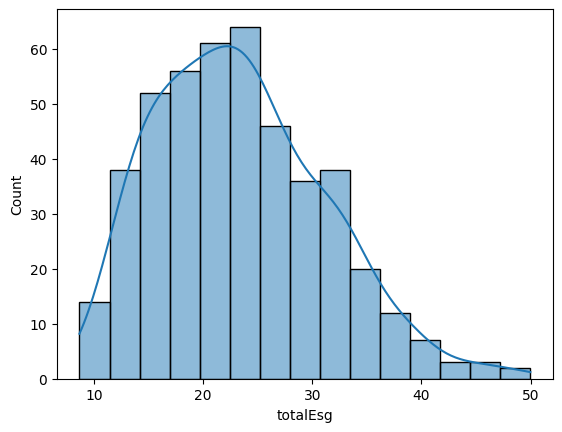

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of 'totalEsg'
sns.histplot(df['totalEsg'].dropna(), kde=True)
plt.show()

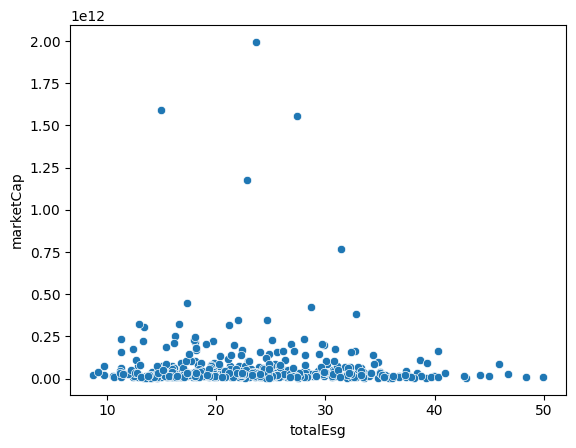

In [ ]:
# Scatter plot of 'totalEsg' vs. 'marketCap'
sns.scatterplot(x='totalEsg', y='marketCap', data=df)
plt.show()

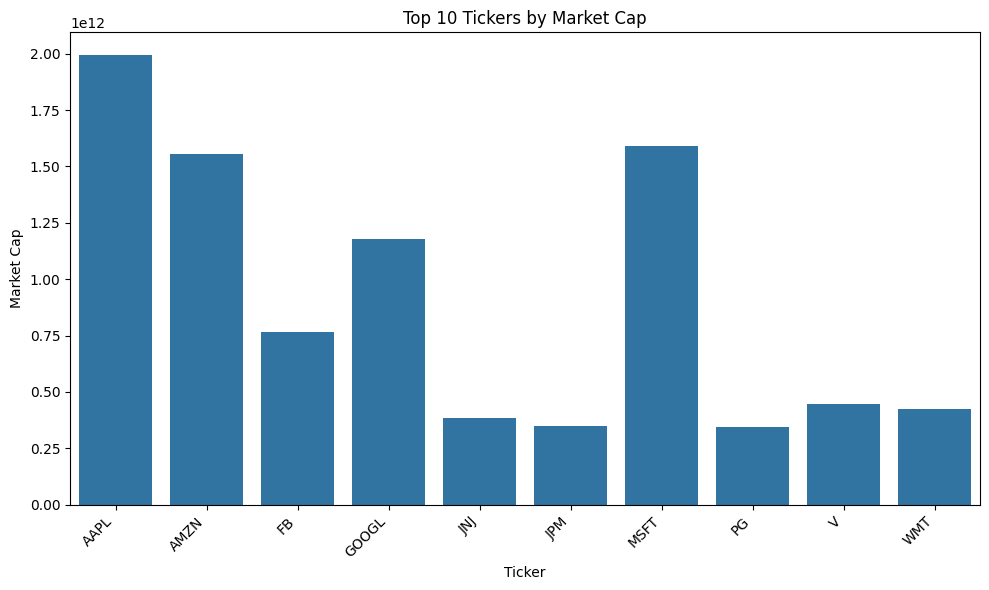

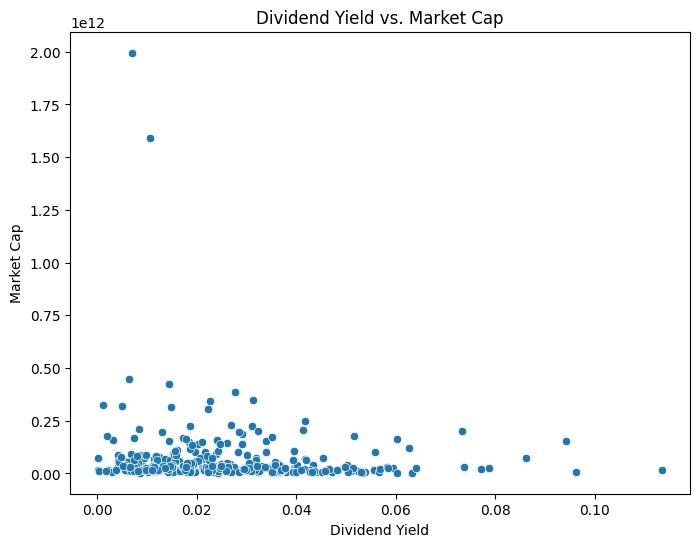

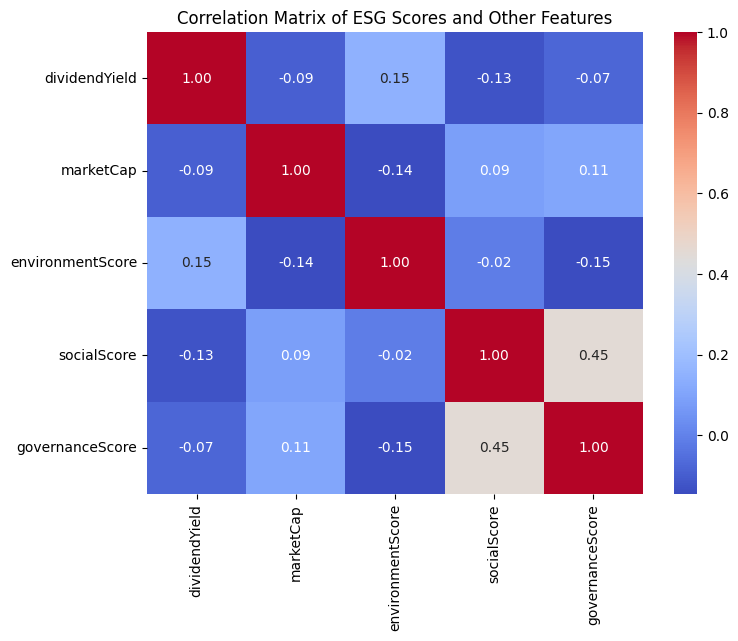

In [ ]:
# Create a bar plot of marketCap for the top 10 tickers
top_10_tickers = df.nlargest(10, 'marketCap')['ticker']
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_tickers, y=df[df['ticker'].isin(top_10_tickers)]['marketCap'])
plt.xlabel("Ticker")
plt.ylabel("Market Cap")
plt.title("Top 10 Tickers by Market Cap")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Create a scatter plot of dividendYield vs. marketCap
plt.figure(figsize=(8, 6))
sns.scatterplot(x='dividendYield', y='marketCap', data=df)
plt.xlabel("Dividend Yield")
plt.ylabel("Market Cap")
plt.title("Dividend Yield vs. Market Cap")
plt.show()

# Create a heatmap of correlations between ESG scores and other features
esg_features = ['environmentScore', 'socialScore', 'governanceScore']
correlation_matrix = df[features].corr()  # features defined in the code
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of ESG Scores and Other Features")
plt.show()

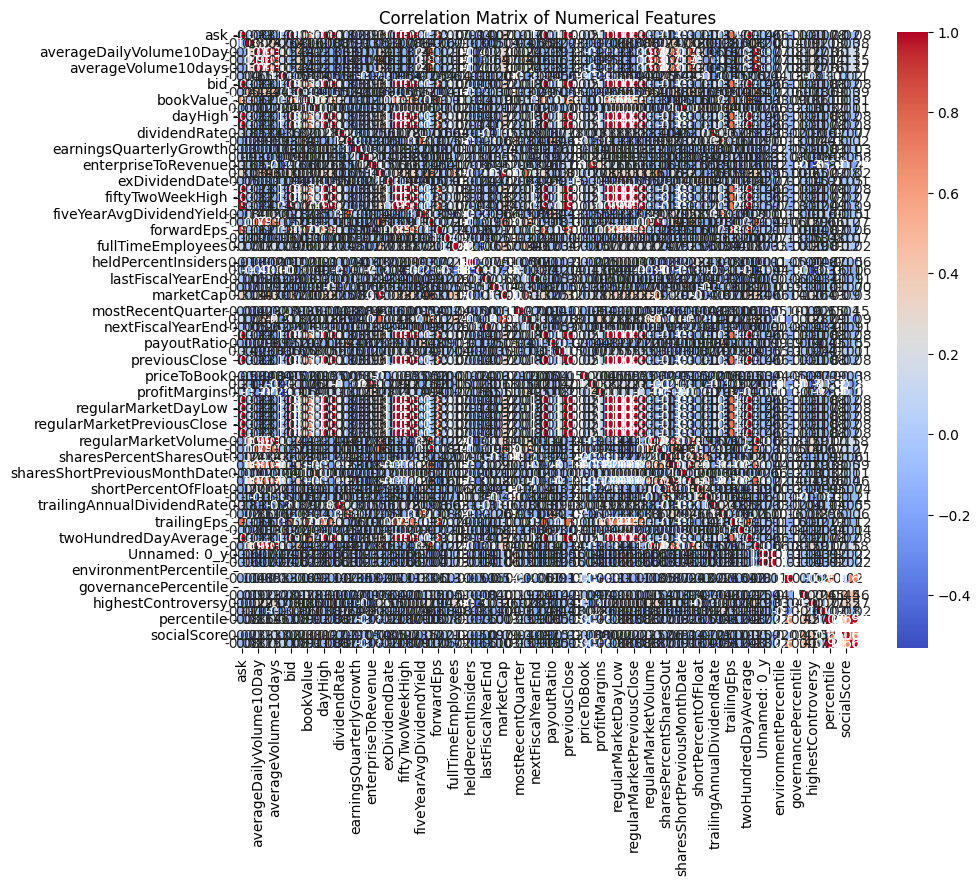

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numeric columns are used
numeric_df = df.select_dtypes(include=['number'])

# Check if numeric_df is non-empty
if not numeric_df.empty:
    # Heatmap of correlation matrix
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix of Numerical Features")
    plt.show()
else:
    print("No numeric columns available for correlation matrix.")


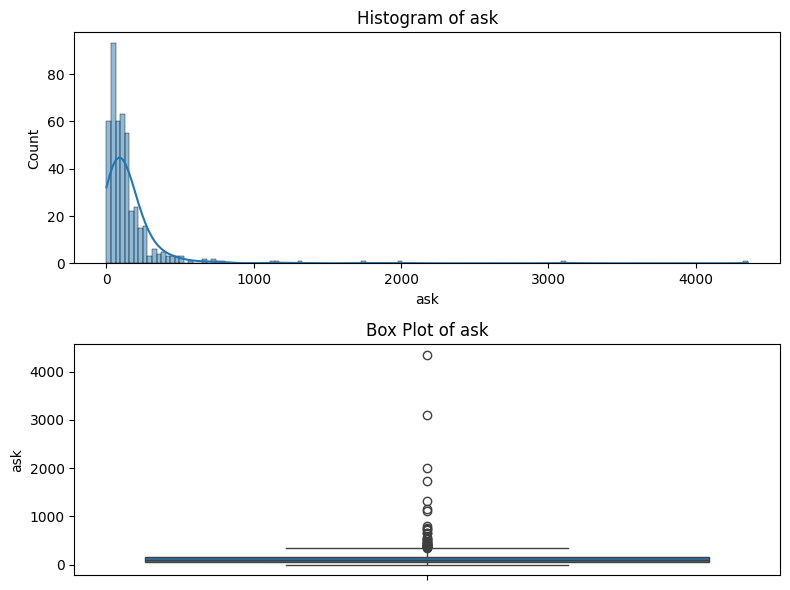

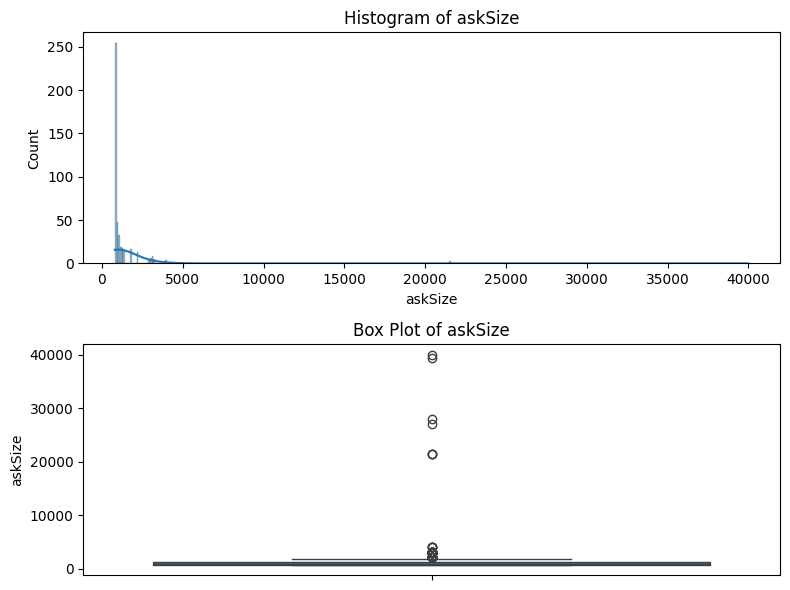

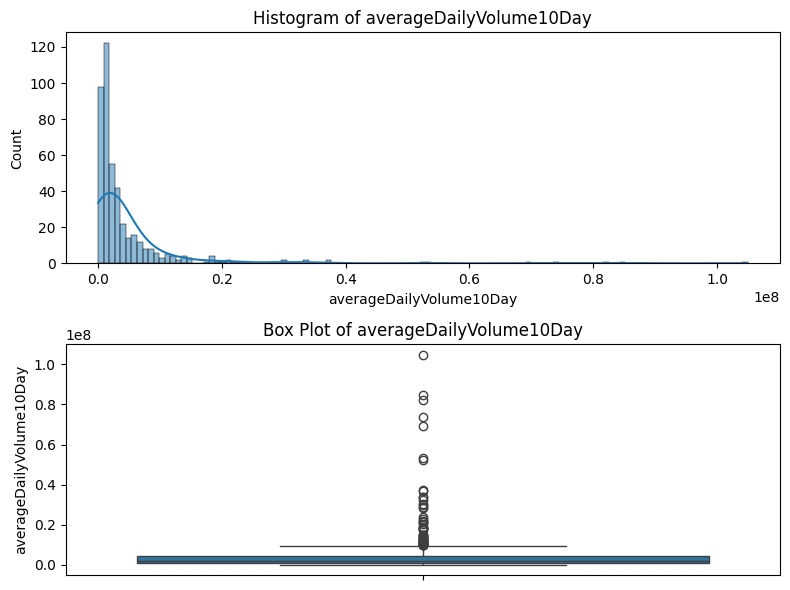

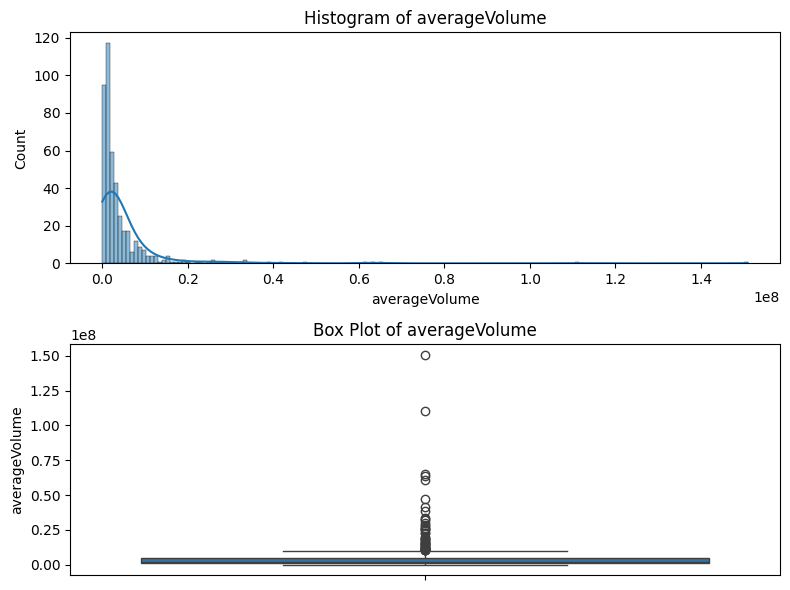

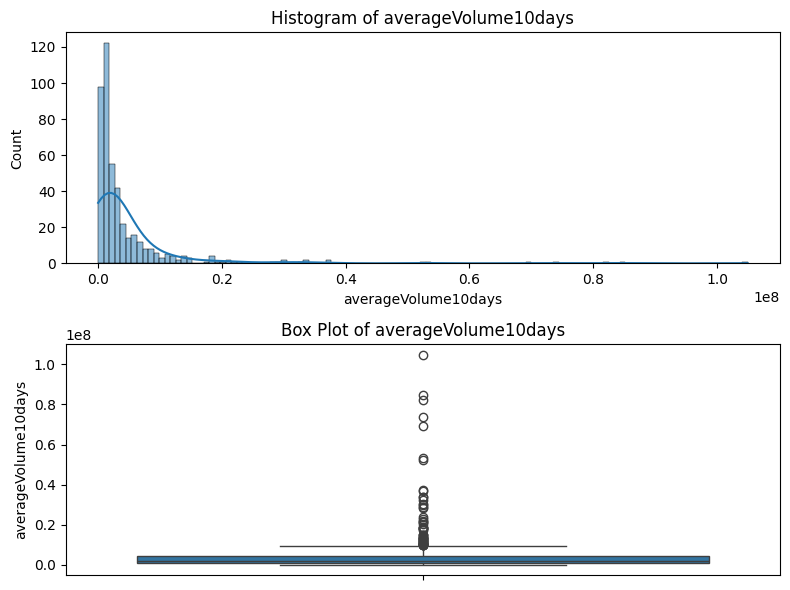

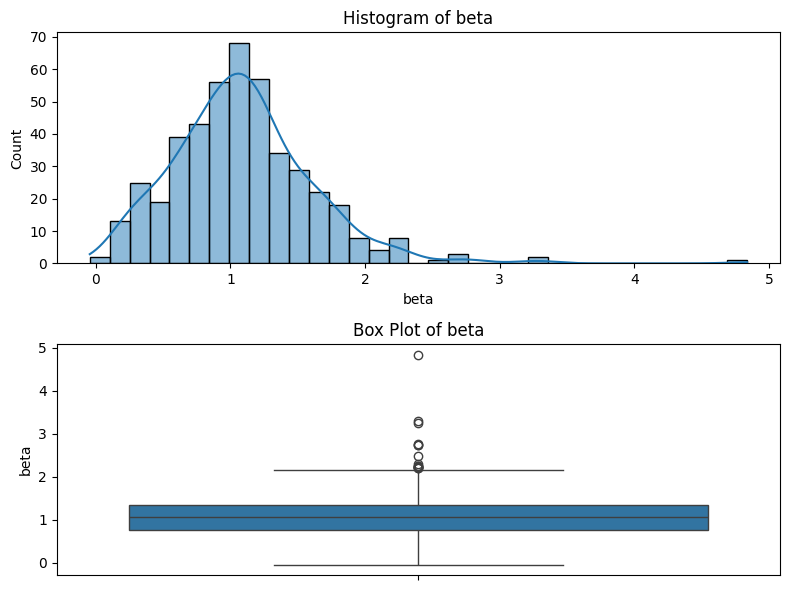

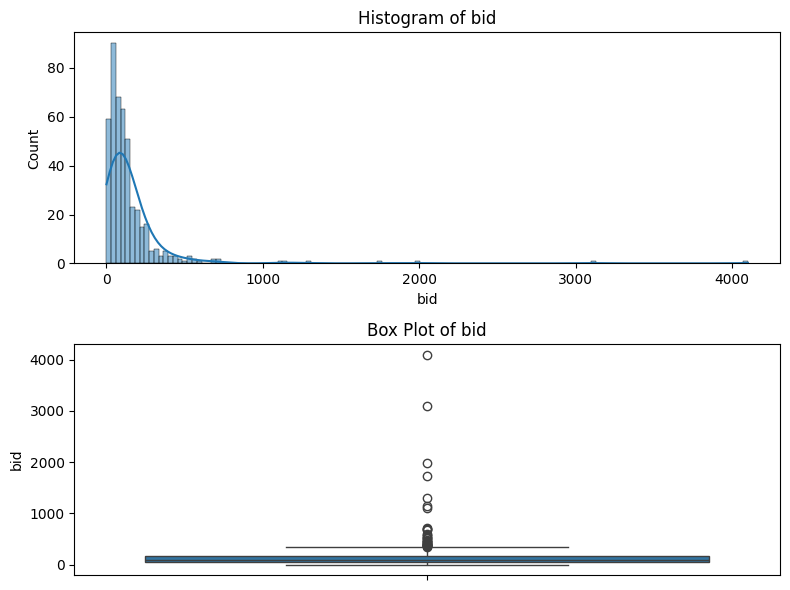

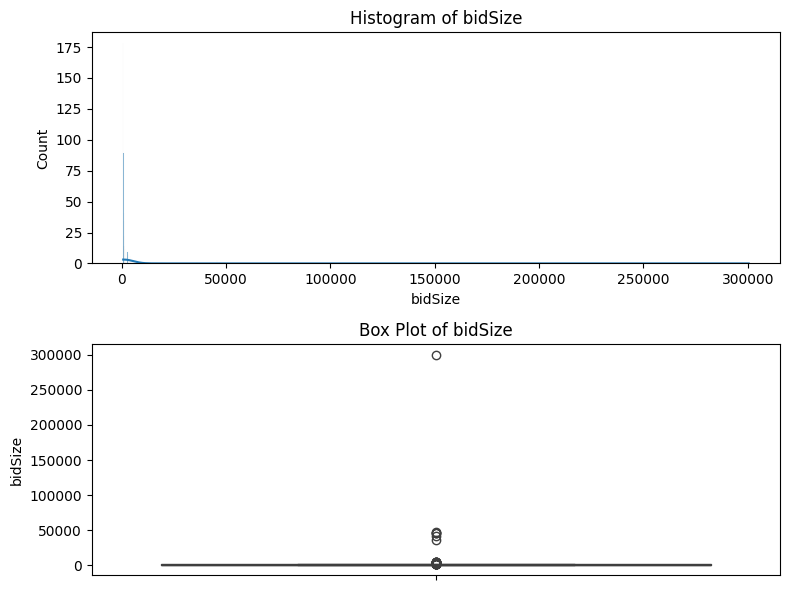

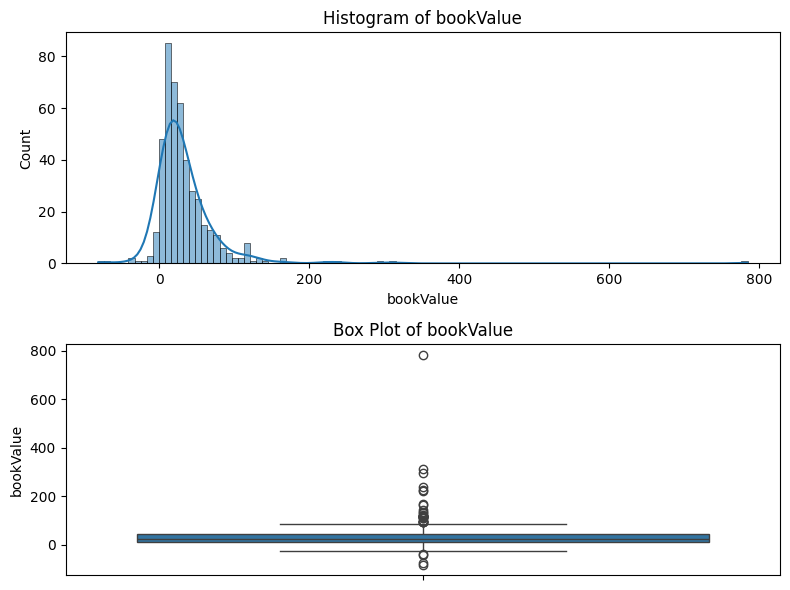

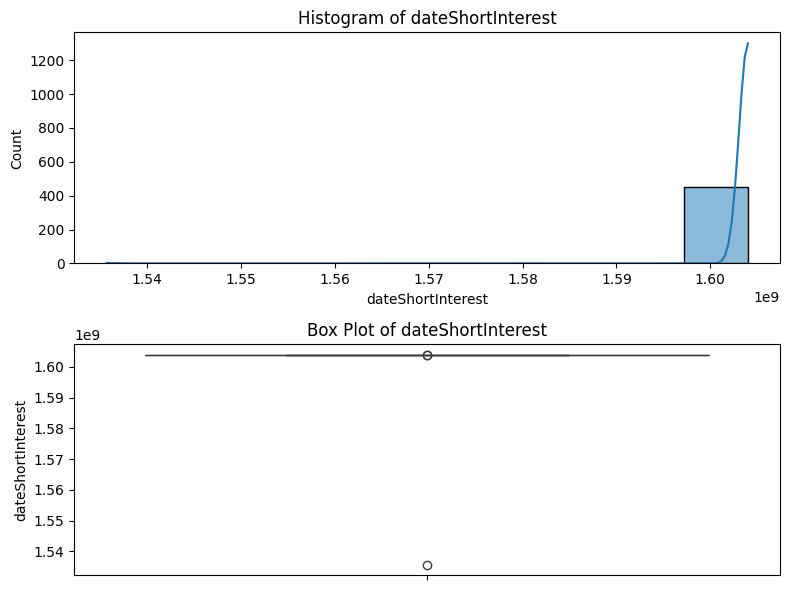

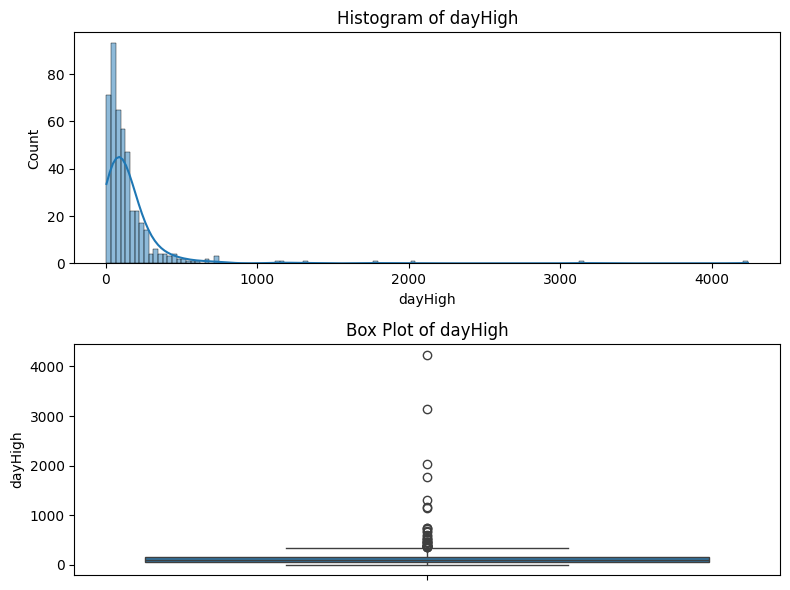

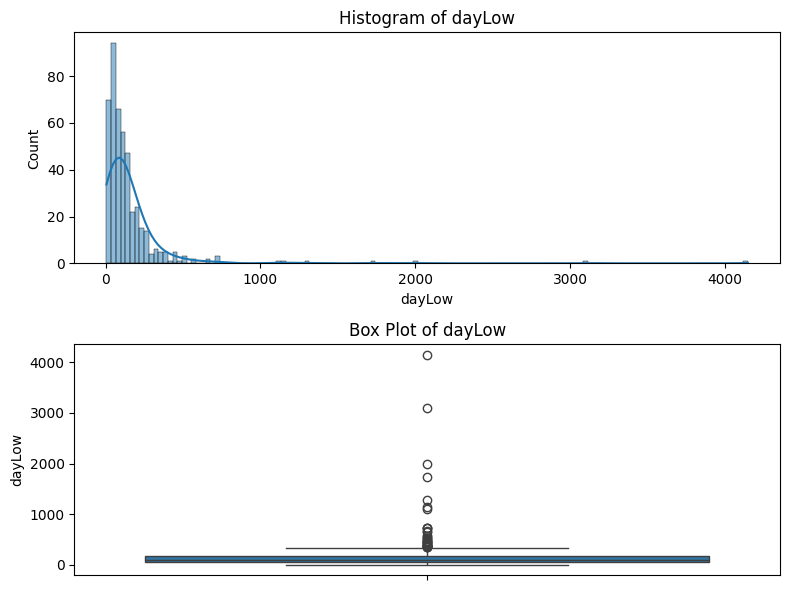

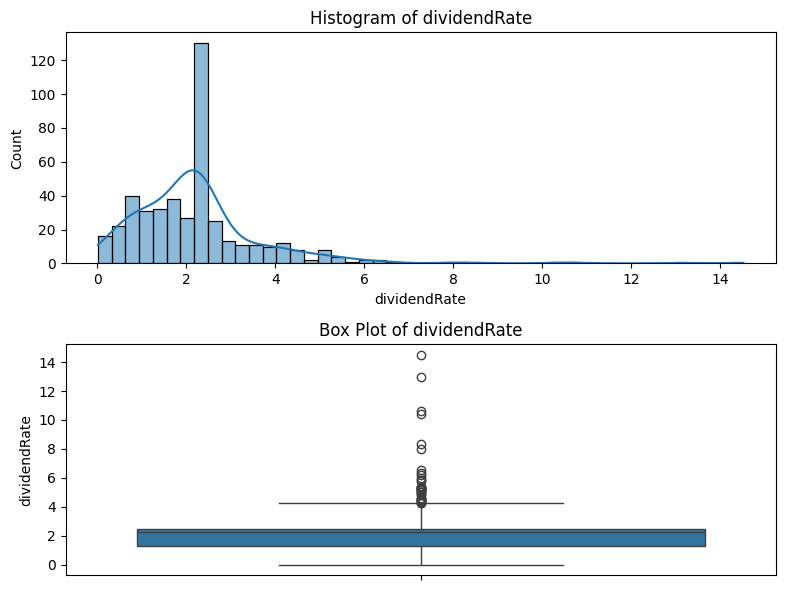

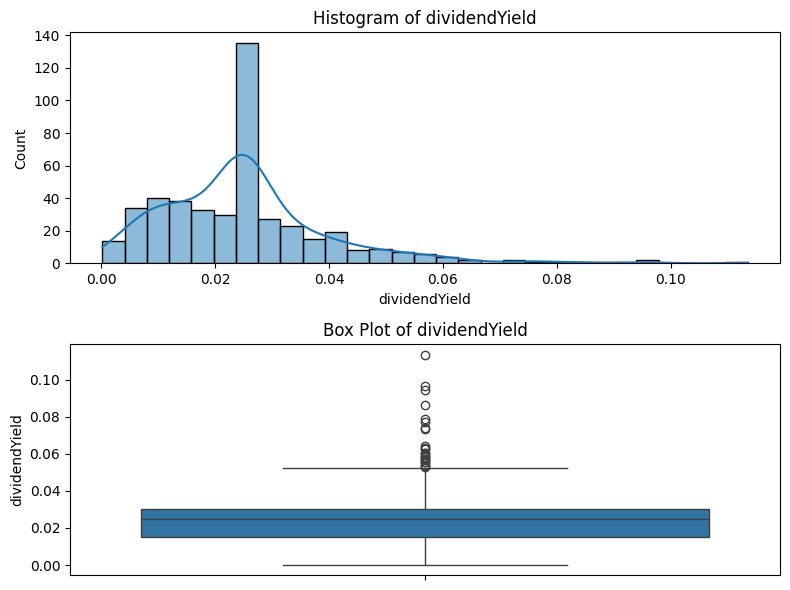

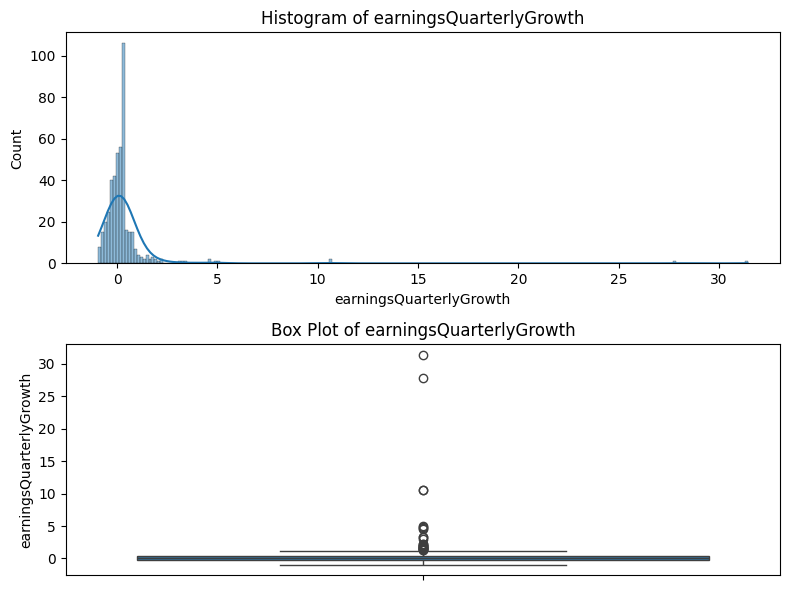

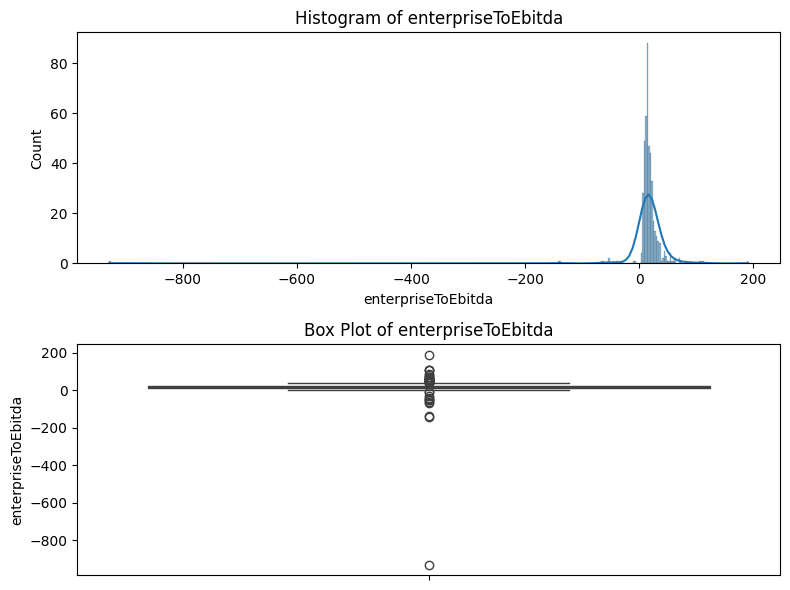

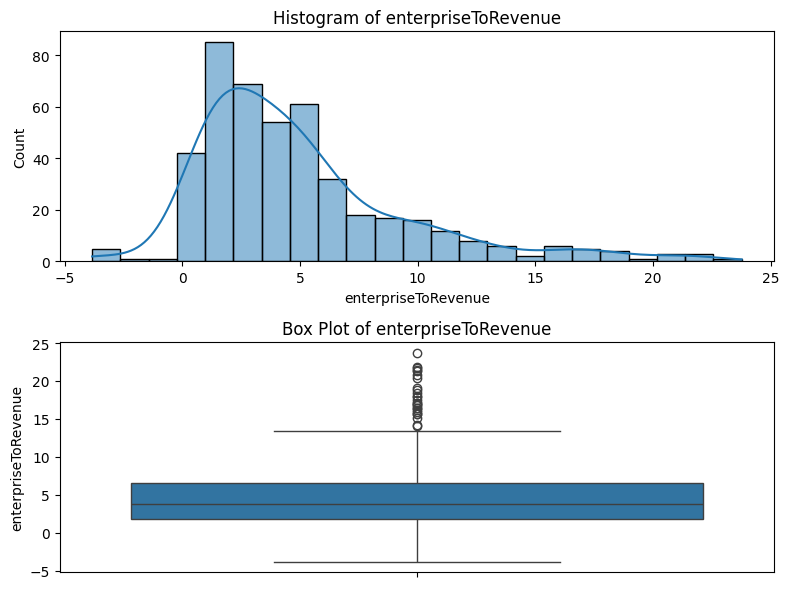

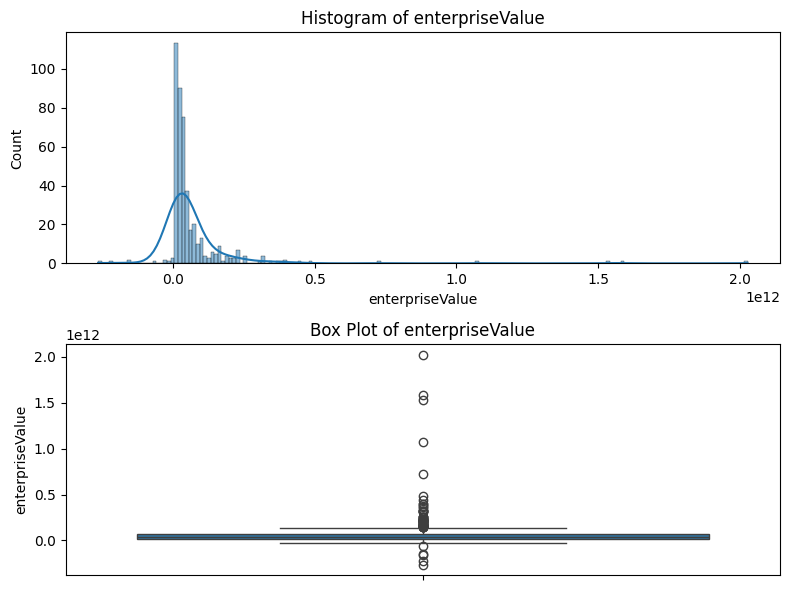

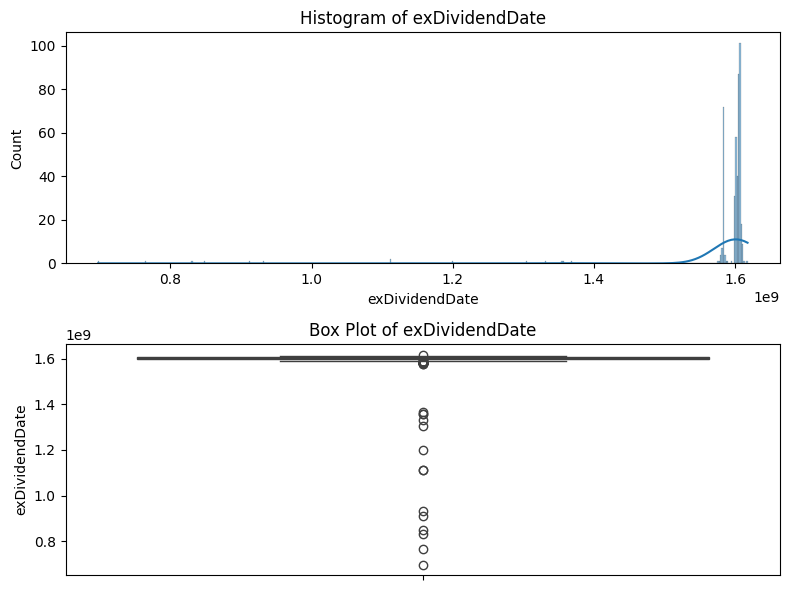

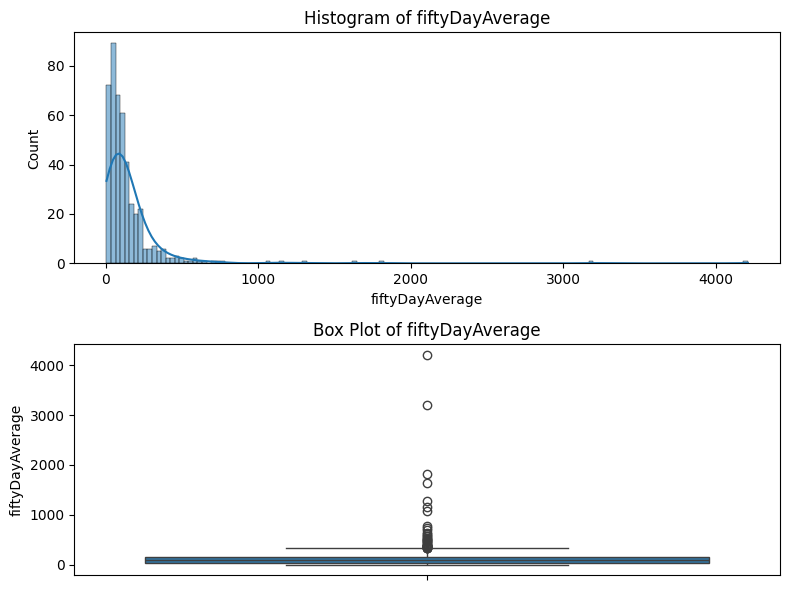

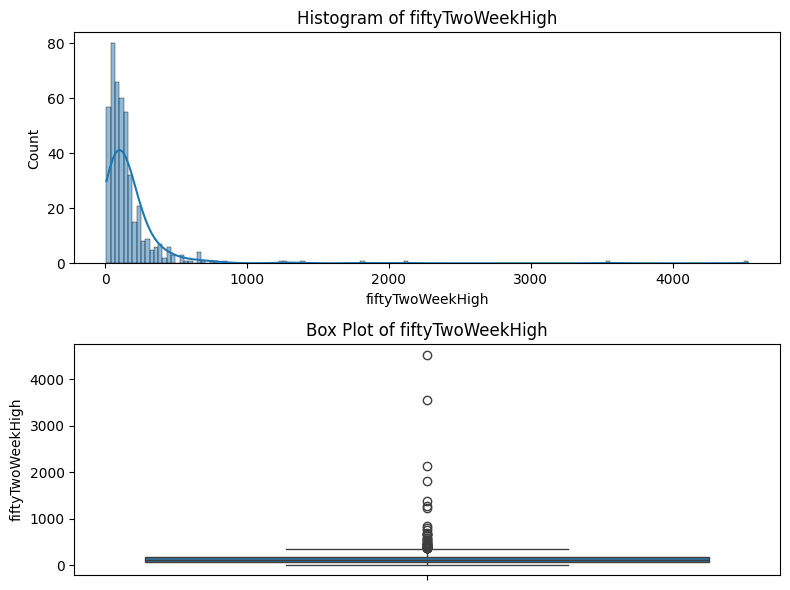

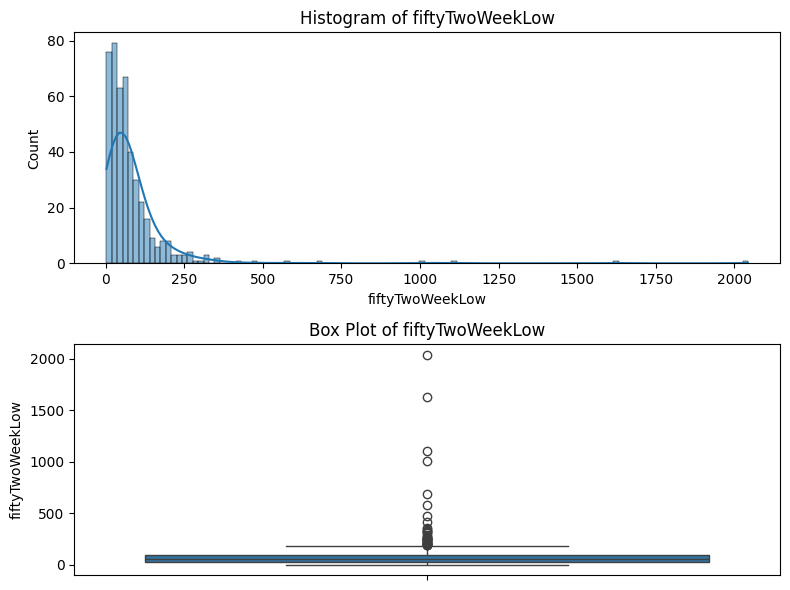

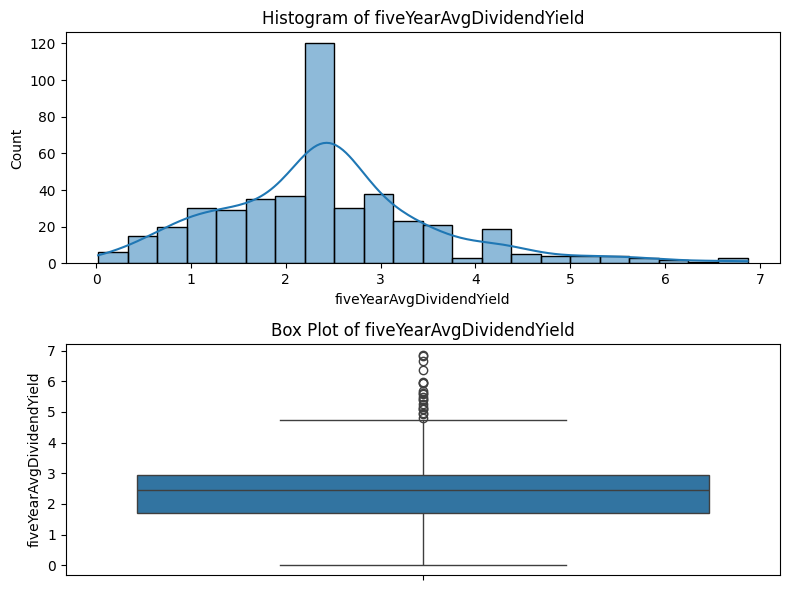

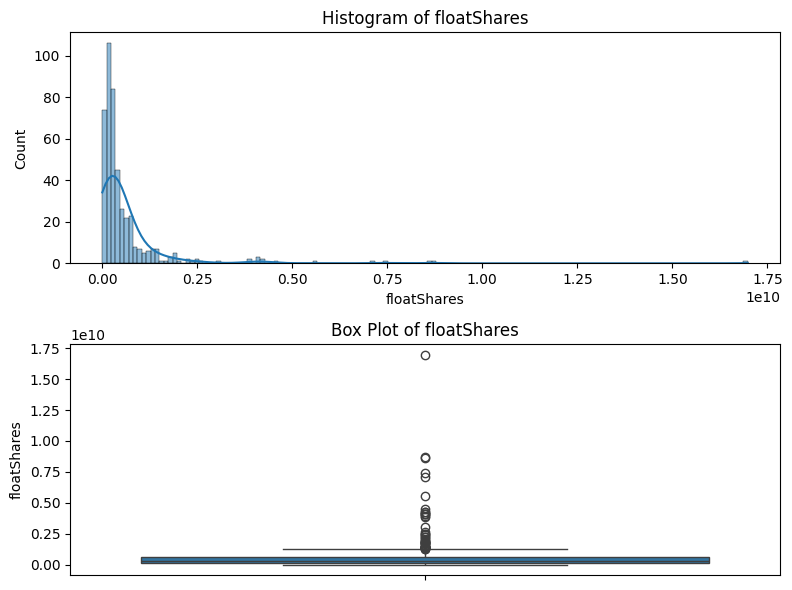

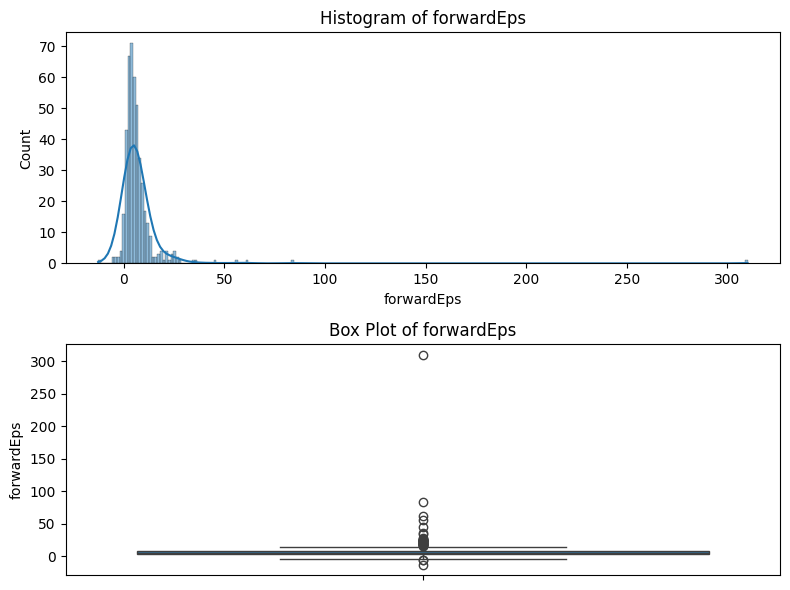

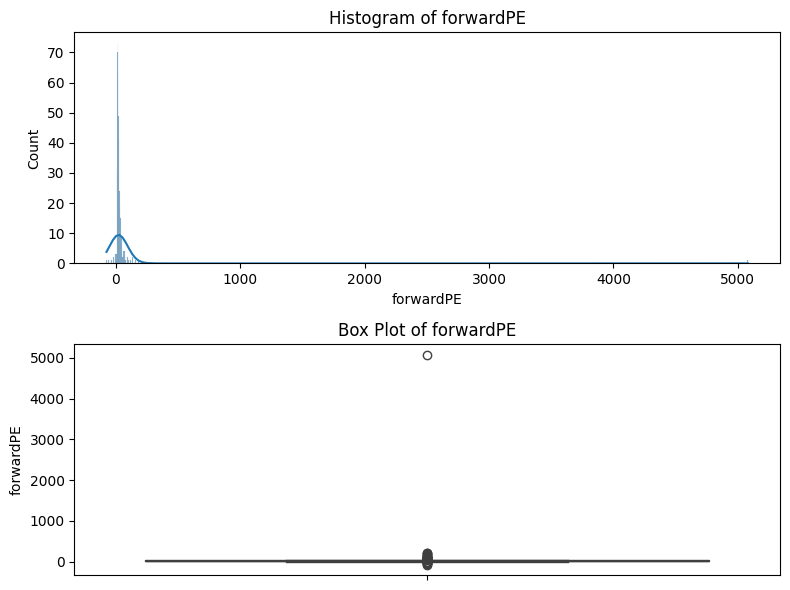

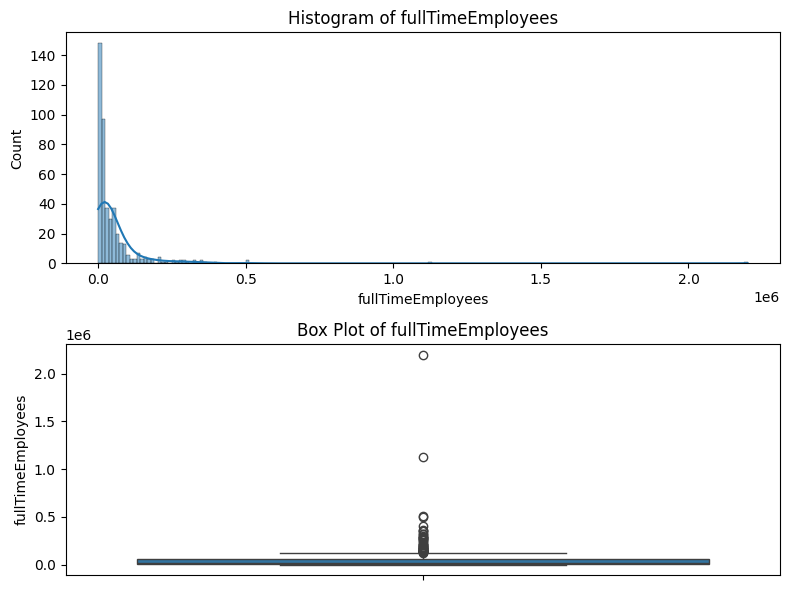

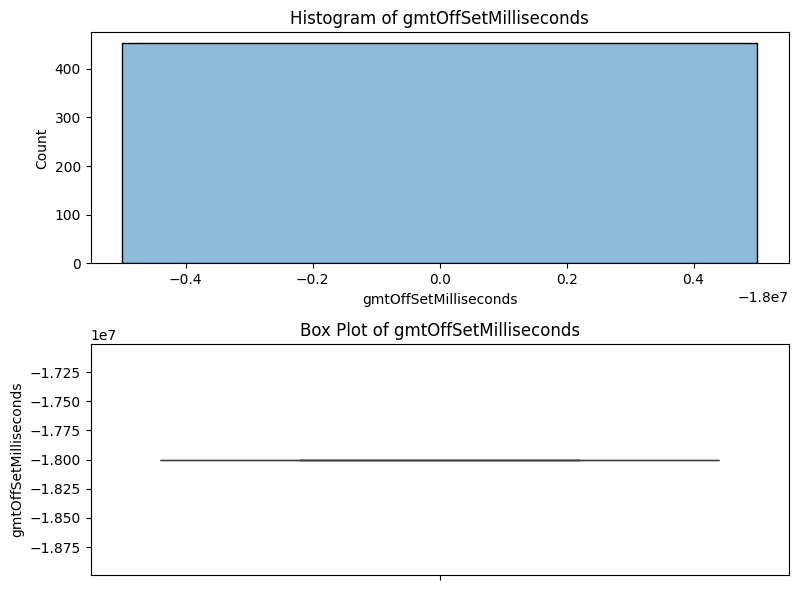

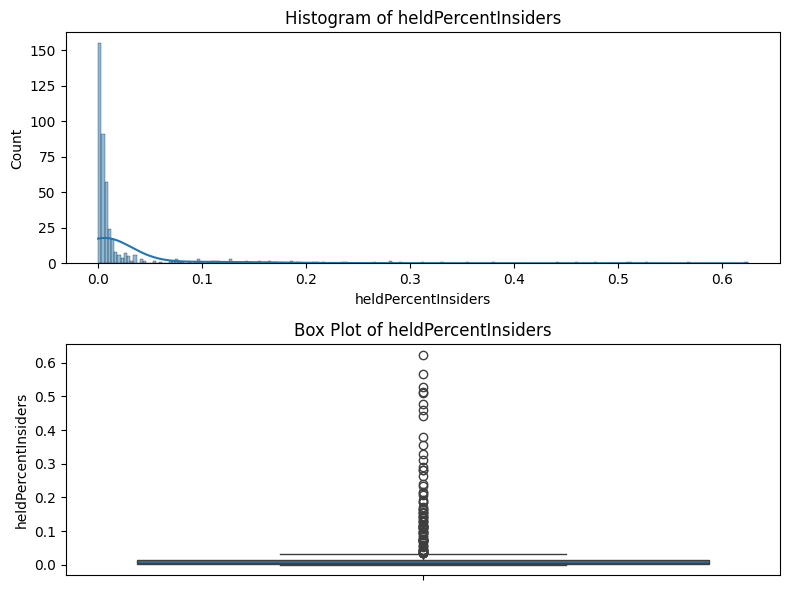

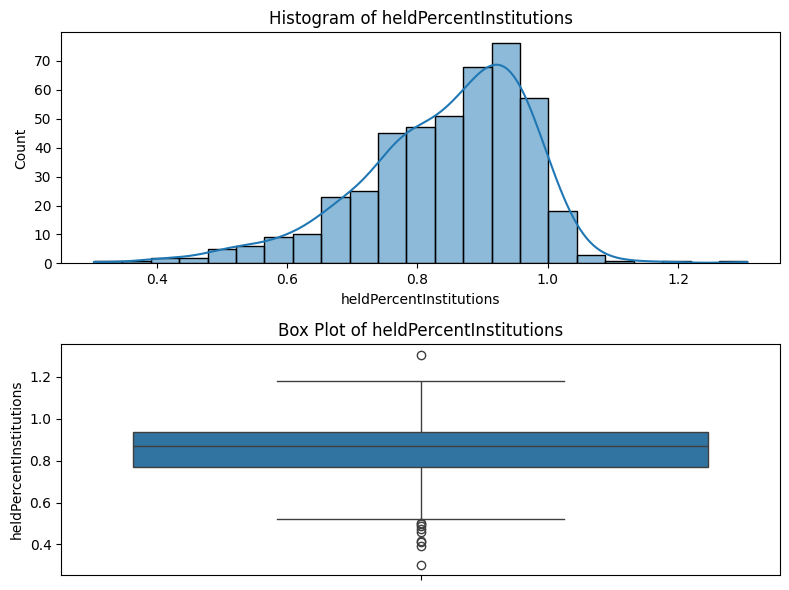

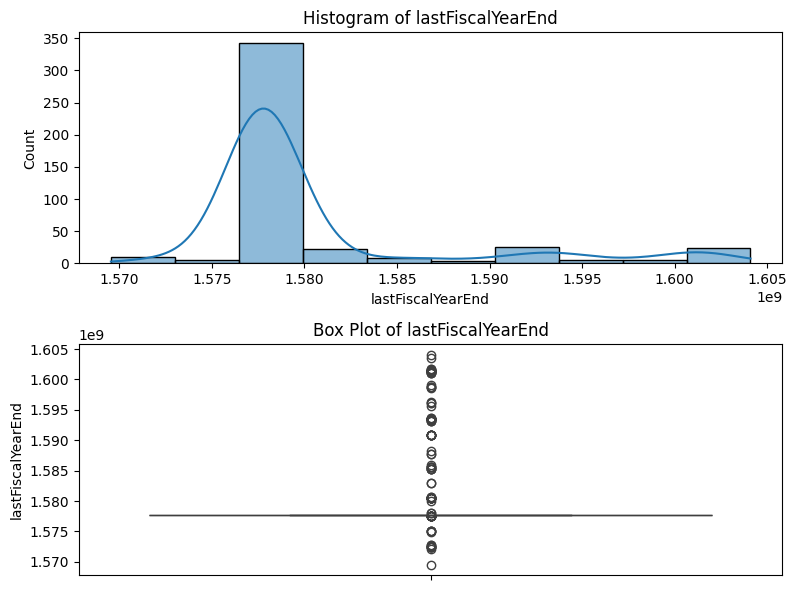

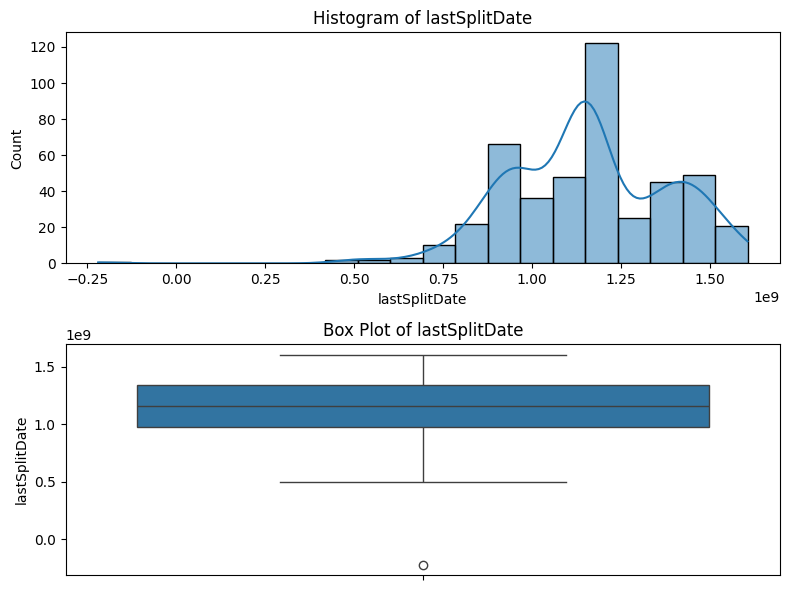

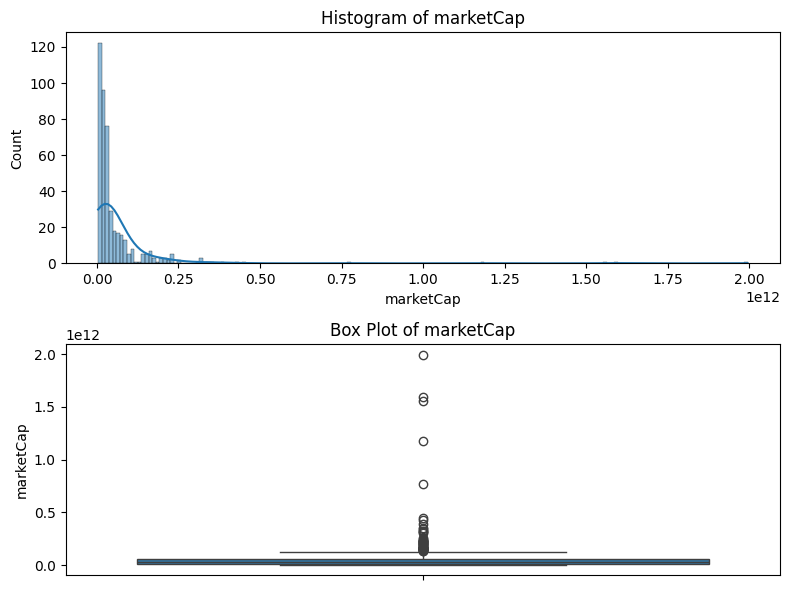

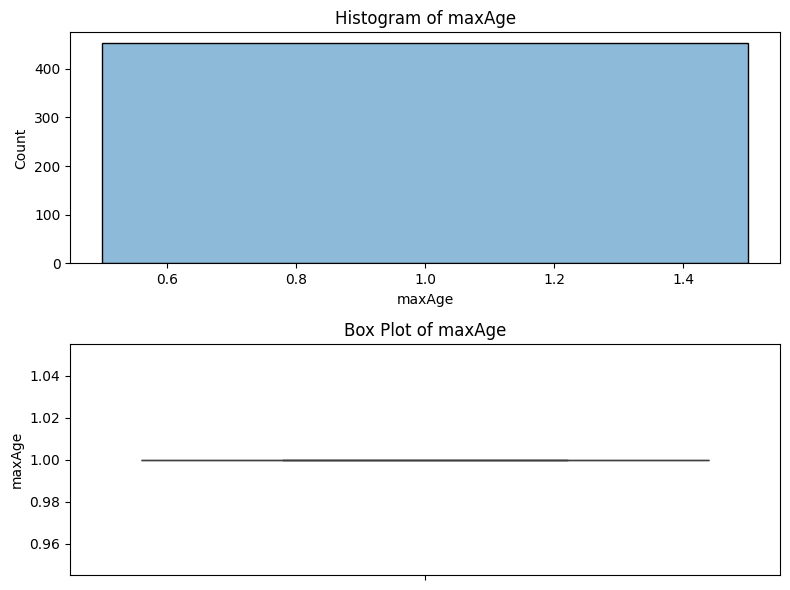

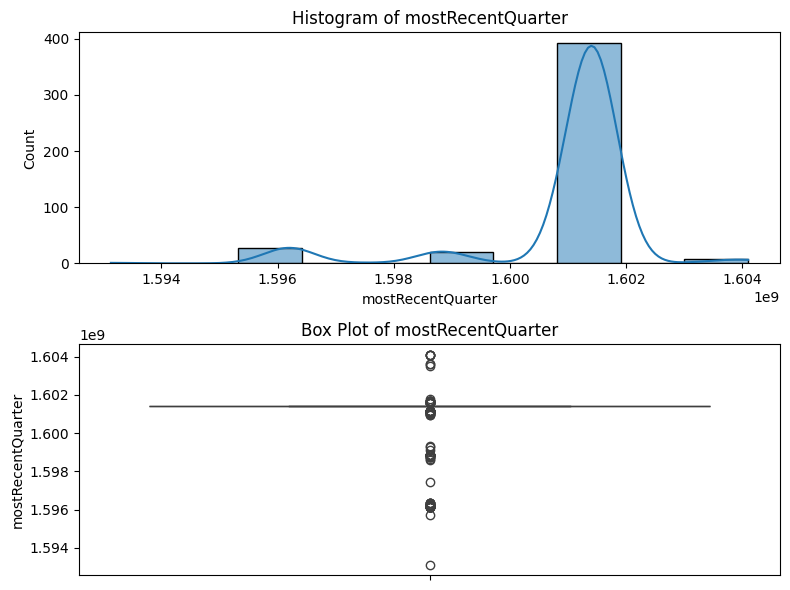

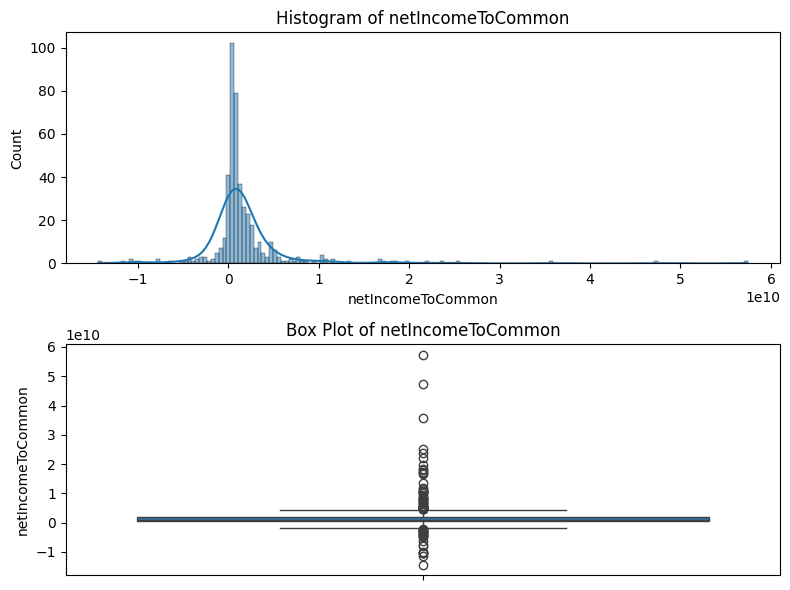

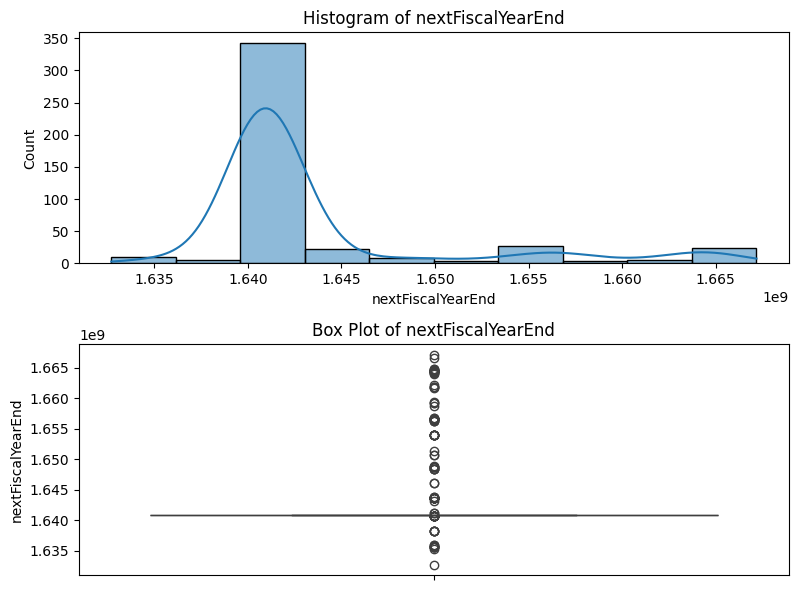

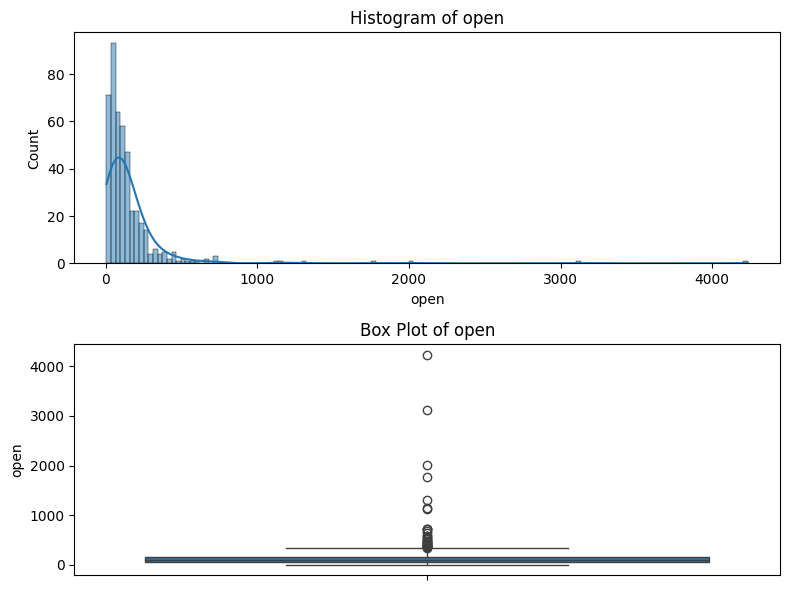

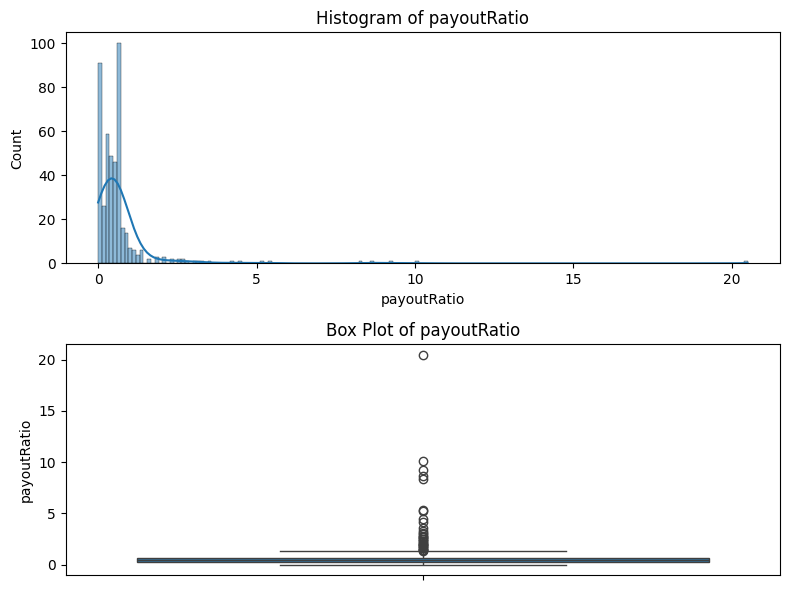

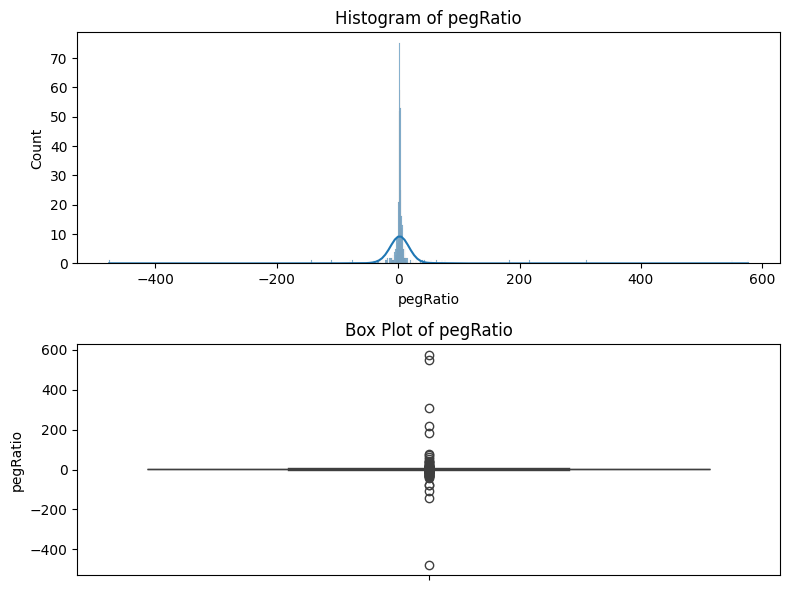

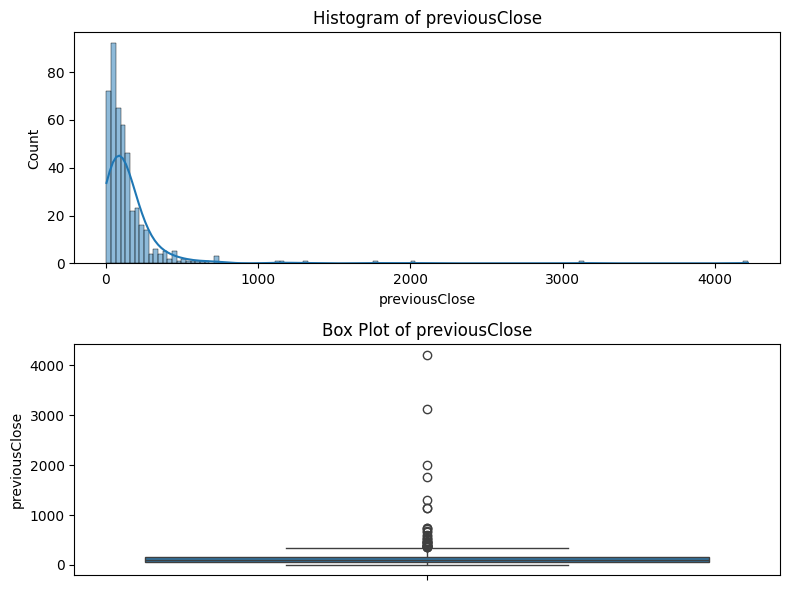

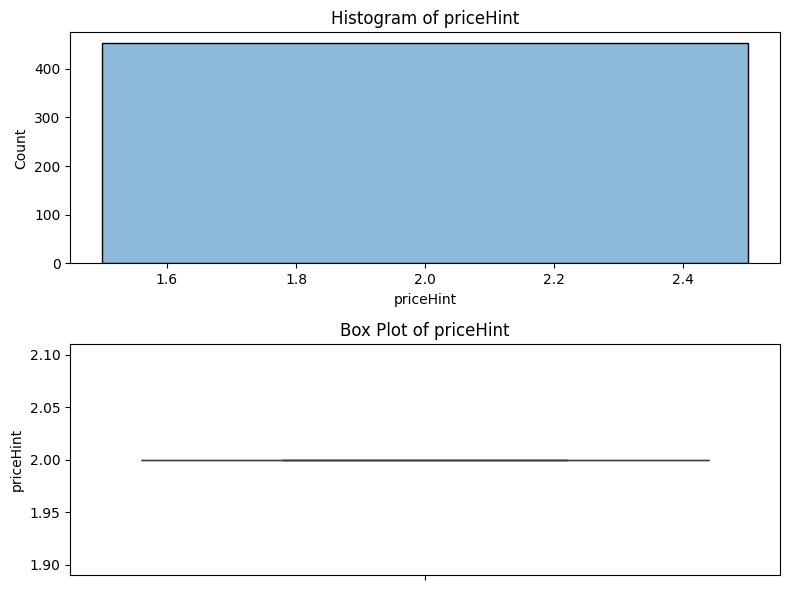

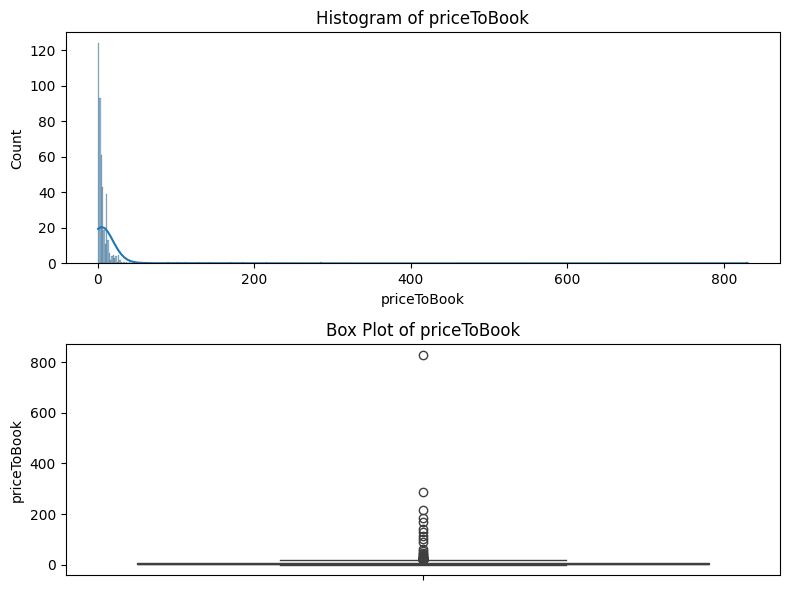

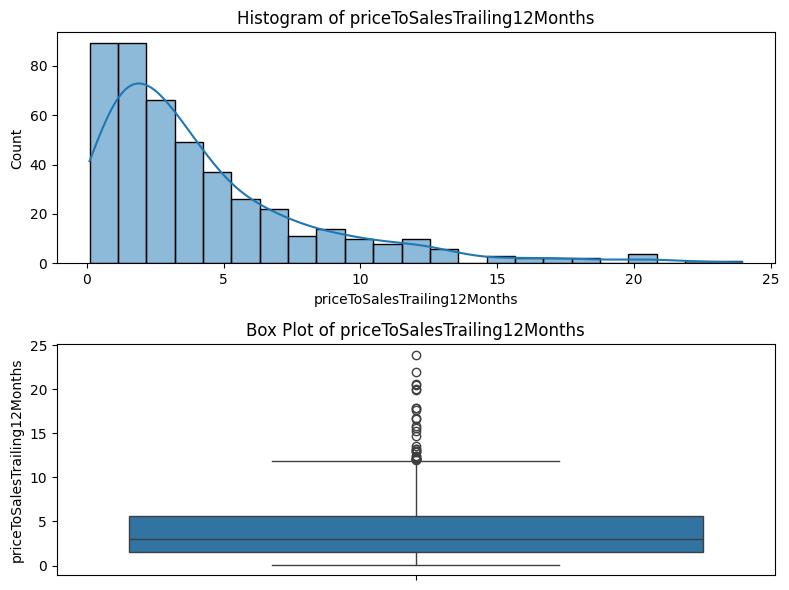

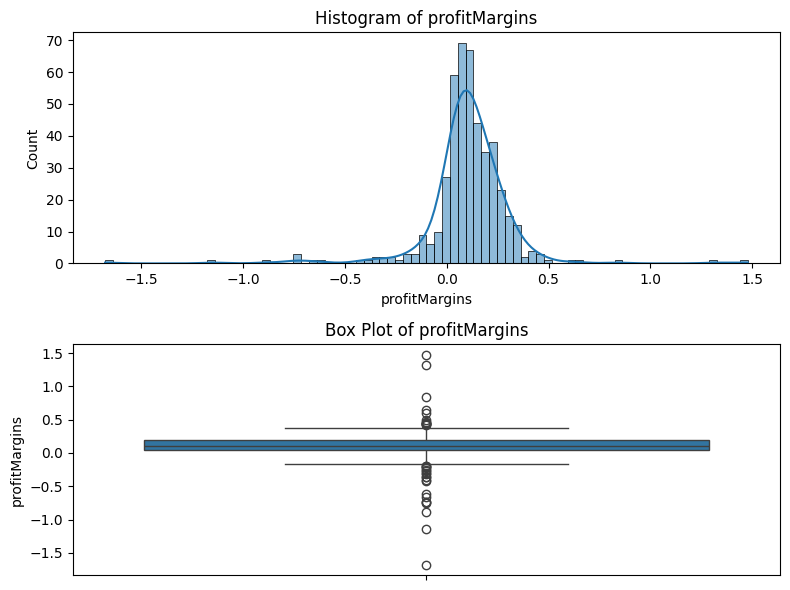

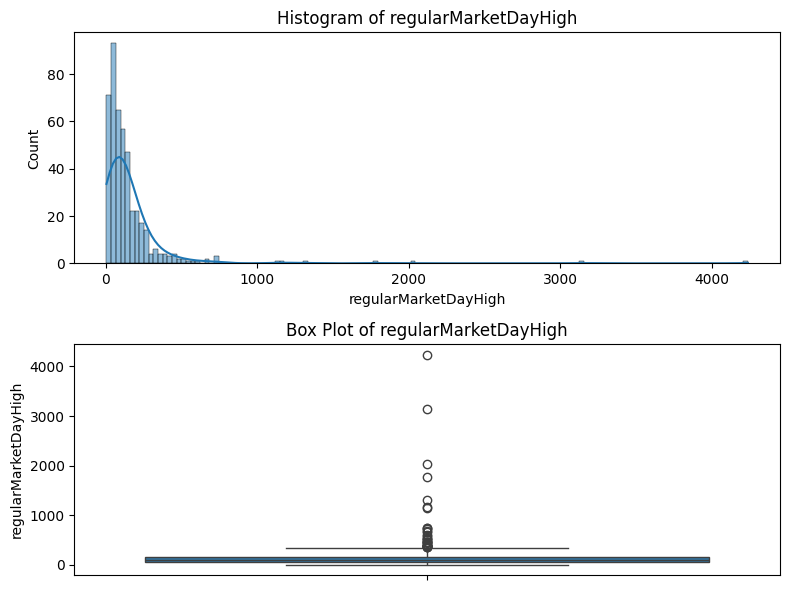

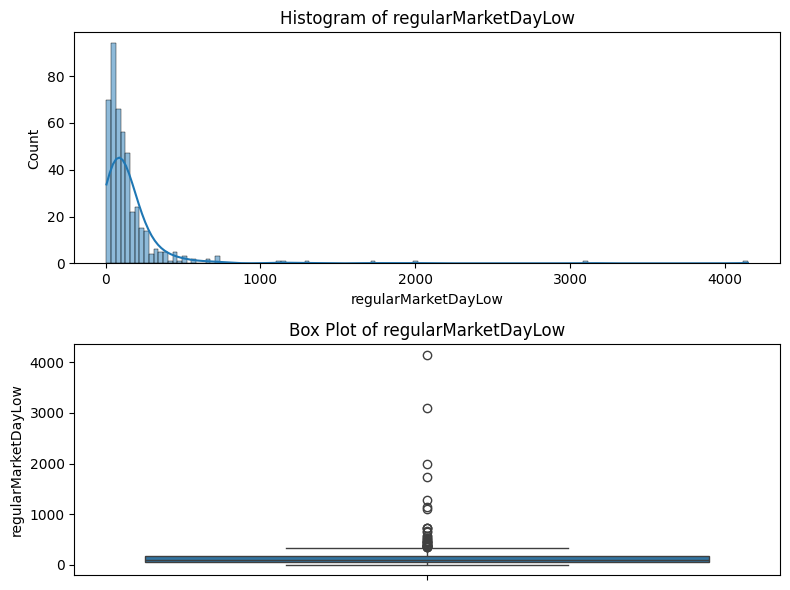

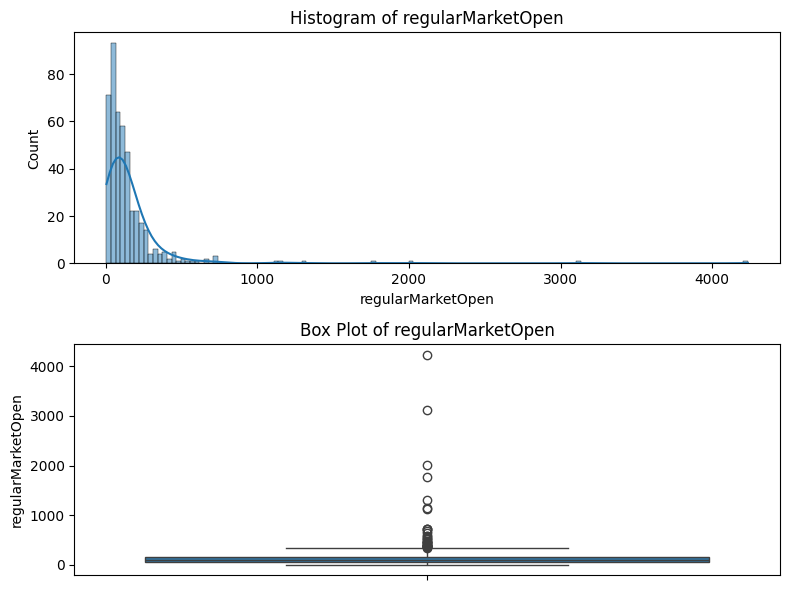

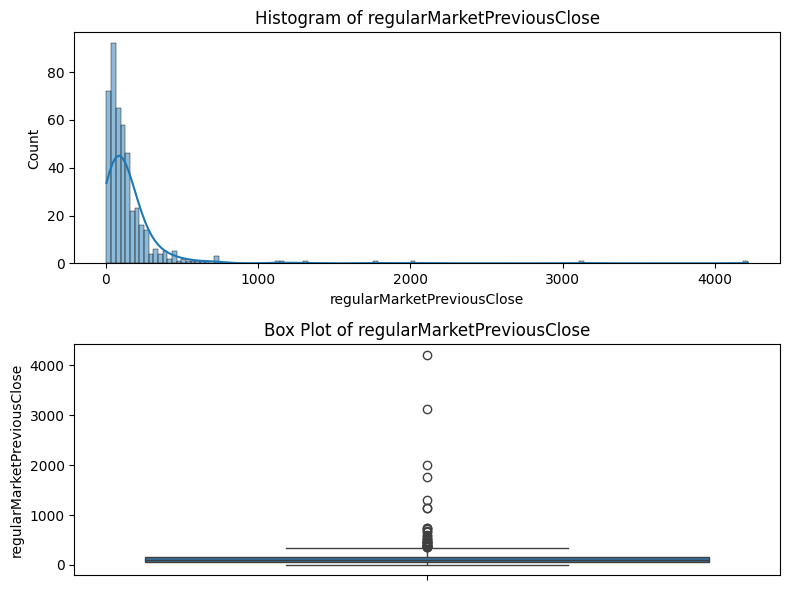

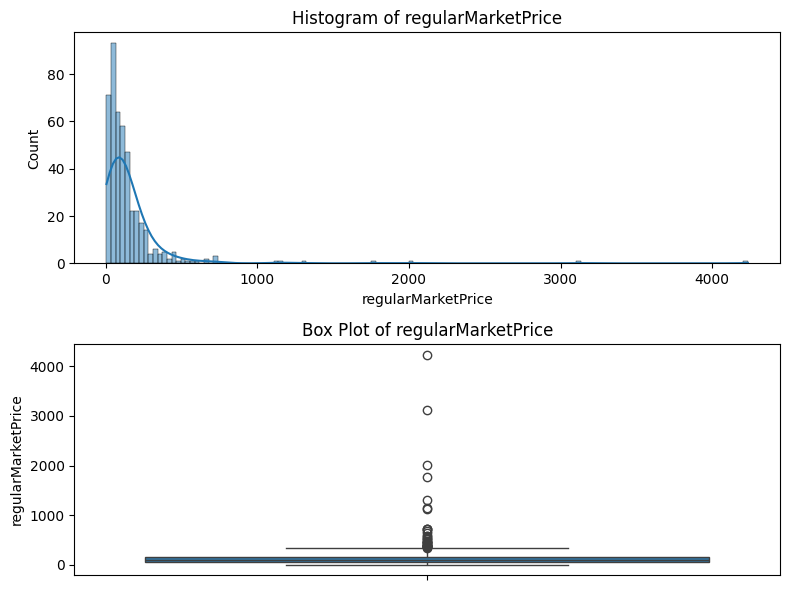

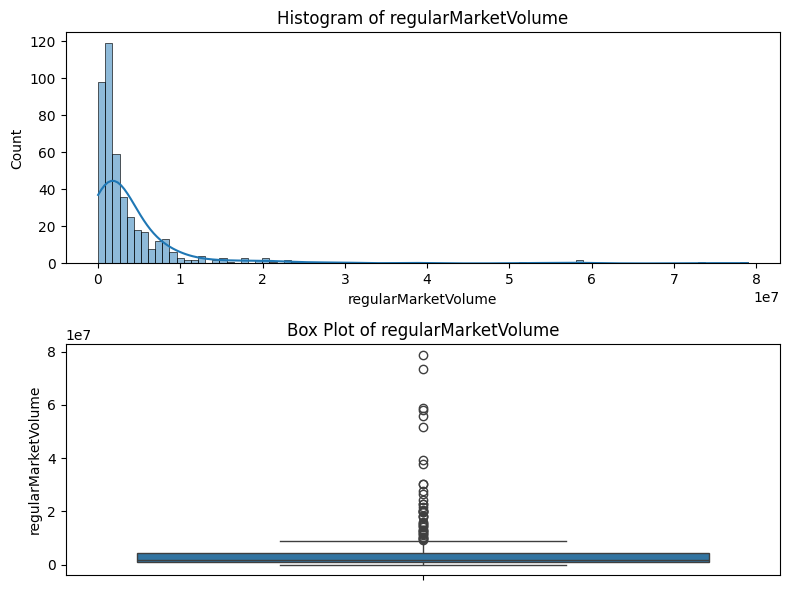

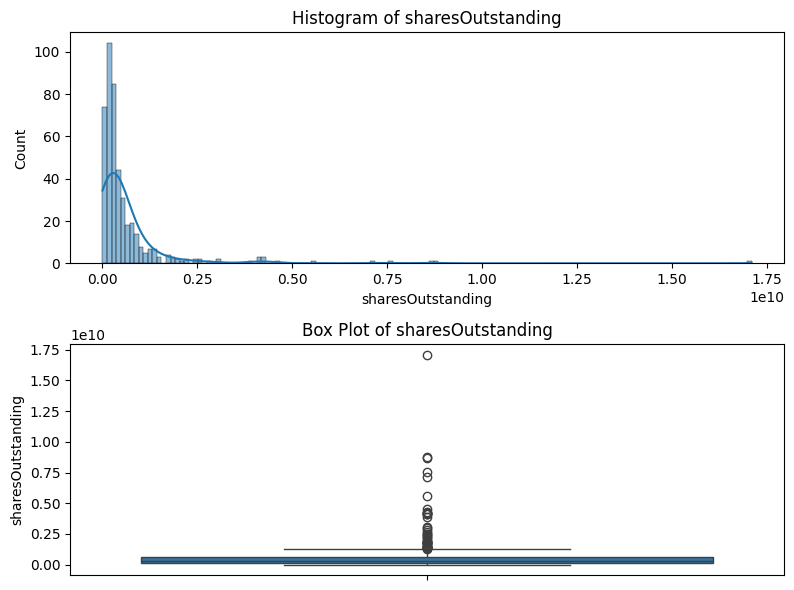

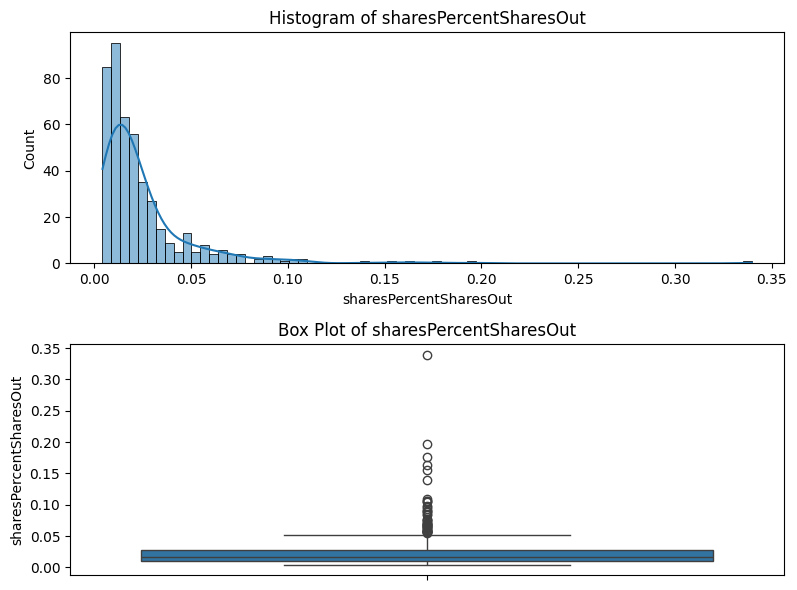

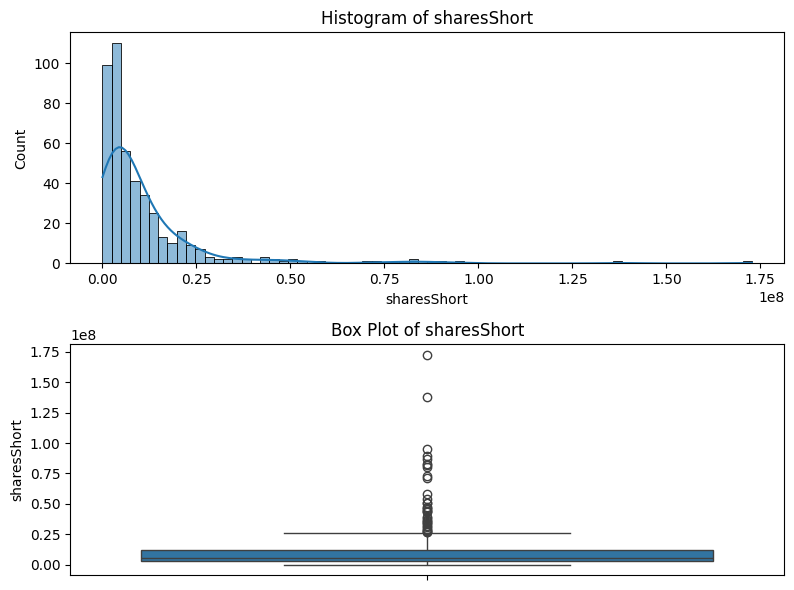

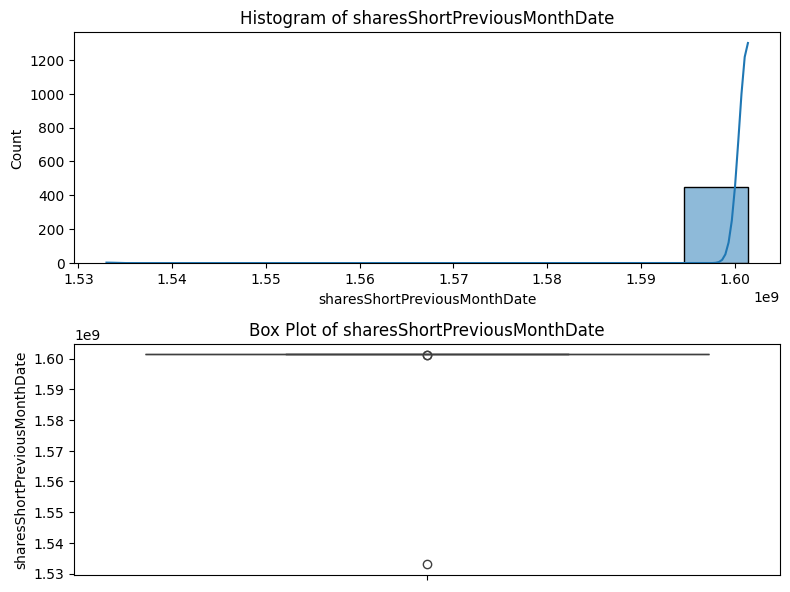

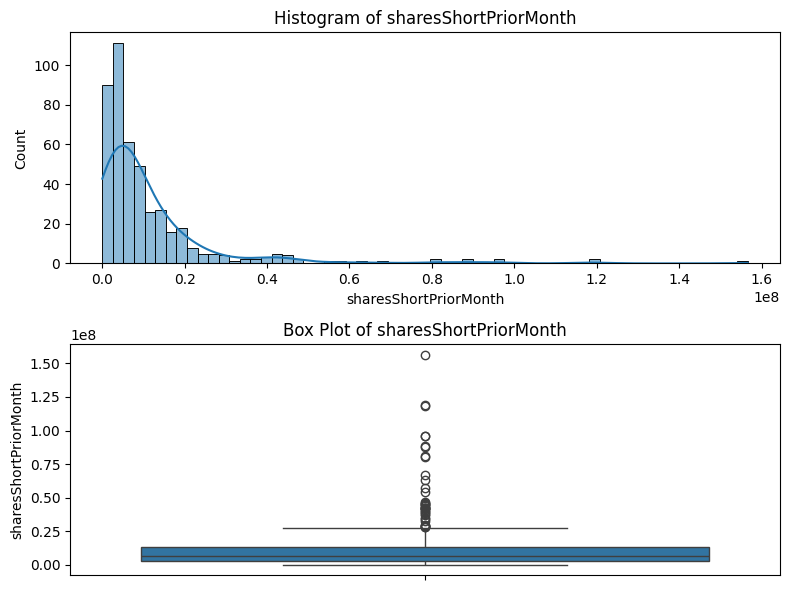

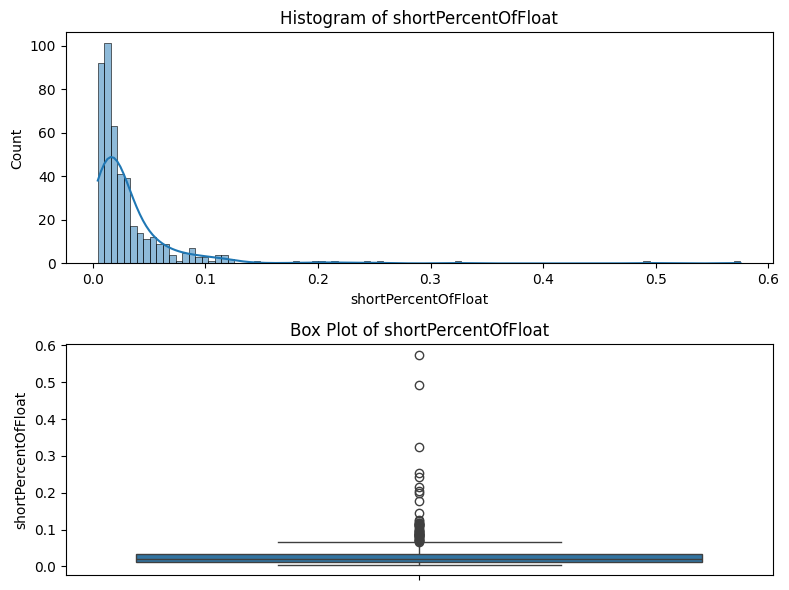

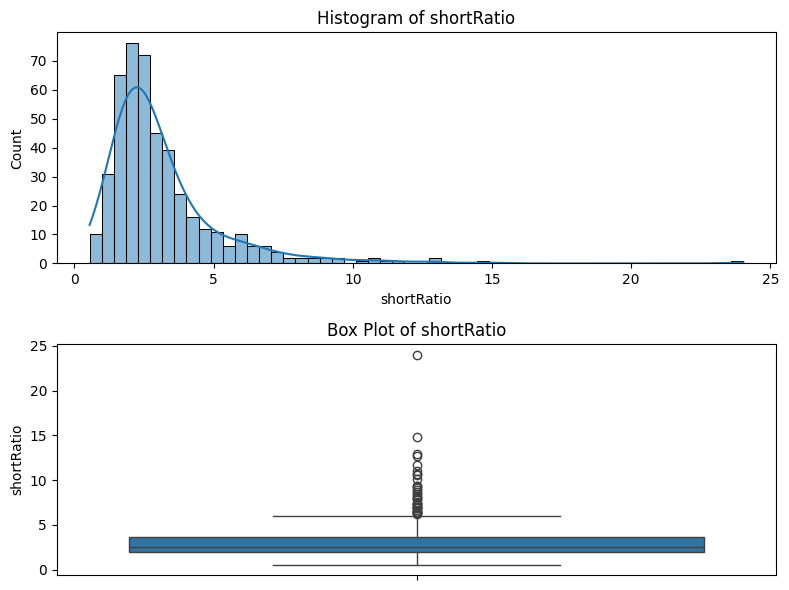

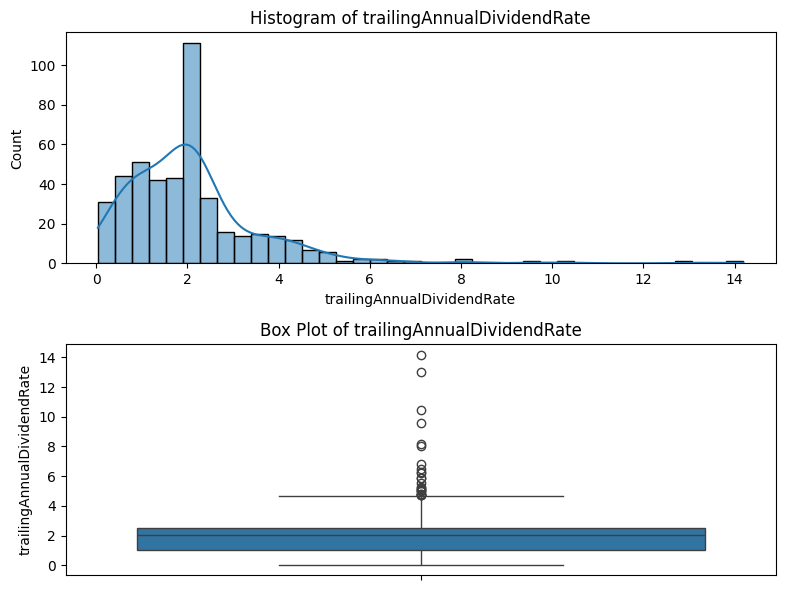

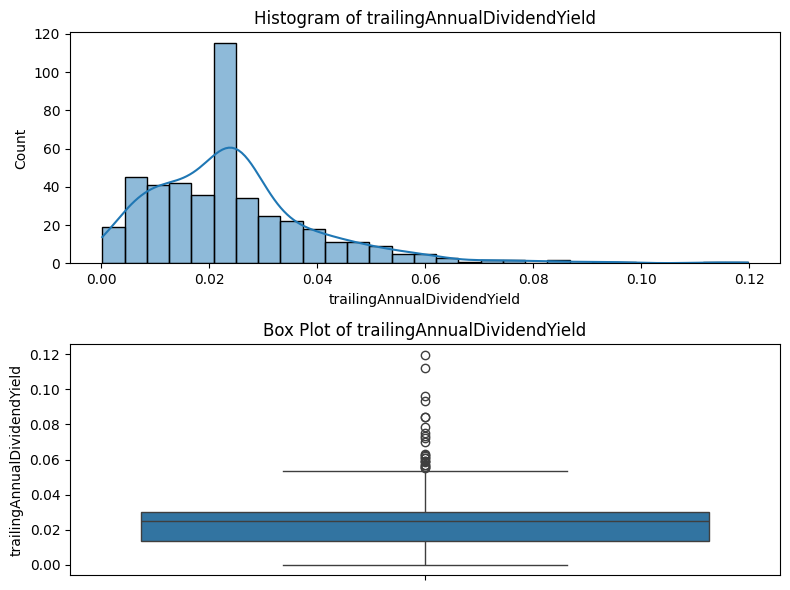

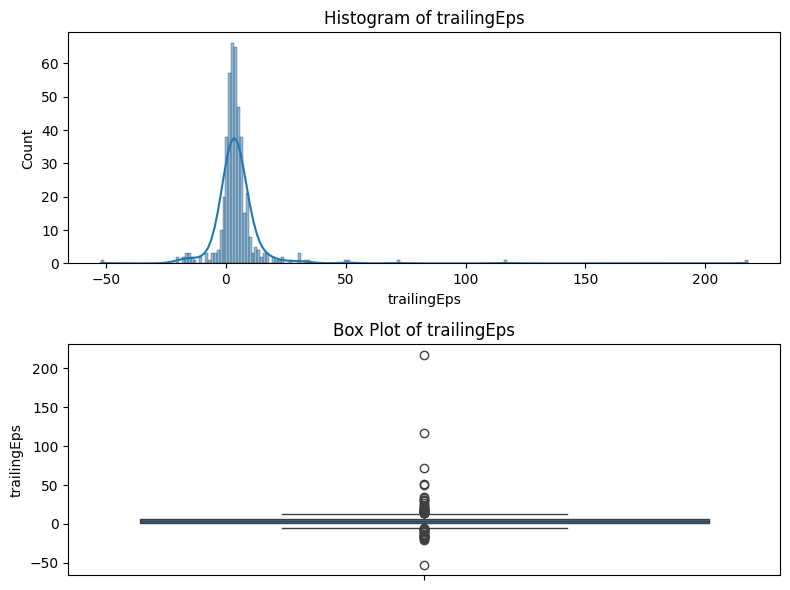

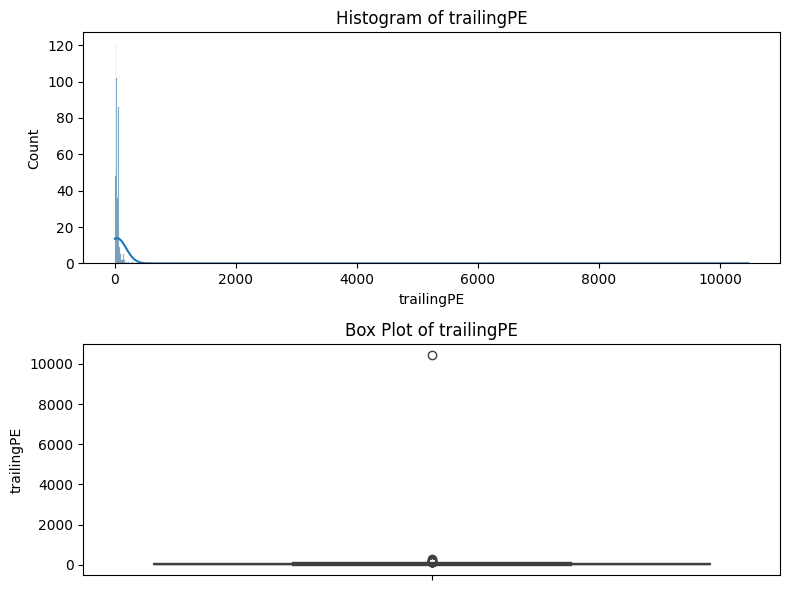

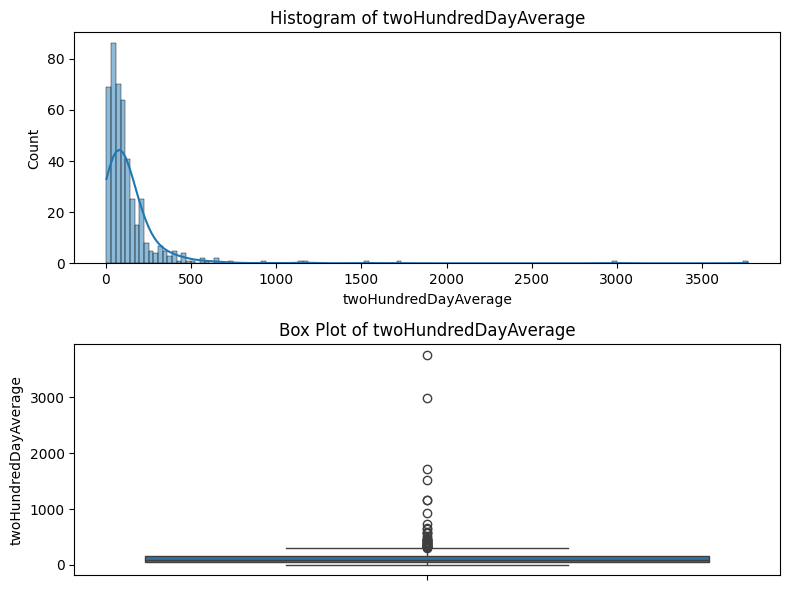

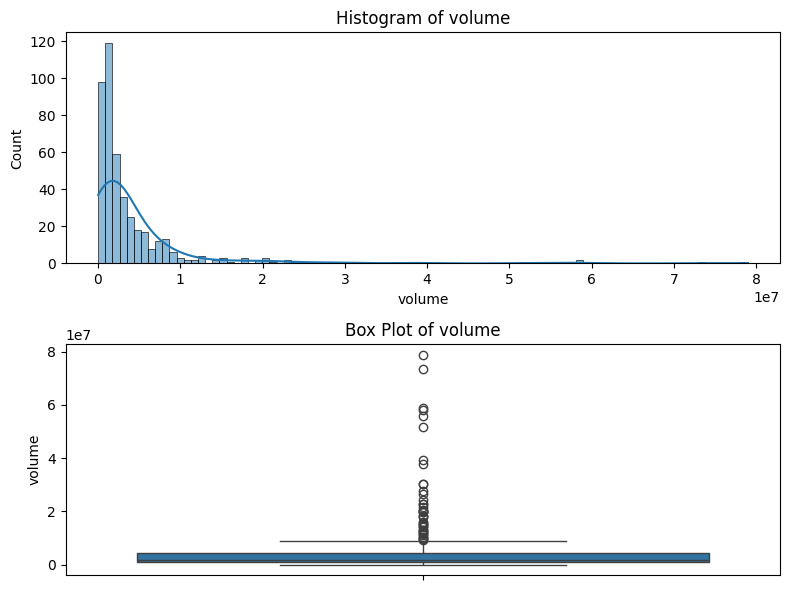

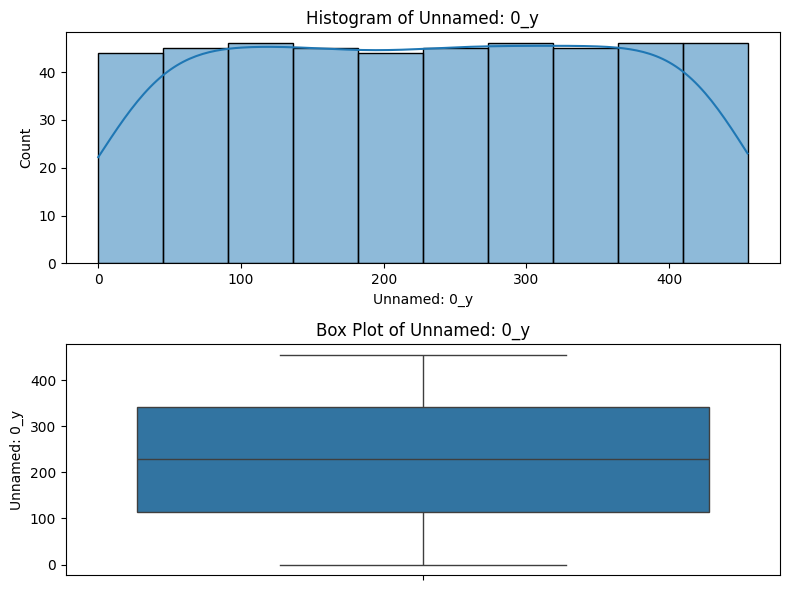

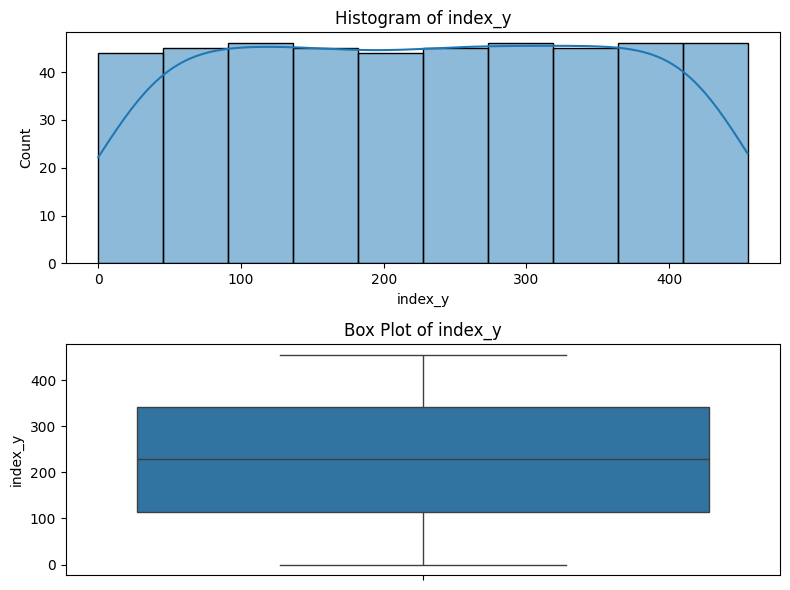

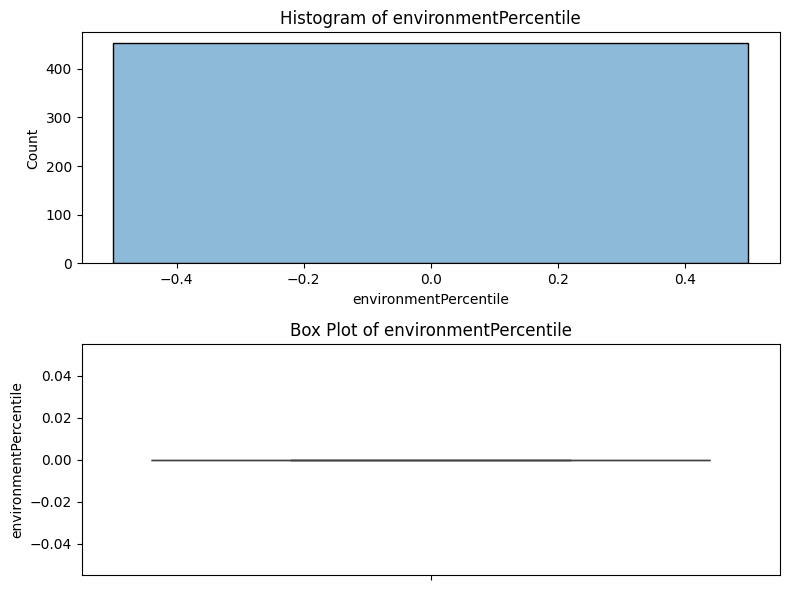

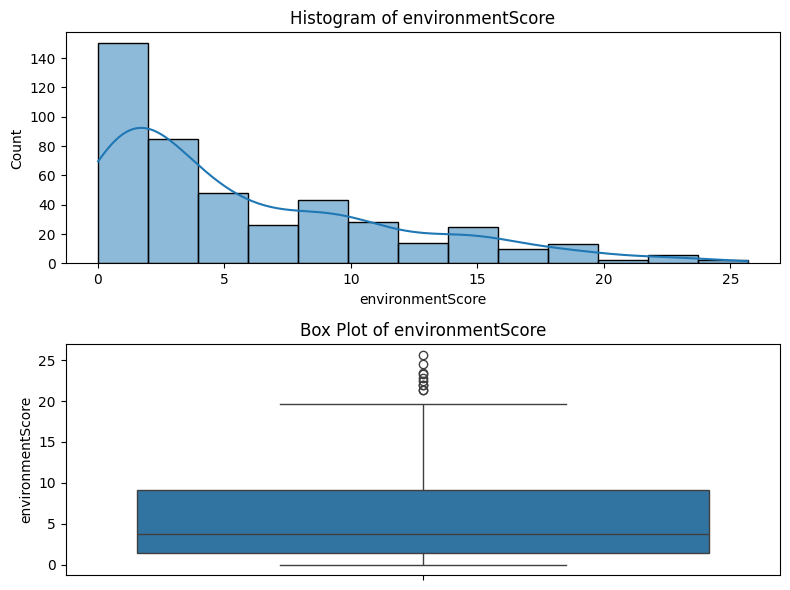

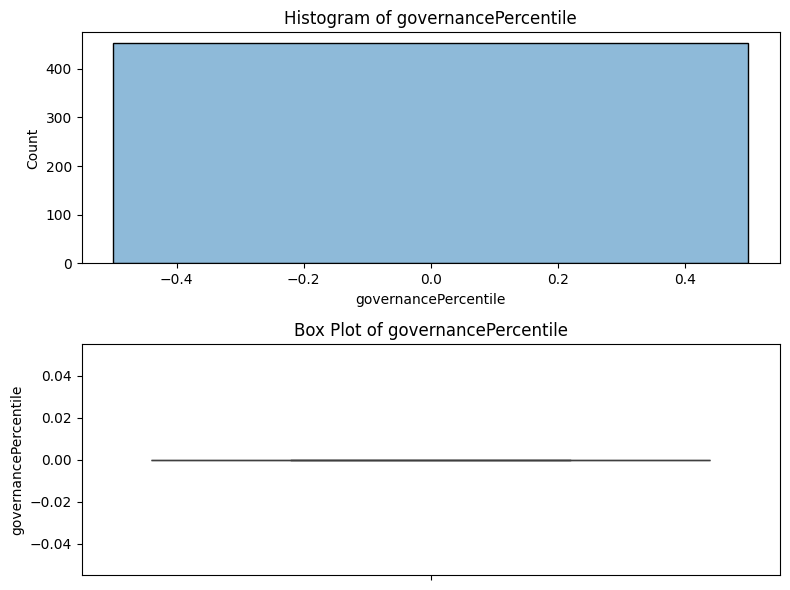

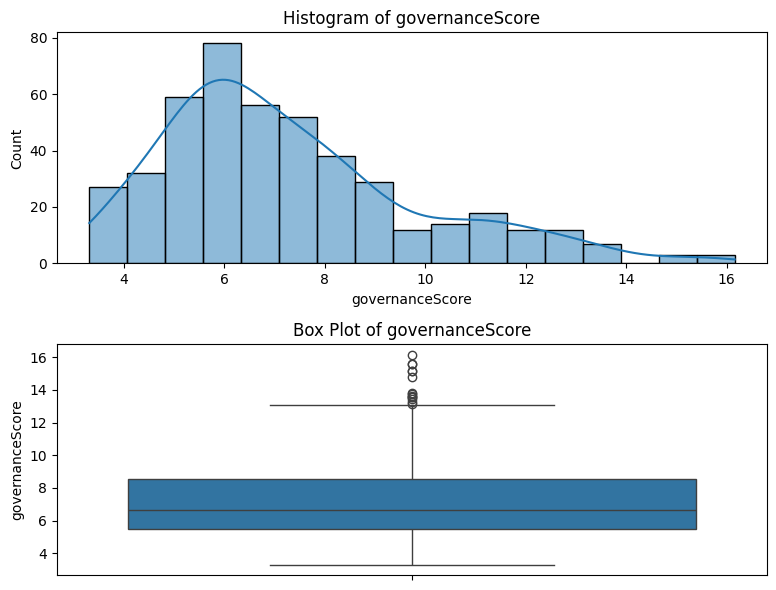

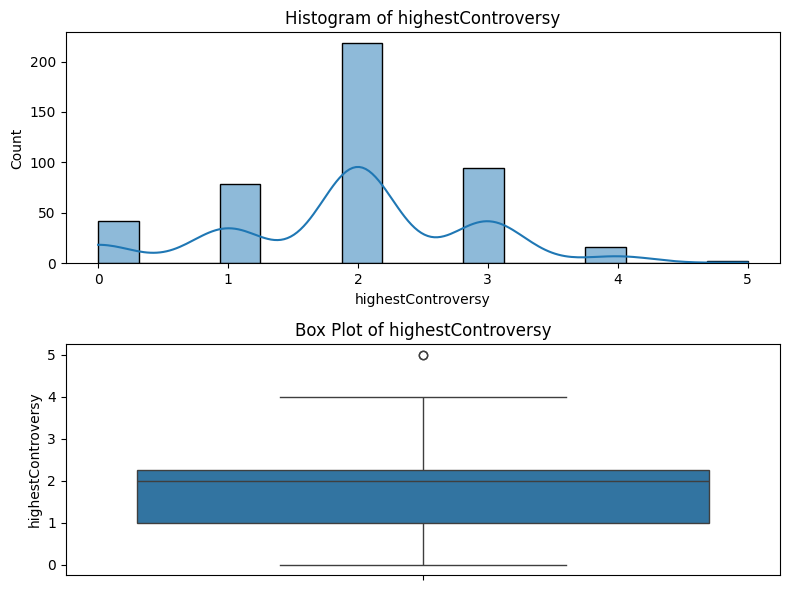

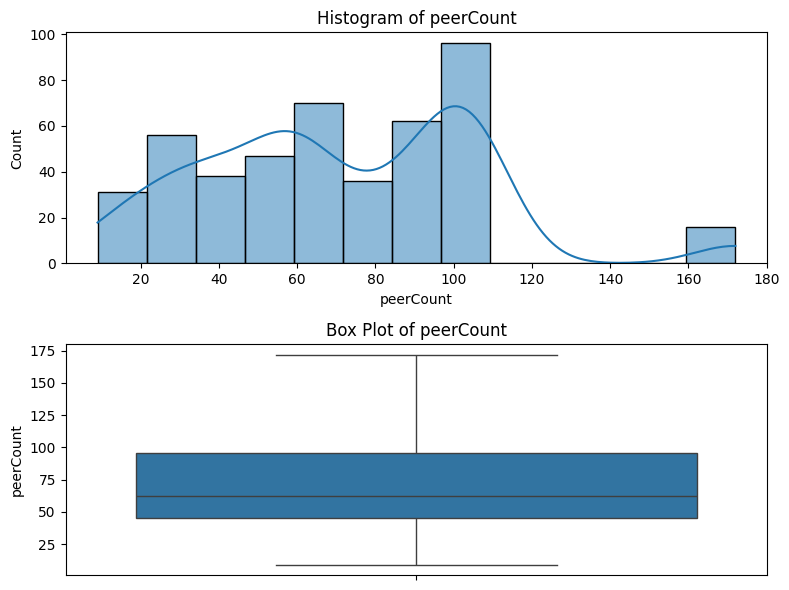

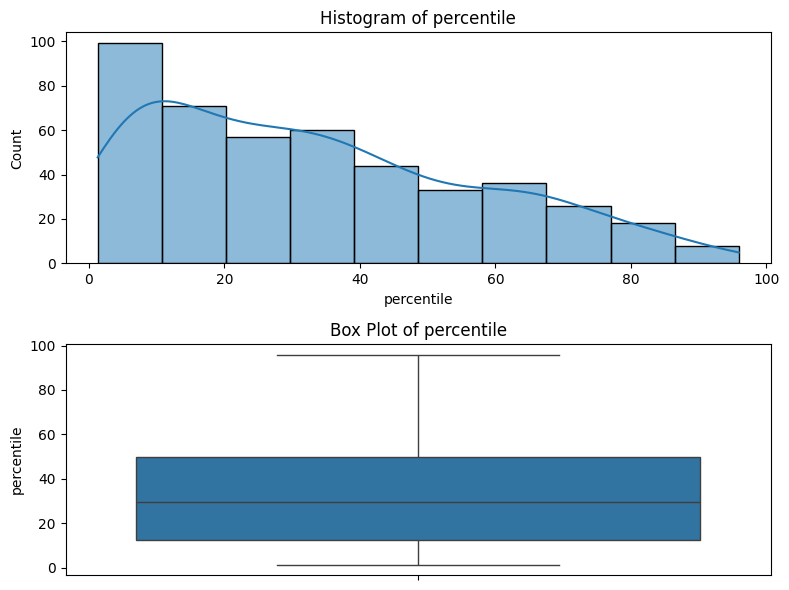

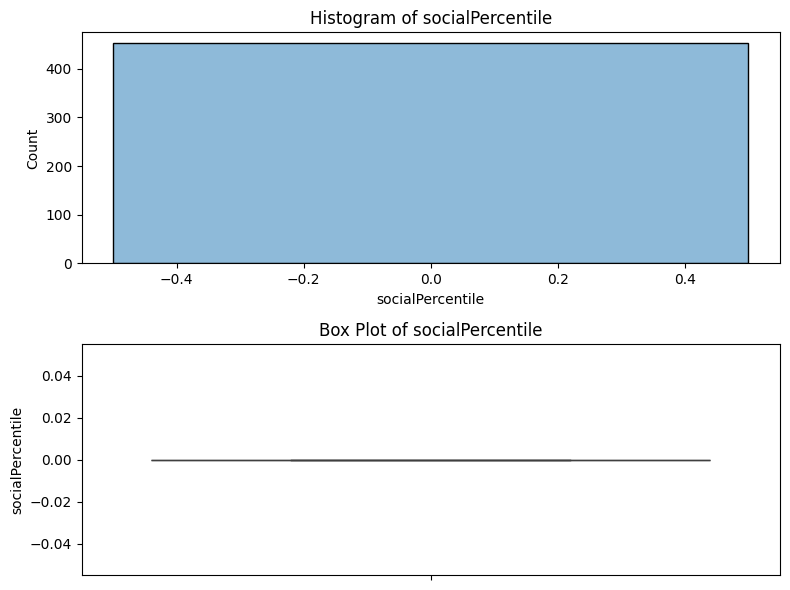

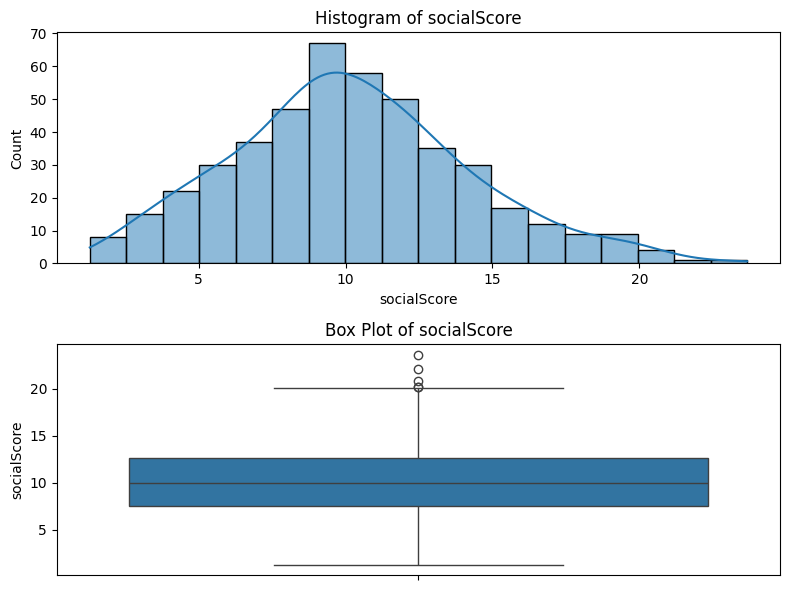

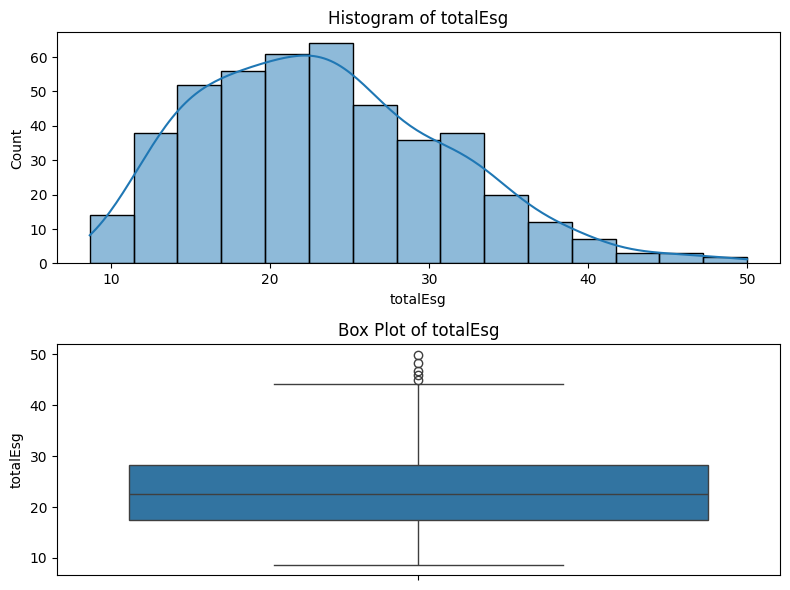

In [ ]:
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed

    # Histogram
    plt.subplot(2, 1, 1)  # Create a subplot for the histogram
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Histogram of {column}')

    # Box plot
    plt.subplot(2, 1, 2)  # Create a subplot for the box plot
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()  # Adjust subplot parameters for a tight layout
    plt.show()

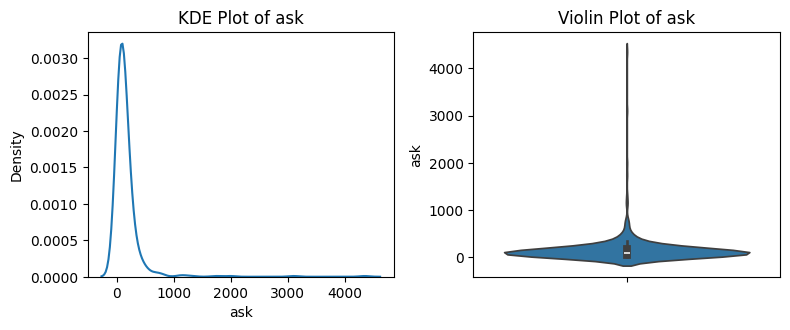

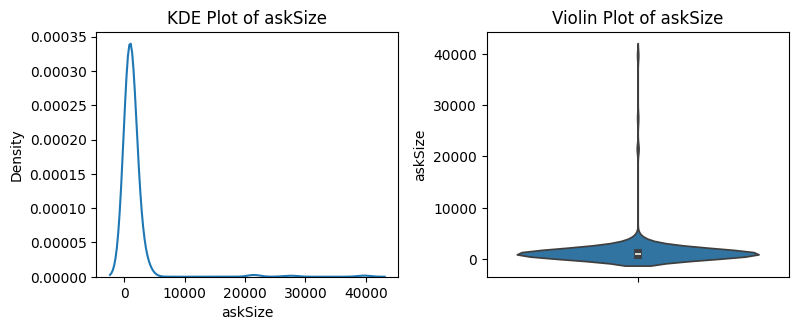

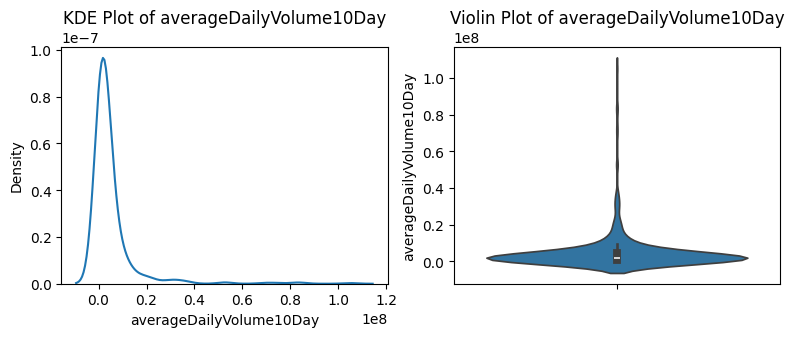

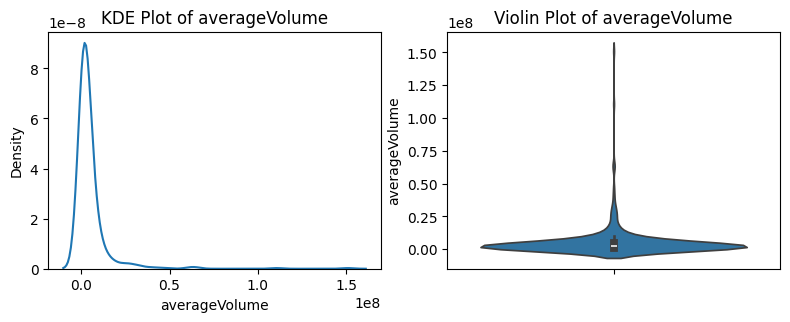

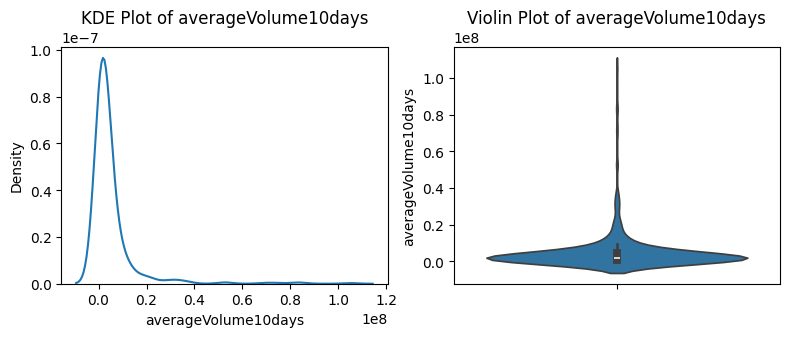

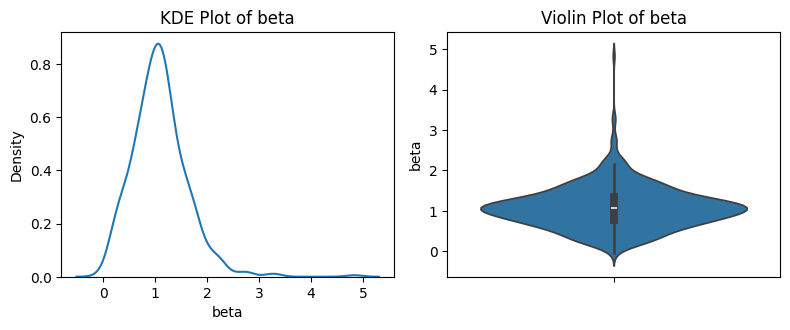

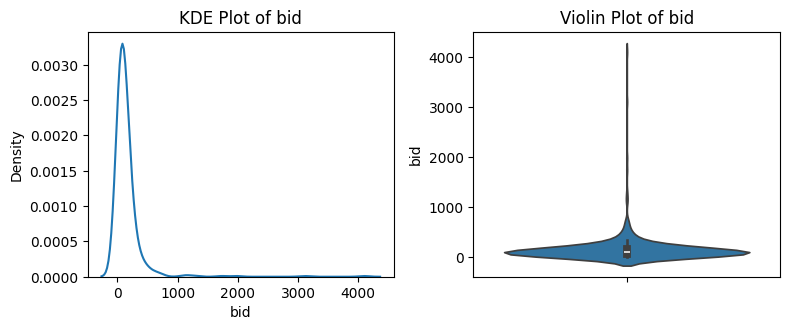

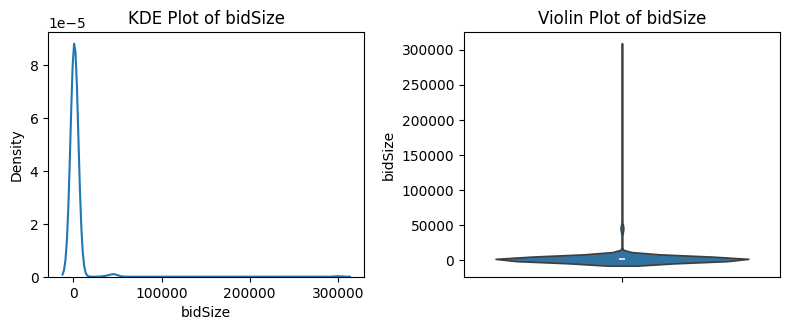

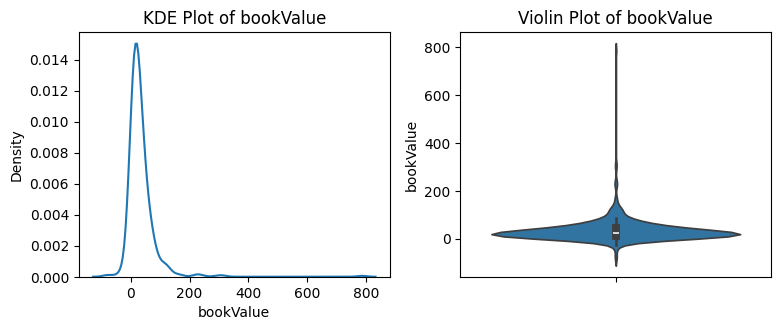

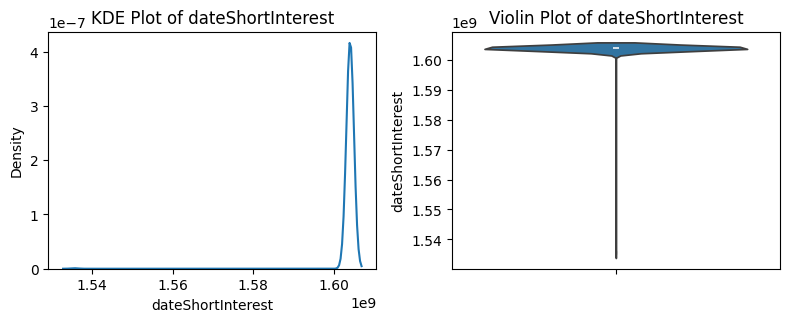

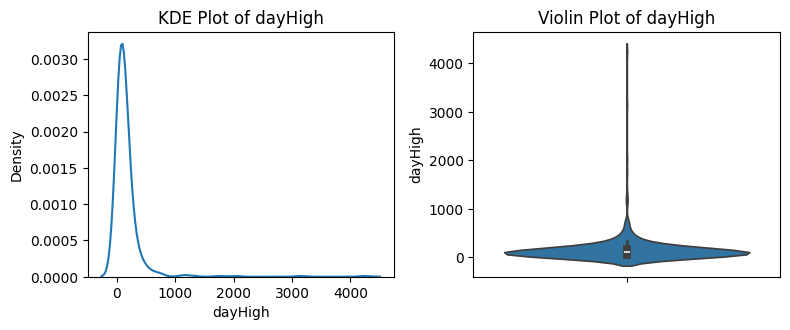

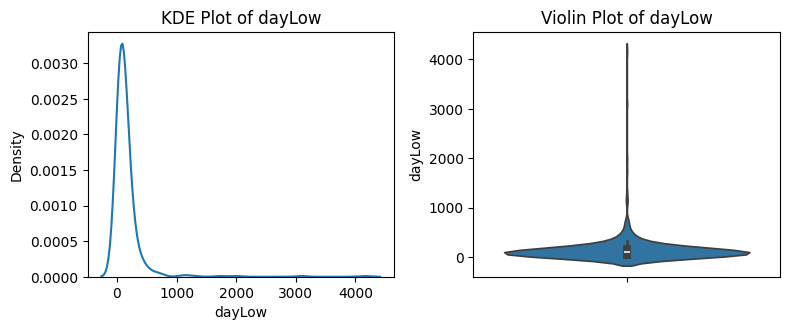

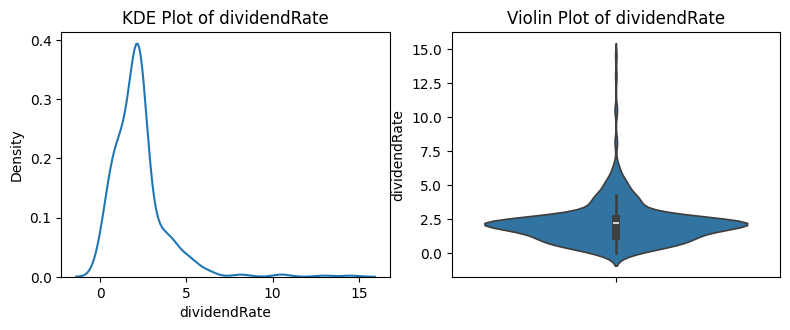

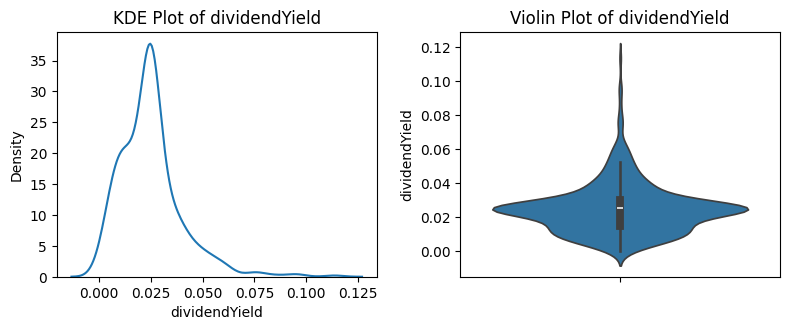

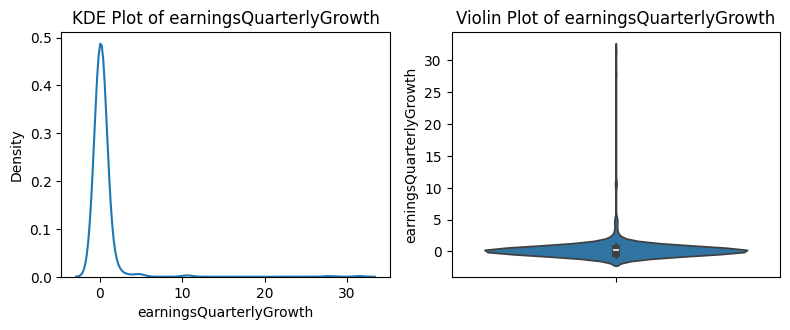

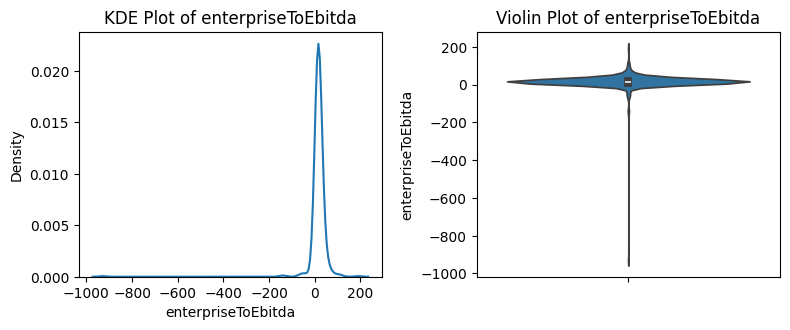

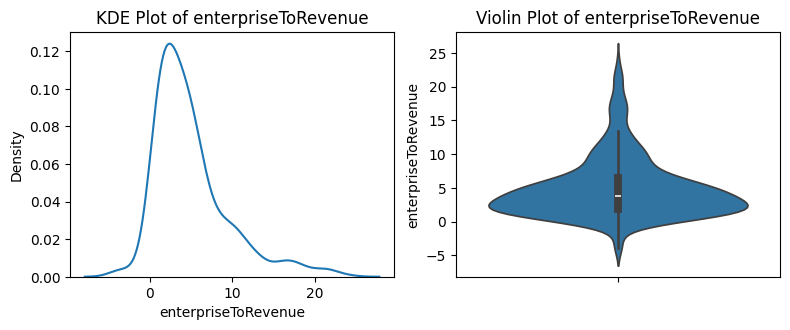

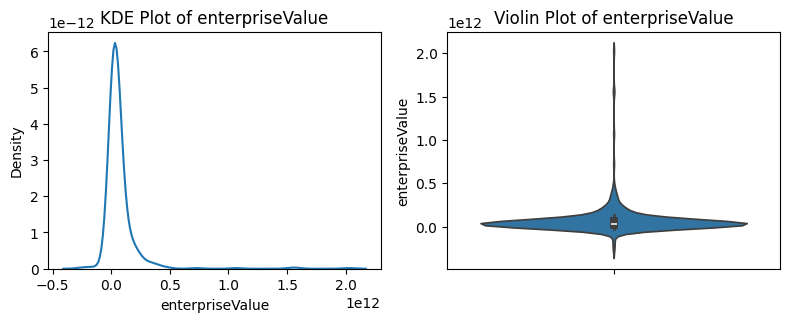

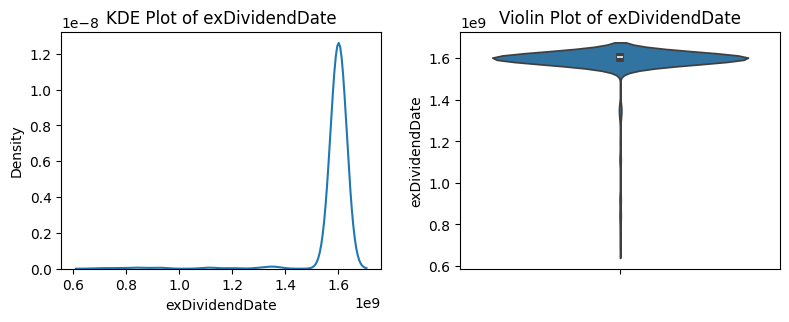

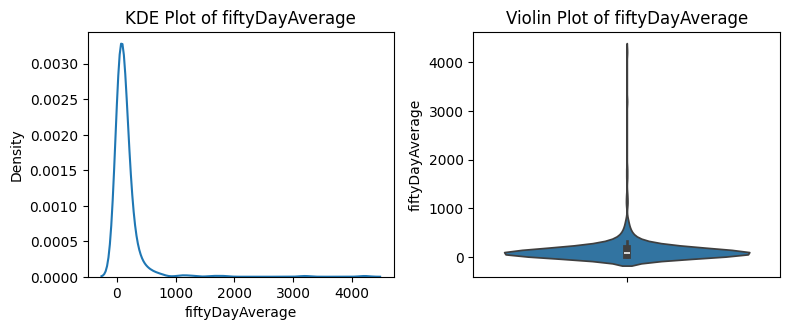

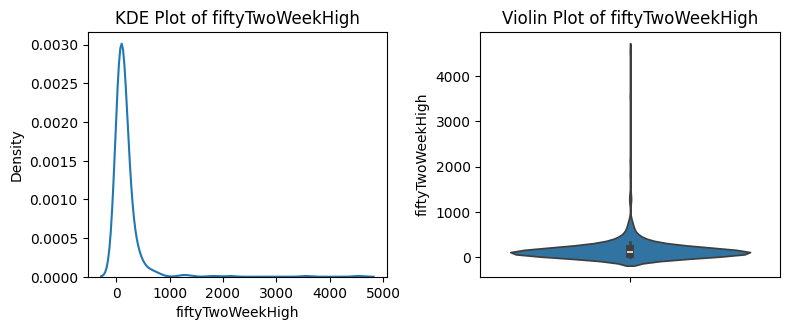

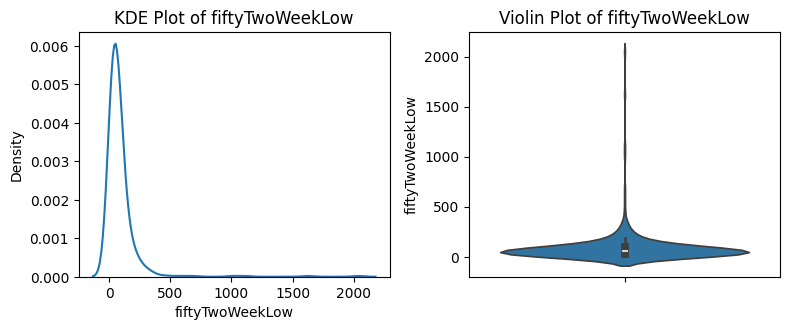

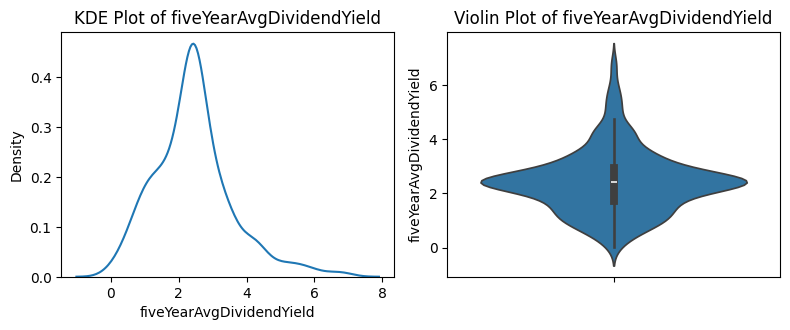

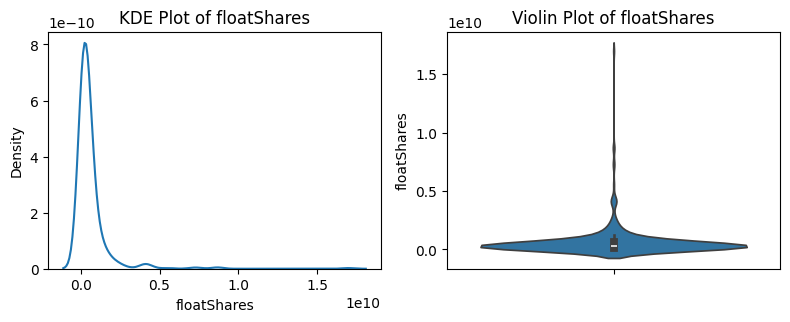

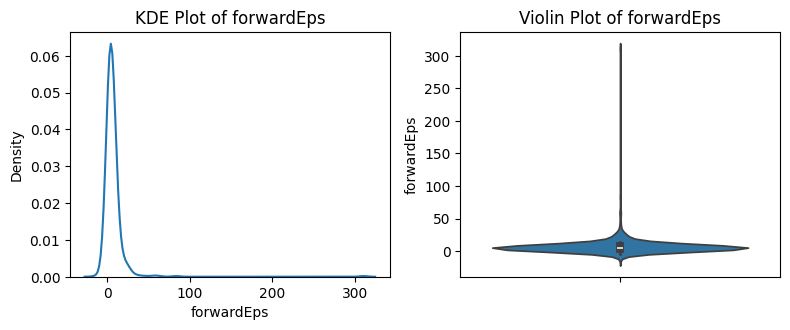

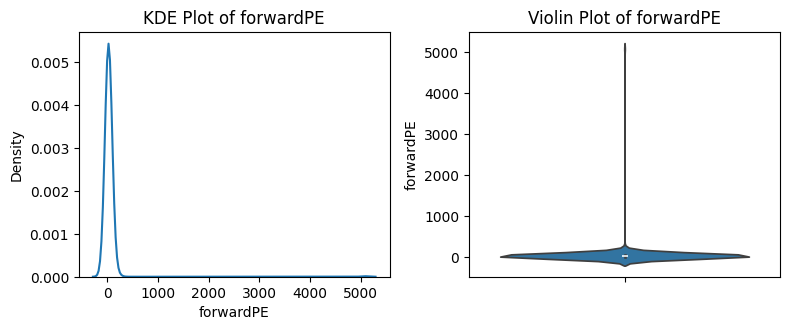

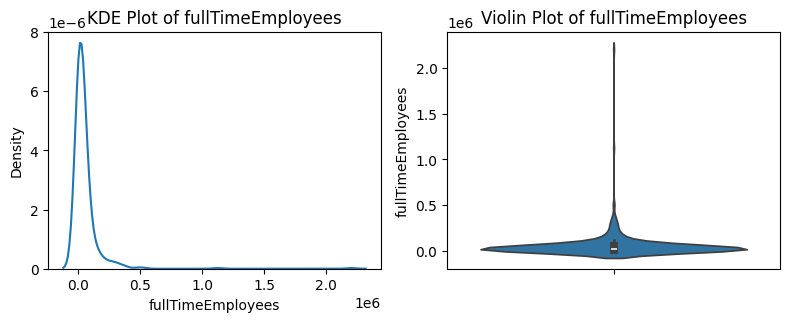

<ipython-input-93-cead403a2b44>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column].dropna())


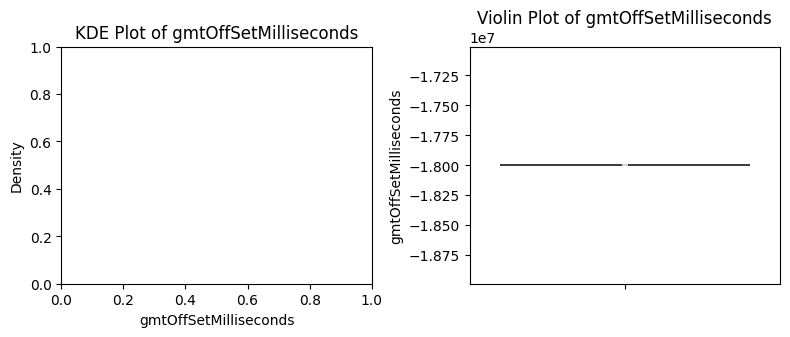

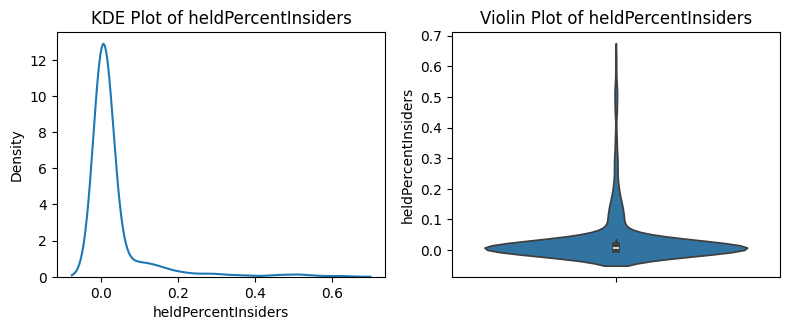

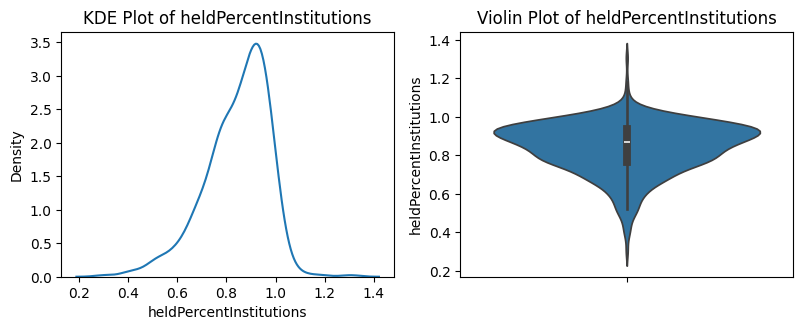

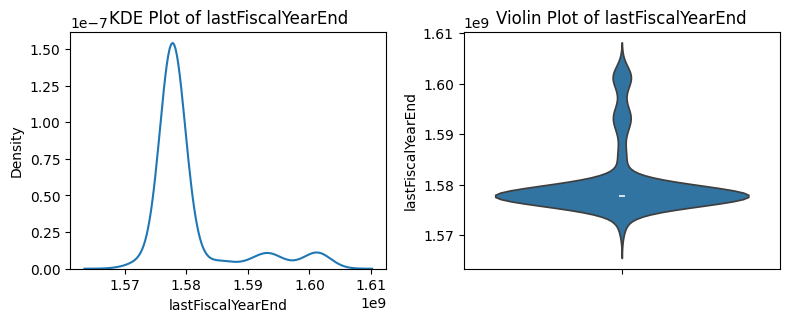

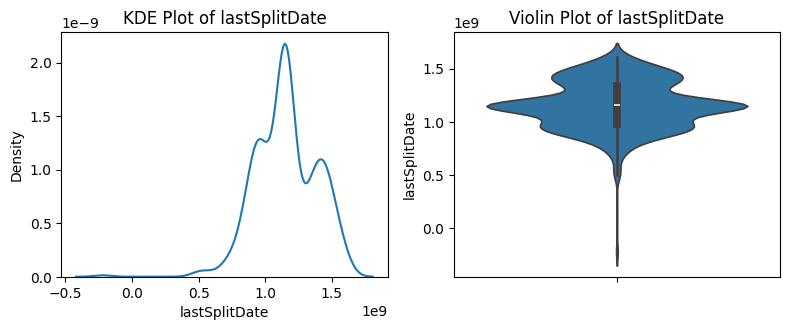

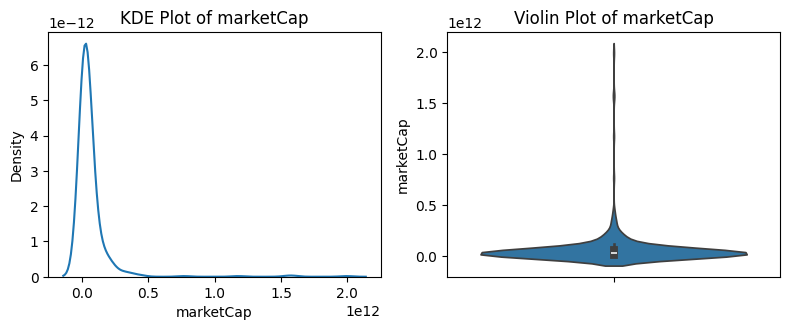

<ipython-input-93-cead403a2b44>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column].dropna())


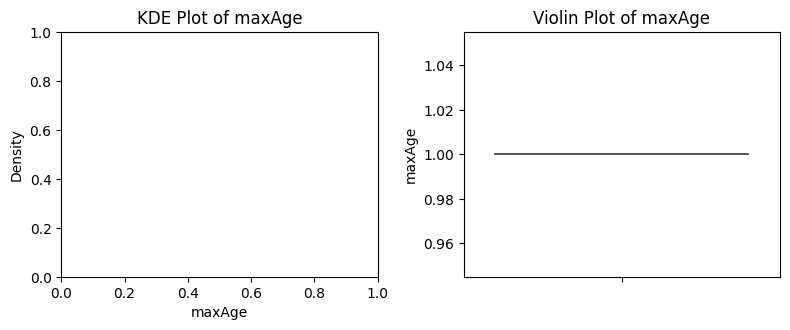

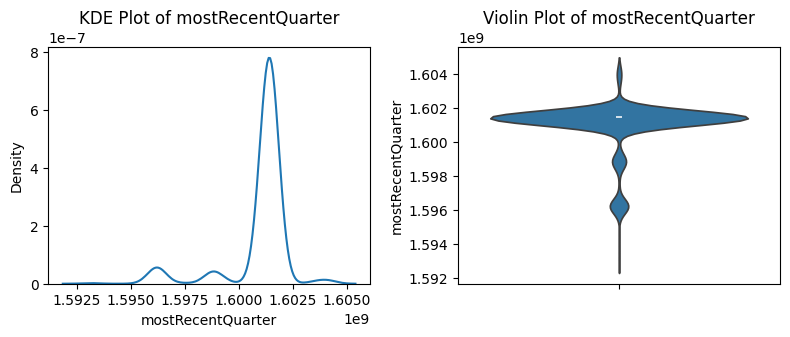

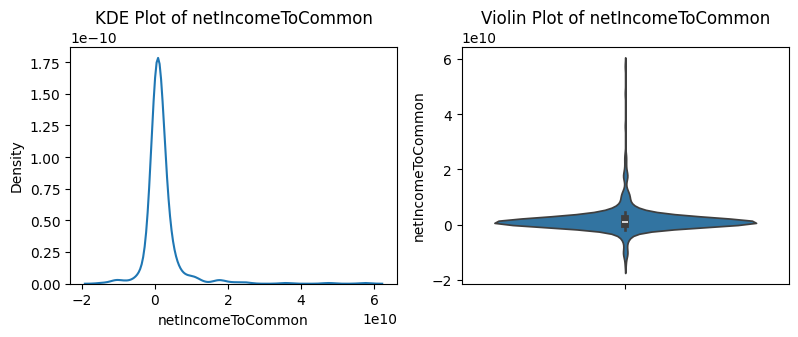

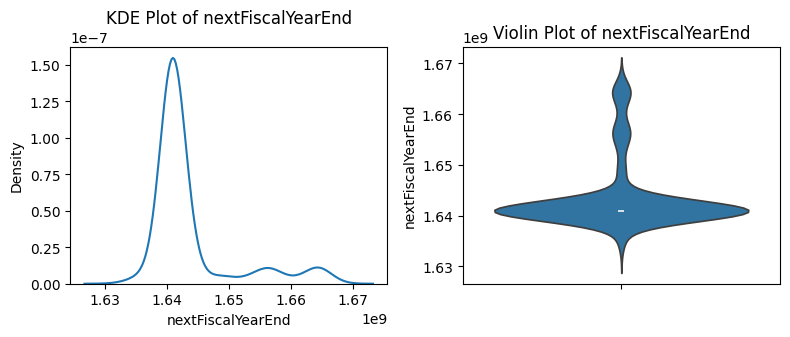

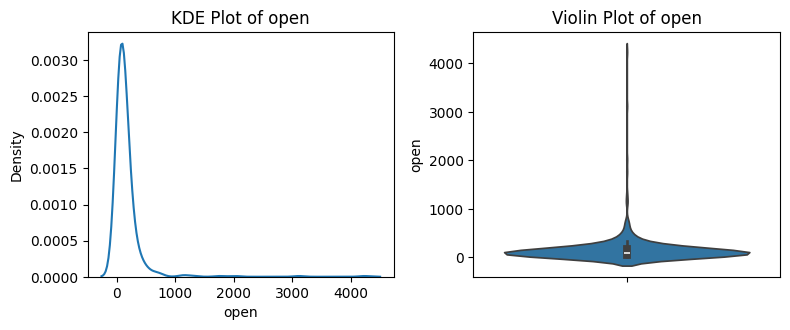

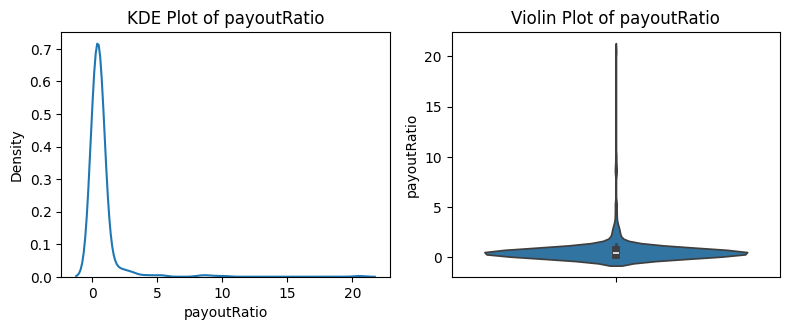

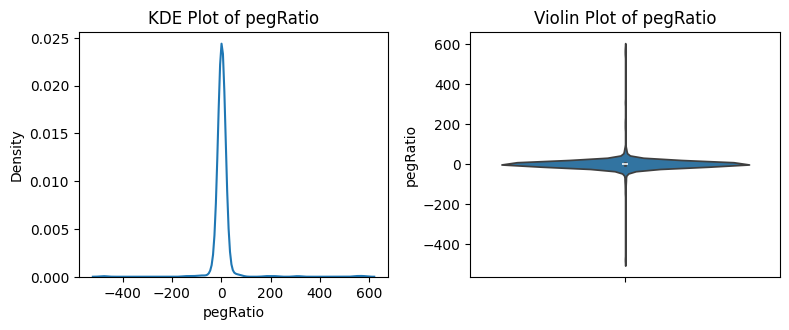

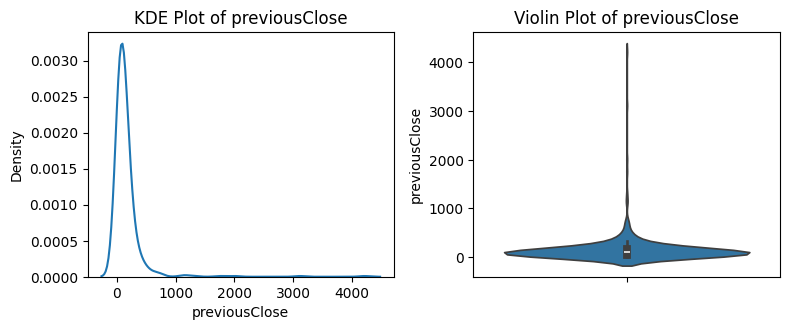

<ipython-input-93-cead403a2b44>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column].dropna())


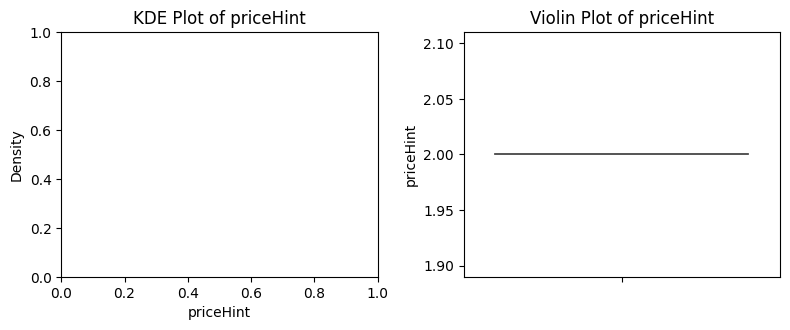

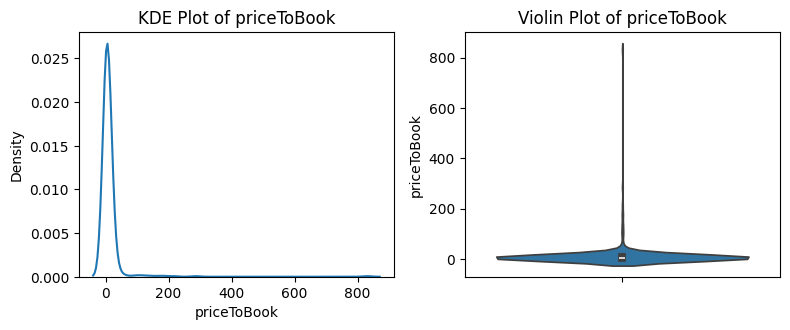

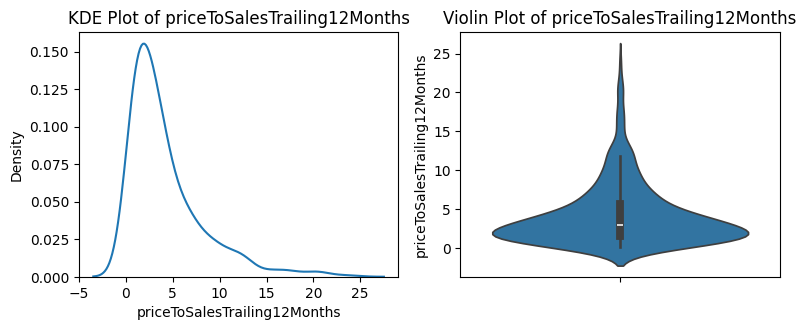

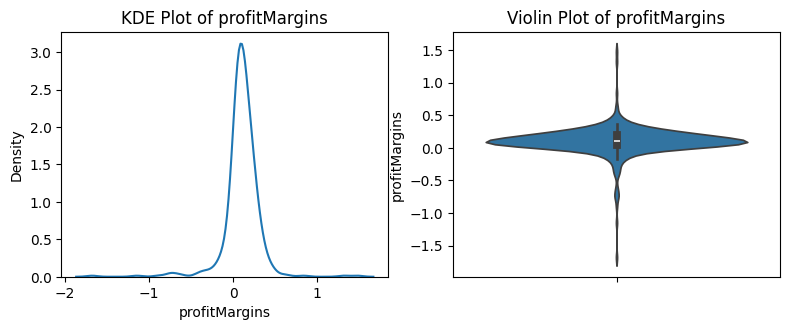

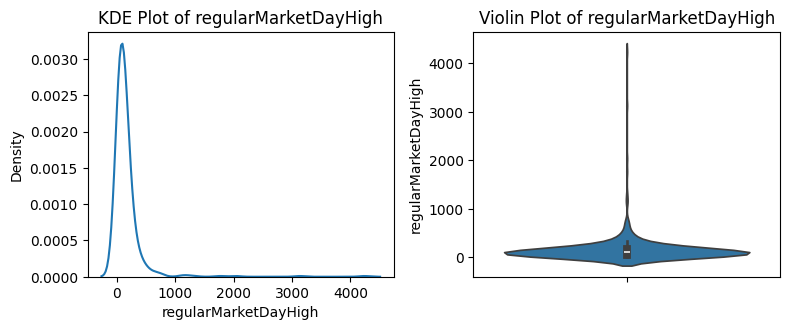

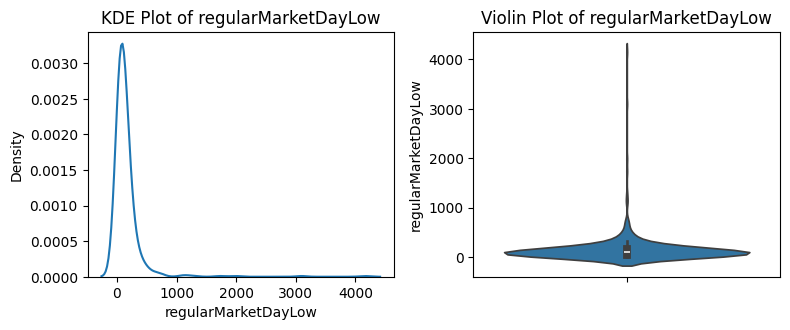

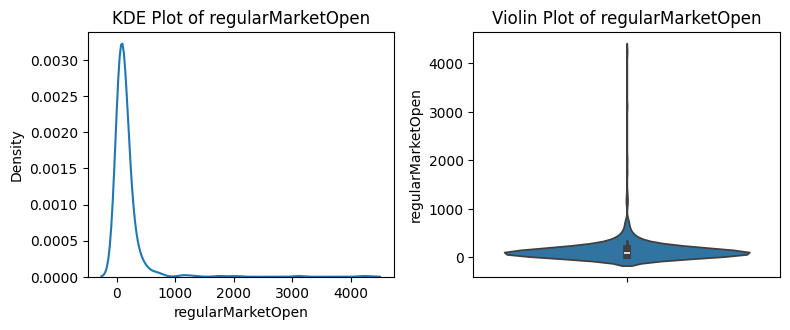

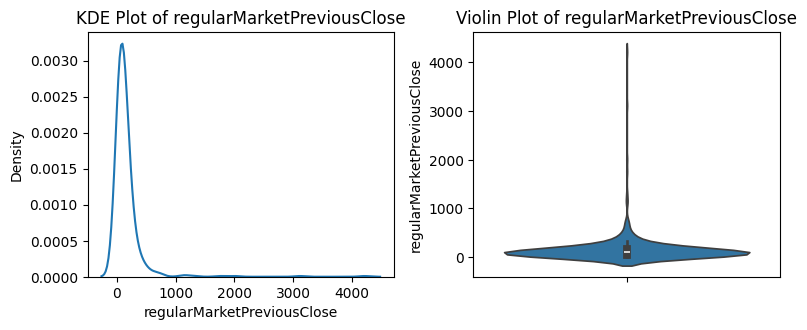

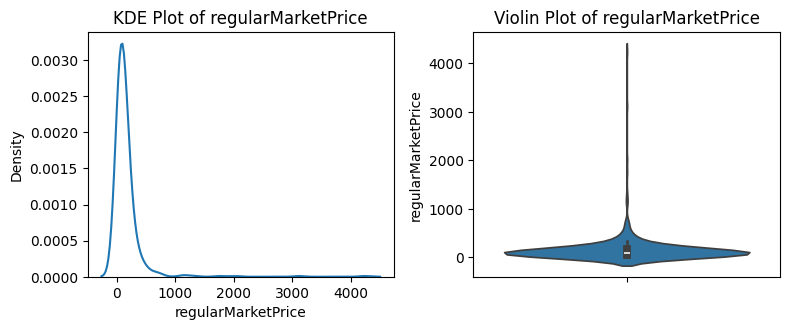

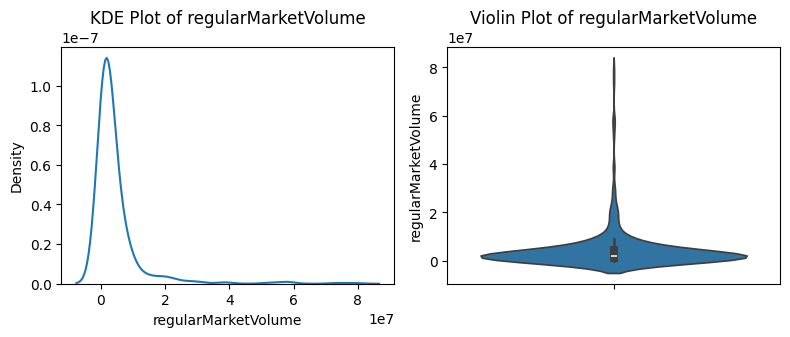

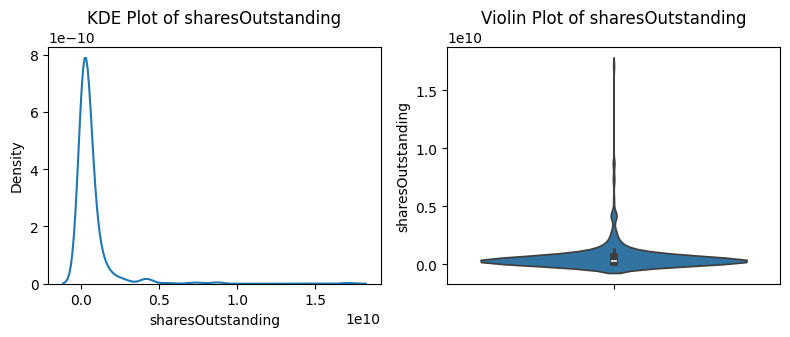

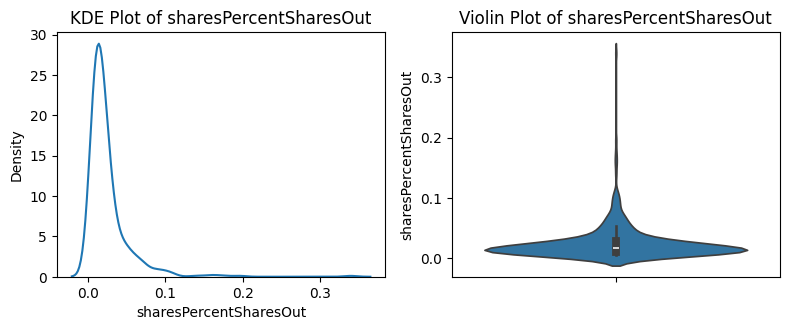

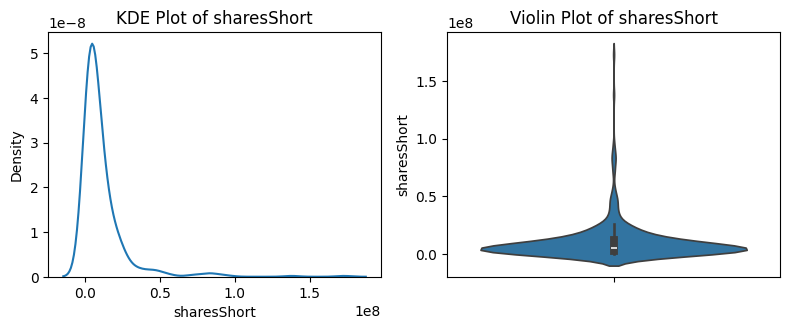

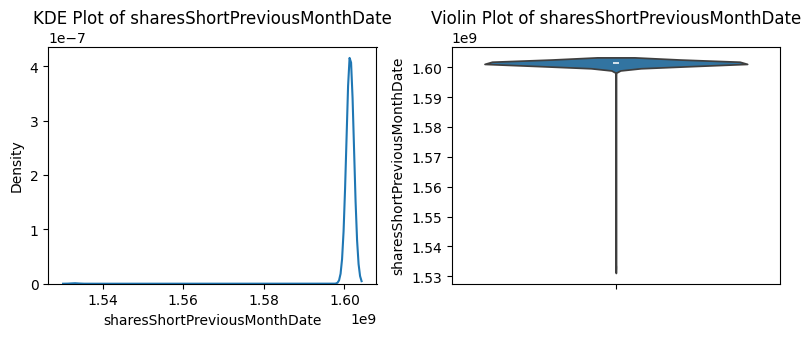

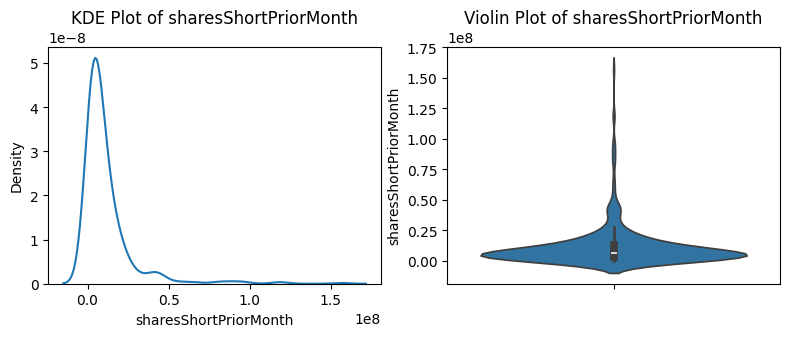

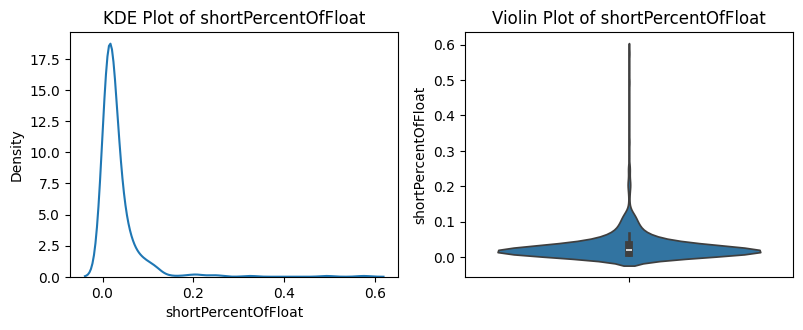

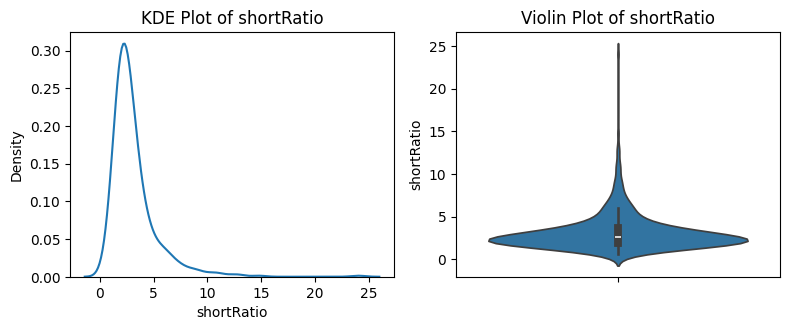

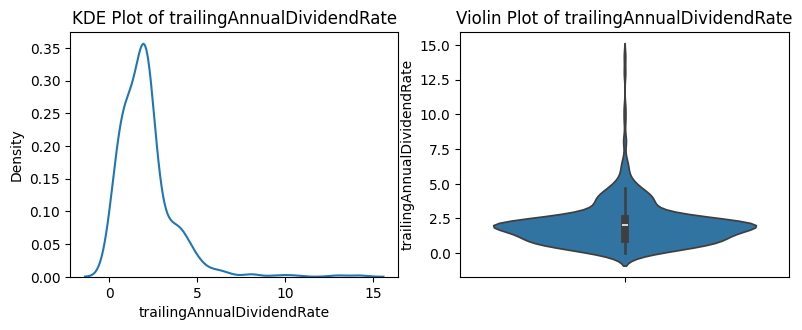

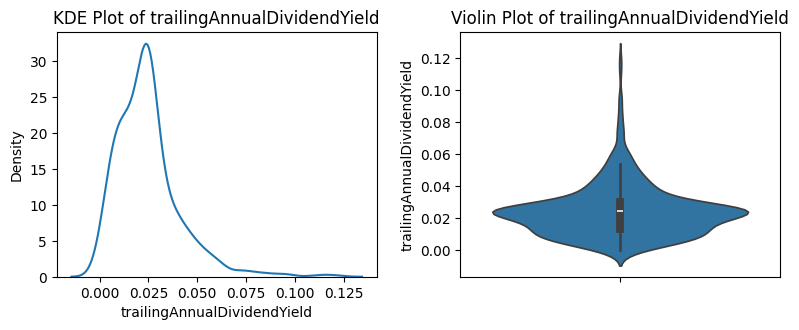

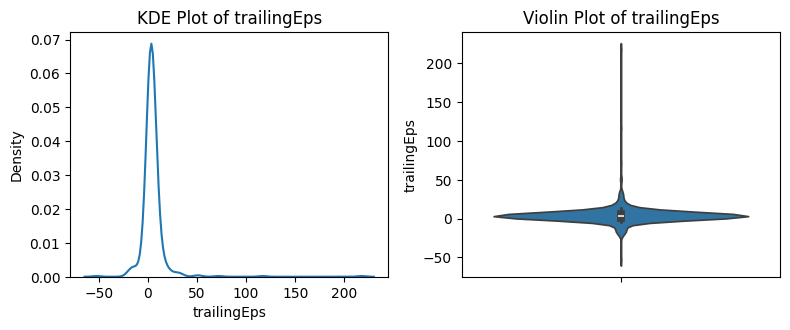

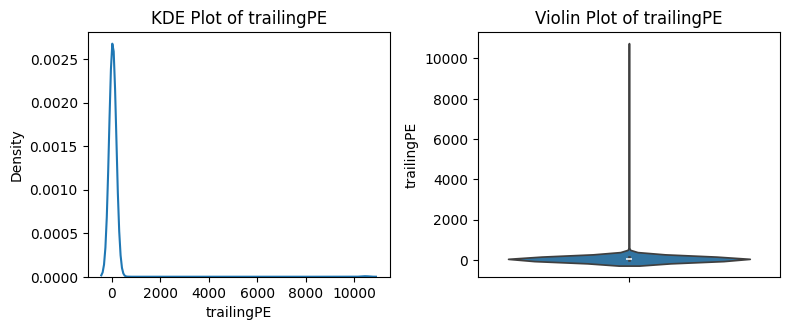

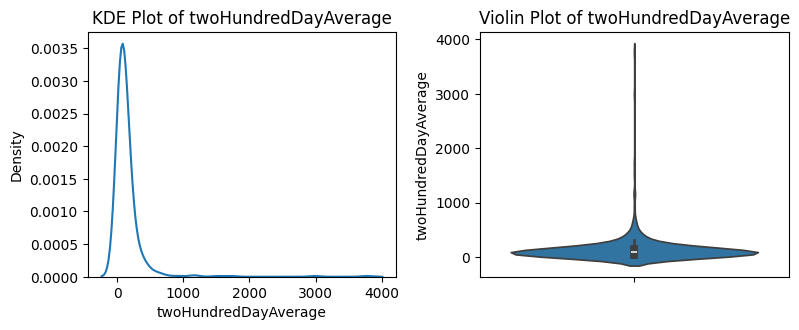

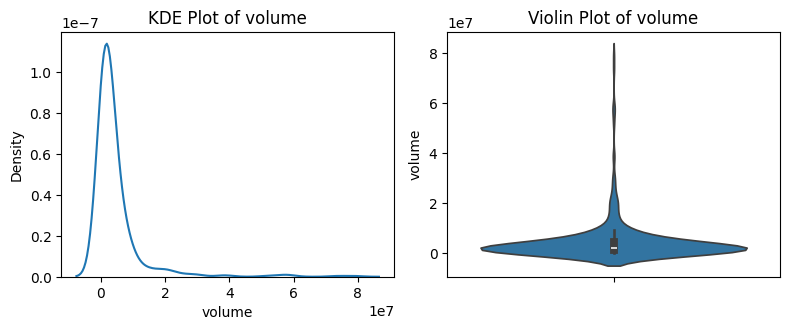

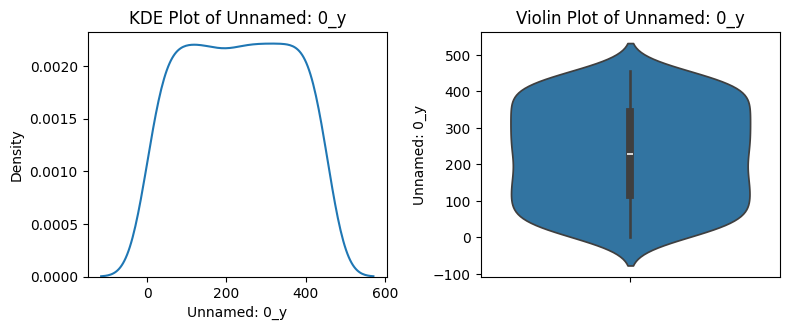

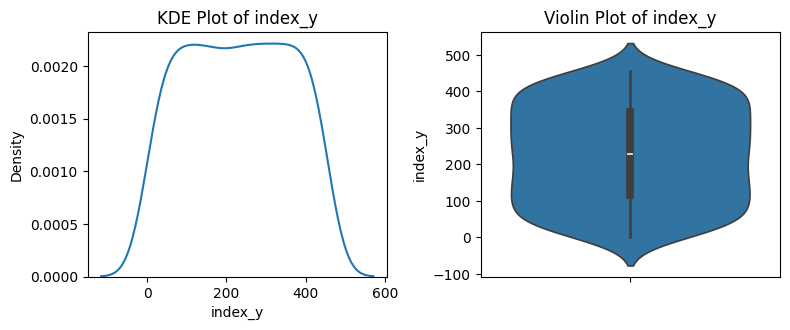

<ipython-input-93-cead403a2b44>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column].dropna())


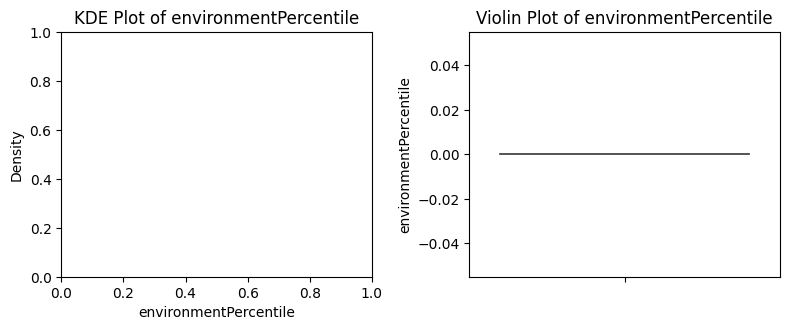

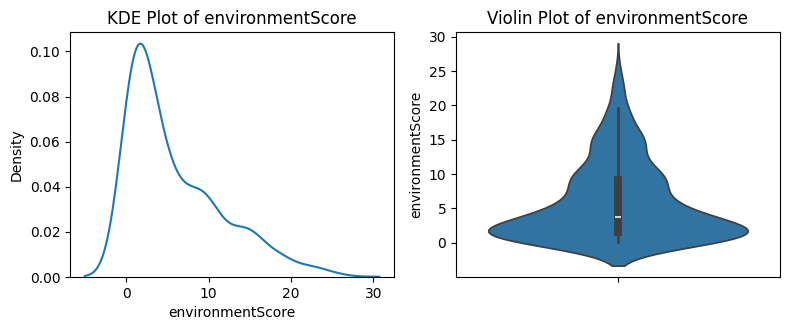

<ipython-input-93-cead403a2b44>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column].dropna())


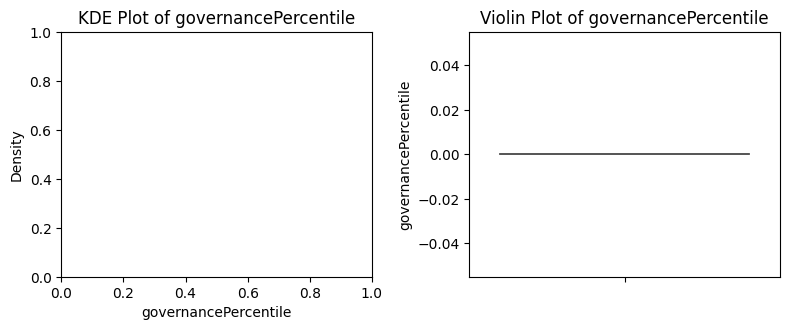

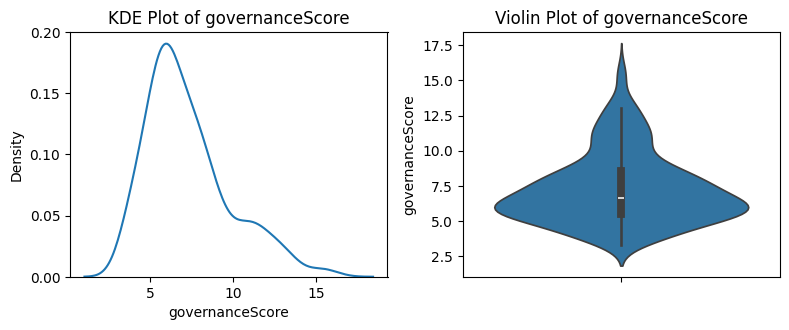

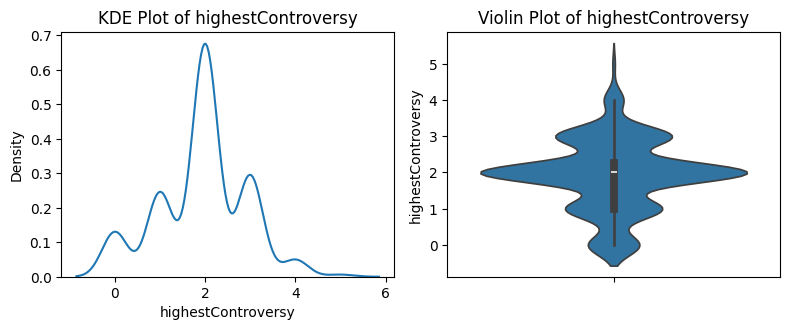

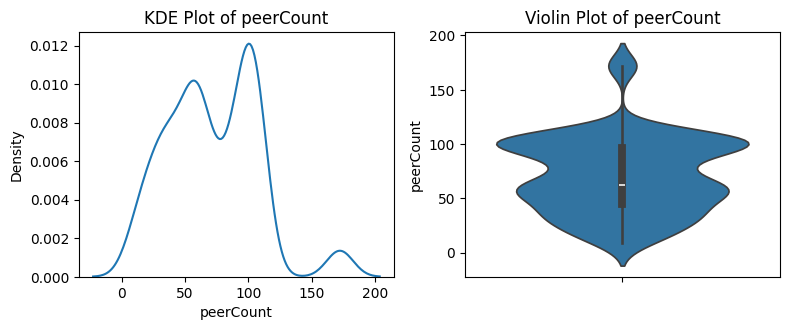

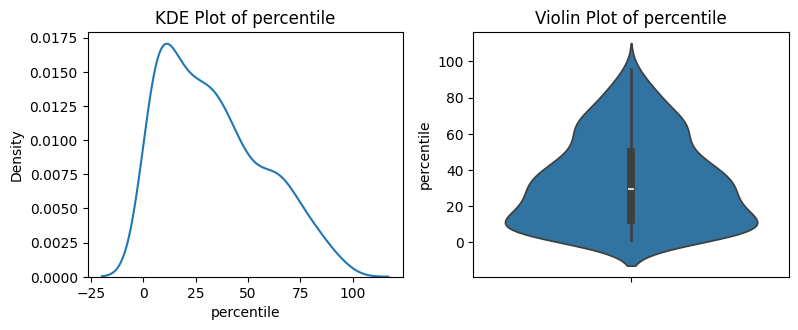

<ipython-input-93-cead403a2b44>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column].dropna())


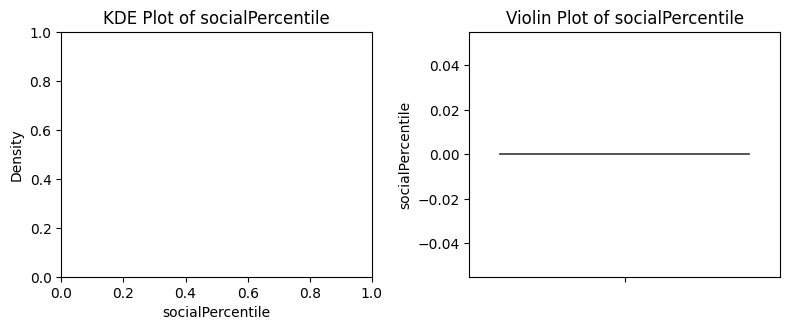

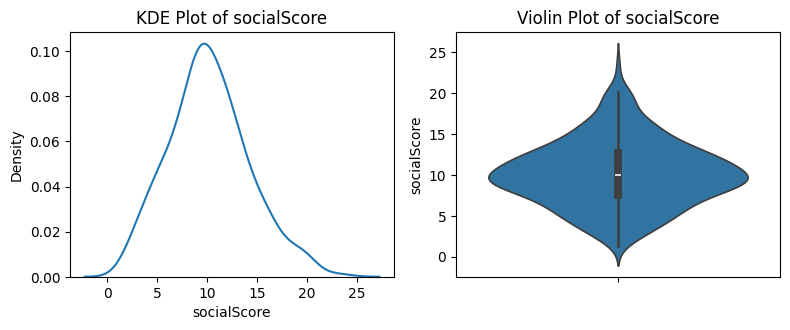

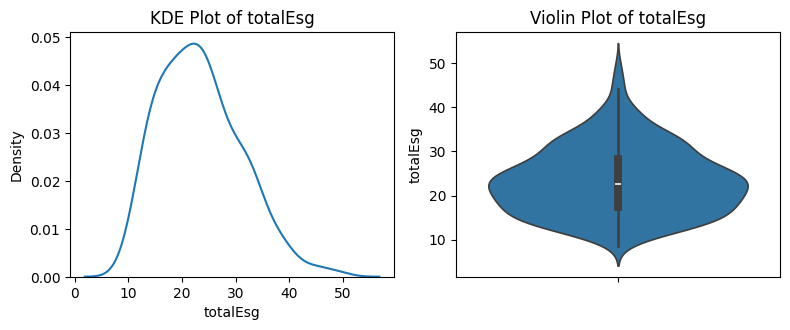

In [ ]:
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))
    # KDE plot
    plt.subplot(2, 2, 3)
    sns.kdeplot(df[column].dropna())
    plt.title(f"KDE Plot of {column}")

    # Violin Plot
    plt.subplot(2, 2, 4)
    sns.violinplot(y=df[column])
    plt.title(f"Violin Plot of {column}")

    plt.tight_layout()  # Adjust subplot parameters for a tight layout
    plt.show()

In [ ]:
# Get string columns
string_columns = df.select_dtypes(include=['object']).columns
print("String Columns:", string_columns.tolist())

String Columns: ['ticker', 'address1', 'city', 'companyOfficers', 'country', 'currency', 'exchange', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'industry', 'lastSplitFactor', 'logo_url', 'longBusinessSummary', 'longName', 'market', 'messageBoardId', 'phone', 'quoteType', 'sector', 'shortName', 'state', 'symbol', 'uuid', 'website', 'zip', 'Argus', 'B of A Securities', 'BMO Capital', 'Baird', 'Bank of America', 'Barclays', 'Citigroup', 'Credit Suisse', 'Deutsche Bank', 'Evercore ISI Group', 'Goldman Sachs', 'JP Morgan', 'Jefferies', 'Morgan Stanley', 'RBC Capital', 'Raymond James', 'Stifel Nicolaus', 'SunTrust Robinson Humphrey', 'UBS', 'Wells Fargo', 'esgPerformance', 'peerGroup']


In [ ]:
# Fill missing values with a placeholder (e.g., 'Unknown')
df[string_columns] = df[string_columns].fillna('Unknown')
print("\nMissing values in string columns after filling:")
print(df[string_columns].isnull().sum())


Missing values in string columns after filling:
ticker                        0
address1                      0
city                          0
companyOfficers               0
country                       0
currency                      0
exchange                      0
exchangeTimezoneName          0
exchangeTimezoneShortName     0
industry                      0
lastSplitFactor               0
logo_url                      0
longBusinessSummary           0
longName                      0
market                        0
messageBoardId                0
phone                         0
quoteType                     0
sector                        0
shortName                     0
state                         0
symbol                        0
uuid                          0
website                       0
zip                           0
Argus                         0
B of A Securities             0
BMO Capital                   0
Baird                         0
Bank of America        

In [ ]:
import re

def clean_text(text):
    if isinstance(text, str):
        # Lowercase the text
        text = text.lower()
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Strip extra whitespace
        text = text.strip()
    return text

# Apply cleaning to string columns
for col in string_columns:
    df[col] = df[col].apply(clean_text)
print("\nDataFrame after text cleaning:")
print(df[string_columns].head())


DataFrame after text cleaning:
  ticker                 address1           city companyOfficers  \
0      a  stevens creek boulevard    santa clara                   
1    aal            skyview drive     fort worth                   
2    aap      east millbrook road        raleigh                   
3   aapl       one apple park way      cupertino                   
4   abbv      north waukegan road  north chicago                   

         country currency exchange exchangeTimezoneName  \
0  united states      usd      nyq       americanewyork   
1  united states      usd      nms       americanewyork   
2  united states      usd      nyq       americanewyork   
3  united states      usd      nms       americanewyork   
4  united states      usd      nyq       americanewyork   

  exchangeTimezoneShortName                   industry  ... Jefferies  \
0                       est      diagnostics  research  ...      main   
1                       est                   airlines  ..

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in string_columns:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for inverse transformation if needed
print("\nDataFrame after Label Encoding:")
print(df[[col + '_encoded' for col in string_columns]].head())


DataFrame after Label Encoding:
   ticker_encoded  address1_encoded  city_encoded  companyOfficers_encoded  \
0               0               328           182                        0   
1               1               301            64                        0   
2               2                70           160                        0   
3               3               210            46                        0   
4               4               197           138                        0   

   country_encoded  currency_encoded  exchange_encoded  \
0                4                 0                 2   
1                4                 0                 1   
2                4                 0                 2   
3                4                 0                 1   
4                4                 0                 2   

   exchangeTimezoneName_encoded  exchangeTimezoneShortName_encoded  \
0                             0                                  0   
1        

<ipython-input-97-57dd1f1717c6>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + '_encoded'] = le.fit_transform(df[col])
<ipython-input-97-57dd1f1717c6>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + '_encoded'] = le.fit_transform(df[col])
<ipython-input-97-57dd1f1717c6>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

In [ ]:
# Apply One-Hot Encoding to categorical columns
df_onehot = pd.get_dummies(df, columns=string_columns, prefix=string_columns)
print("\nDataFrame after One-Hot Encoding:")
print(df_onehot.head())


DataFrame after One-Hot Encoding:
      ask  askSize  averageDailyVolume10Day  averageVolume  \
0  110.99      800                  1769771        1260625   
1   12.58    21500                 73706642       65027560   
2  144.33      800                  1209657         797810   
3  117.09     1100                 82003528      150914918   
4  101.00      800                  8693342        8248354   

   averageVolume10days      beta     bid  bidSize  bookValue  \
0              1769771  1.032694  111.14      800     16.142   
1             73706642  1.702367   12.58    42300    -10.869   
2              1209657  1.394588  144.57      900     55.346   
3             82003528  1.354002  117.02      900      3.849   
4              8693342  0.686020  100.50     1100      8.650   

   dateShortInterest  ...  peerGroup_retailing  peerGroup_semiconductors  \
0       1.604016e+09  ...                False                     False   
1       1.604016e+09  ...                False         

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF to text columns (e.g., 'longBusinessSummary')
tfidf = TfidfVectorizer(max_features=100)  # Limit to 100 features for simplicity
tfidf_matrix = tfidf.fit_transform(df['longBusinessSummary']).toarray()
tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())
print("\nTF-IDF Matrix for 'longBusinessSummary':")
print(tfidf_df.head())


TF-IDF Matrix for 'longBusinessSummary':
   addition      also  america        an       and  applications  \
0  0.000000  0.000000      0.0  0.000000  0.682011      0.000000   
1  0.000000  0.000000      0.0  0.000000  0.260883      0.000000   
2  0.049244  0.031004      0.0  0.000000  0.878455      0.000000   
3  0.066565  0.125728      0.0  0.000000  0.669836      0.167278   
4  0.076064  0.047890      0.0  0.273016  0.417506      0.000000   

   approximately        as  banking     brand  ...        to     under  \
0       0.000000  0.188765      0.0  0.000000  ...  0.034951  0.000000   
1       0.138259  0.173295      0.0  0.000000  ...  0.064173  0.000000   
2       0.000000  0.024937      0.0  0.066312  ...  0.000000  0.052029   
3       0.000000  0.134833      0.0  0.000000  ...  0.037447  0.000000   
4       0.000000  0.077037      0.0  0.000000  ...  0.385123  0.000000   

     united   various       was      well     which      with  worldwide  \
0  0.000000  0.000000  0.030

In [ ]:
# Combine all features
df_final = pd.concat([df.drop(columns=string_columns), df_onehot, tfidf_df], axis=1)
print("\nFinal Preprocessed DataFrame:")
print(df_final.head())


Final Preprocessed DataFrame:
      ask  askSize  averageDailyVolume10Day  averageVolume  \
0  110.99      800                  1769771        1260625   
1   12.58    21500                 73706642       65027560   
2  144.33      800                  1209657         797810   
3  117.09     1100                 82003528      150914918   
4  101.00      800                  8693342        8248354   

   averageVolume10days      beta     bid  bidSize  bookValue  \
0              1769771  1.032694  111.14      800     16.142   
1             73706642  1.702367   12.58    42300    -10.869   
2              1209657  1.394588  144.57      900     55.346   
3             82003528  1.354002  117.02      900      3.849   
4              8693342  0.686020  100.50     1100      8.650   

   dateShortInterest  ...        to     under    united   various       was  \
0       1.604016e+09  ...  0.034951  0.000000  0.000000  0.000000  0.030567   
1       1.604016e+09  ...  0.064173  0.000000  0.0000

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical columns (e.g., '52WeekChange', 'totalEsg')
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df_final[numerical_columns] = scaler.fit_transform(df_final[numerical_columns])
print("\nDataFrame after Normalization:")
print(df_final.head())


DataFrame after Normalization:
        ask   askSize  averageDailyVolume10Day  averageVolume  \
0  0.025486  0.000000                 0.016676       0.008214   
1  0.002889  0.528061                 0.702306       0.430809   
2  0.033141  0.000000                 0.011337       0.005147   
3  0.026886  0.007653                 0.781384       1.000000   
4  0.023192  0.000000                 0.082664       0.054523   

   averageVolume10days      beta       bid   bidSize  bookValue  \
0             0.016676  0.220644  0.027104  0.000000   0.112711   
1             0.702306  0.357811  0.003068  0.138518   0.081540   
2             0.011337  0.294770  0.035256  0.000334   0.157953   
3             0.781384  0.286456  0.028538  0.000334   0.098525   
4             0.082664  0.149636  0.024509  0.001001   0.104065   

   dateShortInterest  ...        to     under    united   various       was  \
0                1.0  ...  0.034951  0.000000  0.000000  0.000000  0.030567   
1               

In [ ]:
X = df_final
print("Feature Matrix Shape:", X.shape)

Feature Matrix Shape: (452, 4895)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(X)
print("Cosine Similarity Matrix Shape:", cosine_sim.shape)

Cosine Similarity Matrix Shape: (452, 452)


In [ ]:
def recommend_items(ticker, cosine_sim_matrix, df, top_n=5):
    """
    Recommend similar items based on cosine similarity.

    Parameters:
        ticker (str): The ticker symbol of the item.
        cosine_sim_matrix (array): Cosine similarity matrix.
        df (DataFrame): The original DataFrame with item details.
        top_n (int): Number of recommendations to return.

    Returns:
        DataFrame: Top N recommended items.
    """
    # Find the index of the item
    idx = df[df['ticker'] == ticker].index[0]

    # Get pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))

    # Sort items by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N similar items (excluding itself)
    sim_scores = sim_scores[1:top_n+1]

    # Get item indices
    item_indices = [i[0] for i in sim_scores]

    # Return top N recommended items
    return df.iloc[item_indices]

# Example: Recommend stocks similar to 'AAPL'
recommendations = recommend_items('AAPL', cosine_sim, df)
print("Recommendations for AAPL:")
print(recommendations[['ticker', 'longName', 'sector', 'totalEsg']])

Recommendations for AAPL:
    ticker             longName                  sector  totalEsg
181  GOOGL        Alphabet Inc.  Communication Services     22.85
103   CSCO  Cisco Systems, Inc.              Technology     12.35
136   EBAY            eBay Inc.       Consumer Cyclical     21.44
158     FB       Facebook, Inc.  Communication Services     31.40
213   INTC    Intel Corporation              Technology     15.39


# Collaborative Filtering (CF)

##User-Based Collaborative Filtering:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('/content/stocks_final_data.csv')

# Simulate user-item ratings (since your dataset doesn't have explicit ratings)
# We'll create a synthetic user-item matrix based on features like dividendYield, marketCap, and ESG scores
np.random.seed(42)
num_users = 100
num_items = len(df)

# Create a synthetic user-item ratings matrix
user_item_ratings = np.random.randint(1, 6, size=(num_users, num_items))  # Ratings range from 1 to 5
user_item_ratings = pd.DataFrame(user_item_ratings, columns=df['ticker'])

# Add some missing values (to simulate sparse data)
missing_mask = np.random.rand(num_users, num_items) < 0.7  # 70% of ratings are missing
user_item_ratings[missing_mask] = np.nan

# Function to compute cosine similarity
def cosine_sim(user1_ratings, user2_ratings):
    """
    Computes cosine similarity between two users.
    """
    # Remove NaN values (missing ratings)
    common_items = ~np.isnan(user1_ratings) & ~np.isnan(user2_ratings)
    user1_ratings = user1_ratings[common_items]
    user2_ratings = user2_ratings[common_items]

    # If no common items, return 0 similarity
    if len(user1_ratings) == 0:
        return 0

    # Compute cosine similarity
    return np.dot(user1_ratings, user2_ratings) / (np.linalg.norm(user1_ratings) * np.linalg.norm(user2_ratings))

# Function to compute Pearson correlation
def pearson_sim(user1_ratings, user2_ratings):
    """
    Computes Pearson correlation between two users.
    """
    # Remove NaN values (missing ratings)
    common_items = ~np.isnan(user1_ratings) & ~np.isnan(user2_ratings)
    user1_ratings = user1_ratings[common_items]
    user2_ratings = user2_ratings[common_items]

    # If no common items, return 0 similarity
    if len(user1_ratings) == 0:
        return 0

    # Compute Pearson correlation
    correlation, _ = pearsonr(user1_ratings, user2_ratings)
    return correlation

# Function to compute adjusted cosine similarity (mean-centered ratings)
def adjusted_cosine_sim(user1_ratings, user2_ratings):
    """
    Computes adjusted cosine similarity between two users.
    """
    # Remove NaN values (missing ratings)
    common_items = ~np.isnan(user1_ratings) & ~np.isnan(user2_ratings)
    user1_ratings = user1_ratings[common_items]
    user2_ratings = user2_ratings[common_items]

    # If no common items, return 0 similarity
    if len(user1_ratings) == 0:
        return 0

    # Mean-center the ratings
    user1_mean = np.mean(user1_ratings)
    user2_mean = np.mean(user2_ratings)
    user1_ratings_centered = user1_ratings - user1_mean
    user2_ratings_centered = user2_ratings - user2_mean

    # Compute adjusted cosine similarity
    return np.dot(user1_ratings_centered, user2_ratings_centered) / (
        np.linalg.norm(user1_ratings_centered) * np.linalg.norm(user2_ratings_centered)
    )

# Function to compute user-user similarity matrix
def compute_user_similarity_matrix(user_item_ratings, similarity_measure):
    """
    Computes the user-user similarity matrix using the specified similarity measure.
    """
    num_users = user_item_ratings.shape[0]
    user_similarity_matrix = np.zeros((num_users, num_users))

    for i in range(num_users):
        for j in range(num_users):
            if i == j:
                user_similarity_matrix[i, j] = 1.0  # Similarity with itself is 1
            else:
                user_similarity_matrix[i, j] = similarity_measure(
                    user_item_ratings.iloc[i], user_item_ratings.iloc[j]
                )

    return pd.DataFrame(user_similarity_matrix, index=user_item_ratings.index, columns=user_item_ratings.index)

# Function to predict missing ratings
def predict_rating(user_item_ratings, user_similarity_matrix, user_id, item_id):
    """
    Predicts the rating for a given user and item using user-based collaborative filtering.
    """
    # Get the target user's similarity scores with all other users
    user_similarities = user_similarity_matrix[user_id]

    # Get the ratings for the target item from all users
    item_ratings = user_item_ratings[item_id]

    # Find users who have rated the target item
    rated_users = item_ratings[~item_ratings.isna()].index

    # If no users have rated the item, return the mean rating of the user
    if len(rated_users) == 0:
        return user_item_ratings.loc[user_id].mean()

    # Compute the weighted average of ratings
    weighted_sum = (item_ratings[rated_users] * user_similarities[rated_users]).sum()
    sum_of_weights = np.abs(user_similarities[rated_users]).sum()

    predicted_rating = weighted_sum / sum_of_weights
    return predicted_rating

# Function to recommend top N items for a user
def recommend_items(user_item_ratings, user_similarity_matrix, user_id, top_n=5):
    """
    Recommends top N items for a given user based on predicted ratings.
    """
    # Get the user's ratings
    user_ratings = user_item_ratings.loc[user_id]

    # Predict ratings for all unrated items
    predicted_ratings = {}
    for item in user_item_ratings.columns:
        if np.isnan(user_ratings[item]):
            predicted_ratings[item] = predict_rating(user_item_ratings, user_similarity_matrix, user_id, item)

    # Sort items by predicted ratings
    recommended_items = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)

    # Return the top N items
    return recommended_items[:top_n]

# Example: Compute user-user similarity matrix using cosine similarity
user_similarity_matrix_cosine = compute_user_similarity_matrix(user_item_ratings, cosine_sim)

# Example: Predict a rating for user 0 and item 'A' using cosine similarity
user_id = 0
item_id = 'A'
predicted_rating_cosine = predict_rating(user_item_ratings, user_similarity_matrix_cosine, user_id, item_id)
print(f"Predicted rating for user {user_id} and item {item_id} (Cosine Similarity): {predicted_rating_cosine:.2f}")

# Example: Recommend top 5 items for user 0 using cosine similarity
recommended_items_cosine = recommend_items(user_item_ratings, user_similarity_matrix_cosine, user_id, top_n=5)
print(f"Top 5 recommended items for user {user_id} (Cosine Similarity):")
for item, rating in recommended_items_cosine:
    print(f"{item}: {rating:.2f}")

# Example: Compute user-user similarity matrix using Pearson correlation
user_similarity_matrix_pearson = compute_user_similarity_matrix(user_item_ratings, pearson_sim)

# Example: Predict a rating for user 0 and item 'A' using Pearson correlation
predicted_rating_pearson = predict_rating(user_item_ratings, user_similarity_matrix_pearson, user_id, item_id)
print(f"Predicted rating for user {user_id} and item {item_id} (Pearson Correlation): {predicted_rating_pearson:.2f}")

# Example: Recommend top 5 items for user 0 using Pearson correlation
recommended_items_pearson = recommend_items(user_item_ratings, user_similarity_matrix_pearson, user_id, top_n=5)
print(f"Top 5 recommended items for user {user_id} (Pearson Correlation):")
for item, rating in recommended_items_pearson:
    print(f"{item}: {rating:.2f}")

# Example: Compute user-user similarity matrix using adjusted cosine similarity
user_similarity_matrix_adjusted = compute_user_similarity_matrix(user_item_ratings, adjusted_cosine_sim)

# Example: Predict a rating for user 0 and item 'A' using adjusted cosine similarity
predicted_rating_adjusted = predict_rating(user_item_ratings, user_similarity_matrix_adjusted, user_id, item_id)
print(f"Predicted rating for user {user_id} and item {item_id} (Adjusted Cosine Similarity): {predicted_rating_adjusted:.2f}")

# Example: Recommend top 5 items for user 0 using adjusted cosine similarity
recommended_items_adjusted = recommend_items(user_item_ratings, user_similarity_matrix_adjusted, user_id, top_n=5)
print(f"Top 5 recommended items for user {user_id} (Adjusted Cosine Similarity):")
for item, rating in recommended_items_adjusted:
    print(f"{item}: {rating:.2f}")

Predicted rating for user 0 and item A (Cosine Similarity): 3.03
Top 5 recommended items for user 0 (Cosine Similarity):
HCA: 3.80
VMC: 3.73
GM: 3.59
MMM: 3.56
UAA: 3.55
Predicted rating for user 0 and item A (Pearson Correlation): 0.17
Top 5 recommended items for user 0 (Pearson Correlation):
MRK: 2.11
EMN: 1.68
PNR: 1.64
CINF: 1.57
TJX: 1.50
Predicted rating for user 0 and item A (Adjusted Cosine Similarity): 0.17
Top 5 recommended items for user 0 (Adjusted Cosine Similarity):
MRK: 2.11
EMN: 1.68
PNR: 1.64
CINF: 1.57
TJX: 1.50




1.  Cosine Similarity Performs Best:


*   Cosine similarity provides the highest predicted ratings and more confident recommendations compared to Pearson correlation and adjusted cosine similarity.
*  This suggests that the magnitude of ratings (i.e., how highly users rate items) is more important in this dataset than the linear relationship or user biases.


2.  Low Confidence in Pearson and Adjusted Cosine:


*  Both Pearson correlation and adjusted cosine similarity produce low predicted ratings and less confident recommendations.
*  This could be due to:

  -  Sparsity: The user-item matrix might be too sparse, making it difficult to find strong linear relationships or adjust for user biases.

  - Rating Scale: Users might have different rating scales, which Pearson
correlation and adjusted cosine similarity struggle to handle.


##Item-Based Collaborative Filtering:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr

# Load your dataset
df = pd.read_csv('/content/stocks_final_data.csv')

# Select relevant features for item-based CF
features = ['dividendYield', 'marketCap', 'environmentScore', 'socialScore', 'governanceScore']
df_features = df[['ticker'] + features]

# Handle missing values (fill with 0 or mean)
df_features = df_features.fillna(0)

# Normalize the features (scaling to 0-1 range)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_features[features] = scaler.fit_transform(df_features[features])

# Function to compute cosine similarity
def cosine_sim(item1_features, item2_features):
    """
    Computes cosine similarity between two items.
    """
    return np.dot(item1_features, item2_features) / (
        np.linalg.norm(item1_features) * np.linalg.norm(item2_features)
    )

# Function to compute Pearson correlation
def pearson_sim(item1_features, item2_features):
    """
    Computes Pearson correlation between two items.
    """
    correlation, _ = pearsonr(item1_features, item2_features)
    return correlation

# Function to compute adjusted cosine similarity (mean-centered features)
def adjusted_cosine_sim(item1_features, item2_features):
    """
    Computes adjusted cosine similarity between two items.
    """
    # Mean-center the features
    item1_mean = np.mean(item1_features)
    item2_mean = np.mean(item2_features)
    item1_features_centered = item1_features - item1_mean
    item2_features_centered = item2_features - item2_mean

    # Compute adjusted cosine similarity
    return np.dot(item1_features_centered, item2_features_centered) / (
        np.linalg.norm(item1_features_centered) * np.linalg.norm(item2_features_centered)
    )

# Function to compute item-item similarity matrix
def compute_item_similarity_matrix(df_features, similarity_measure):
    """
    Computes the item-item similarity matrix using the specified similarity measure.
    """
    num_items = df_features.shape[0]
    item_similarity_matrix = np.zeros((num_items, num_items))

    for i in range(num_items):
        for j in range(num_items):
            if i == j:
                item_similarity_matrix[i, j] = 1.0  # Similarity with itself is 1
            else:
                item_similarity_matrix[i, j] = similarity_measure(
                    df_features.iloc[i, 1:], df_features.iloc[j, 1:]
                )

    return pd.DataFrame(item_similarity_matrix, index=df_features['ticker'], columns=df_features['ticker'])

# Function to recommend top N similar items
def recommend_similar_items(item_similarity_matrix, item_id, top_n=5):
    """
    Recommends top N similar items for a given item.
    """
    # Get the similarity scores for the given item
    similar_scores = item_similarity_matrix[item_id]

    # Sort the scores in descending order
    similar_scores = similar_scores.sort_values(ascending=False)

    # Exclude the item itself (similarity = 1)
    similar_scores = similar_scores.iloc[1:]

    # Return the top N similar items
    return similar_scores.head(top_n)

# Example: Compute item-item similarity matrix using cosine similarity
item_similarity_matrix_cosine = compute_item_similarity_matrix(df_features, cosine_sim)

# Example: Recommend top 5 similar items for item 'A' using cosine similarity
item_id = 'A'
similar_items_cosine = recommend_similar_items(item_similarity_matrix_cosine, item_id, top_n=5)
print(f"Top 5 similar items to {item_id} (Cosine Similarity):")
print(similar_items_cosine)

# Example: Compute item-item similarity matrix using Pearson correlation
item_similarity_matrix_pearson = compute_item_similarity_matrix(df_features, pearson_sim)

# Example: Recommend top 5 similar items for item 'A' using Pearson correlation
similar_items_pearson = recommend_similar_items(item_similarity_matrix_pearson, item_id, top_n=5)
print(f"Top 5 similar items to {item_id} (Pearson Correlation):")
print(similar_items_pearson)

# Example: Compute item-item similarity matrix using adjusted cosine similarity
item_similarity_matrix_adjusted = compute_item_similarity_matrix(df_features, adjusted_cosine_sim)

# Example: Recommend top 5 similar items for item 'A' using adjusted cosine similarity
similar_items_adjusted = recommend_similar_items(item_similarity_matrix_adjusted, item_id, top_n=5)
print(f"Top 5 similar items to {item_id} (Adjusted Cosine Similarity):")
print(similar_items_adjusted)

Top 5 similar items to A (Cosine Similarity):
ticker
CTSH    0.999663
BAX     0.998943
BDX     0.997279
JKHY    0.997116
PRGO    0.996170
Name: A, dtype: float64
Top 5 similar items to A (Pearson Correlation):
ticker
CTSH    0.999291
BAX     0.998001
SPGI    0.996584
JKHY    0.995875
BDX     0.995315
Name: A, dtype: float64
Top 5 similar items to A (Adjusted Cosine Similarity):
ticker
CTSH    0.999291
BAX     0.998001
SPGI    0.996584
JKHY    0.995875
BDX     0.995315
Name: A, dtype: float64




1.   Consistency Across Similarity Measures:

*  All three similarity measures (Cosine, Pearson, and Adjusted Cosine) produce very similar results, with CTSH and BAX consistently appearing as the top recommendations.
*   This indicates that the recommended companies (CTSH, BAX, BDX, JKHY, PRGO, SPGI) are robustly similar to company A across different similarity measures.


2.   High Similarity Scores:

* The similarity scores are very high (close to 1.0), suggesting that the recommended companies are almost identical to company A in terms of the selected features (dividendYield, marketCap, ESG scores).


# Matrix Factorization

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.sparse.linalg import svds

# Load your dataset
df = pd.read_csv('/content/stocks_final_data.csv')

# Check if 'ticker' exists in the dataset
if 'ticker' not in df.columns:
    raise ValueError("The dataset must contain a 'ticker' column.")

# Simulate user-item ratings
np.random.seed(42)
num_users = 100
num_items = len(df)

user_item_ratings = pd.DataFrame(
    np.random.randint(1, 6, size=(num_users, num_items)),  # Ratings between 1 and 5
    columns=df['ticker']
)

# Add missing values (simulate sparse data)
missing_mask = np.random.rand(num_users, num_items) < 0.7  # 70% missing data
user_item_ratings = user_item_ratings.mask(missing_mask)

# Function to perform PCA with Mean-Filling
def pca_mean_filling(user_item_ratings, n_components=5):
    imputer = SimpleImputer(strategy='mean')
    user_item_ratings_filled = pd.DataFrame(
        imputer.fit_transform(user_item_ratings),
        columns=user_item_ratings.columns,
        index=user_item_ratings.index
    )
    pca = PCA(n_components=n_components)
    latent_factors = pca.fit_transform(user_item_ratings_filled)
    reconstructed_matrix = pd.DataFrame(
        pca.inverse_transform(latent_factors),
        columns=user_item_ratings.columns,
        index=user_item_ratings.index
    )
    return reconstructed_matrix

# Function to perform PCA with Maximum Likelihood Estimation (MLE)
def pca_mle(user_item_ratings, n_components=5):
    imputer = IterativeImputer(max_iter=10, random_state=42)
    user_item_ratings_filled = pd.DataFrame(
        imputer.fit_transform(user_item_ratings),
        columns=user_item_ratings.columns,
        index=user_item_ratings.index
    )
    pca = PCA(n_components=n_components)
    latent_factors = pca.fit_transform(user_item_ratings_filled)
    reconstructed_matrix = pd.DataFrame(
        pca.inverse_transform(latent_factors),
        columns=user_item_ratings.columns,
        index=user_item_ratings.index
    )
    return reconstructed_matrix

# Function to perform SVD
def svd_method(user_item_ratings, n_components=5):
    user_item_ratings_filled = user_item_ratings.fillna(0)
    user_item_matrix = user_item_ratings_filled.to_numpy()
    U, sigma, Vt = svds(user_item_matrix, k=n_components)
    sigma = np.diag(sigma)
    reconstructed_matrix = pd.DataFrame(
        np.dot(np.dot(U, sigma), Vt),
        columns=user_item_ratings.columns,
        index=user_item_ratings.index
    )
    return reconstructed_matrix

# Function to recommend items
def recommend_items(predicted_ratings, user_id, top_n=5):
    user_ratings = predicted_ratings.loc[user_id]
    recommended_items = user_ratings.sort_values(ascending=False).head(top_n)
    return recommended_items

# Example usage
user_id = 0

# PCA with Mean-Filling
predicted_ratings_mean = pca_mean_filling(user_item_ratings)
recommended_items_mean = recommend_items(predicted_ratings_mean, user_id, top_n=5)
print("Top 5 recommended items (PCA with Mean-Filling):")
print(recommended_items_mean)

# PCA with MLE
predicted_ratings_mle = pca_mle(user_item_ratings)
recommended_items_mle = recommend_items(predicted_ratings_mle, user_id, top_n=5)
print("Top 5 recommended items (PCA with MLE):")
print(recommended_items_mle)

# SVD
predicted_ratings_svd = svd_method(user_item_ratings)
recommended_items_svd = recommend_items(predicted_ratings_svd, user_id, top_n=5)
print("Top 5 recommended items (SVD):")
print(recommended_items_svd)

Top 5 recommended items (PCA with Mean-Filling):
ticker
HCA     3.835968
GRMN    3.763237
MCK     3.755864
WEC     3.702518
BKNG    3.698071
Name: 0, dtype: float64
Top 5 recommended items (PCA with MLE):
ticker
ADM    4.691997
VAR    4.639589
KMB    4.638221
AMT    4.551363
AIG    4.534639
Name: 0, dtype: float64
Top 5 recommended items (SVD):
ticker
NEE    2.033220
CE     1.927354
VMC    1.916785
NUE    1.783565
RJF    1.771144
Name: 0, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## 1. **PCA with MLE: Best Performance**
- **Predicted Ratings**: Ranges from 4.53 to 4.69.
- **Effectiveness**: Demonstrates the most accurate recommendations among all methods.
- **Reason**:

*  MLE Imputation: Maximum Likelihood Estimation (MLE) iteratively estimates missing values by considering correlations and dependencies between features.
*   This approach leverages the structure in the data to produce more accurate imputed values, aligning better with user preferences.
*   PCA further reduces noise and dimensionality, allowing the model to focus on the most important features.

*   Even with the convergence warning, the iterative process effectively handles sparsity in the data.

## 2. **PCA with Mean-Filling: Moderate Performance**
- **Predicted Ratings**: Ranges from 3.70 to 3.84.
- **Effectiveness**: Provides reasonable but less accurate recommendations compared to PCA with MLE.
- **Reason**:

*   Mean-Filling: Missing values are replaced with the mean of the column, which does not account for user-specific preferences or correlations between items.
*   This simplistic approach captures general trends but fails to reflect nuanced patterns in user behavior, leading to moderate predicted ratings.




## 3. **SVD: Least Effective**
- **Predicted Ratings**: Ranges from 1.77 to 2.03.
- **Effectiveness**: Performs poorly, likely due to:
  - High sparsity in the user-item matrix.
  - Insufficient number of latent factors for capturing complex relationships.
- **Reason for Poor Performance:**
- High Sparsity: The user-item matrix contains a significant number of missing values, and SVD is not inherently designed to handle sparsity effectively without advanced preprocessing or imputation techniques.
- Zero-Filling: If missing values are replaced with zeros, it skews the data and introduces a bias that lowers predicted ratings.
- Latent Factor Limitation: An insufficient number of latent factors may fail to capture complex relationships in the data, leading to poor recommendations.

## 4. **Convergence Warning for MLE**
- **Warning**: `[IterativeImputer] Early stopping criterion not reached`.
- **Impact**: Indicates incomplete convergence during MLE imputation, potentially affecting:
  - The quality of imputed values.
  - The accuracy of subsequent recommendations.


## Summary
The differences in performance are primarily due to how effectively each method handles missing values and captures underlying data patterns. PCA with MLE outshines others because of its ability to impute values iteratively and leverage correlations, while mean-filling and SVD are limited by oversimplified handling of data sparsity.


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


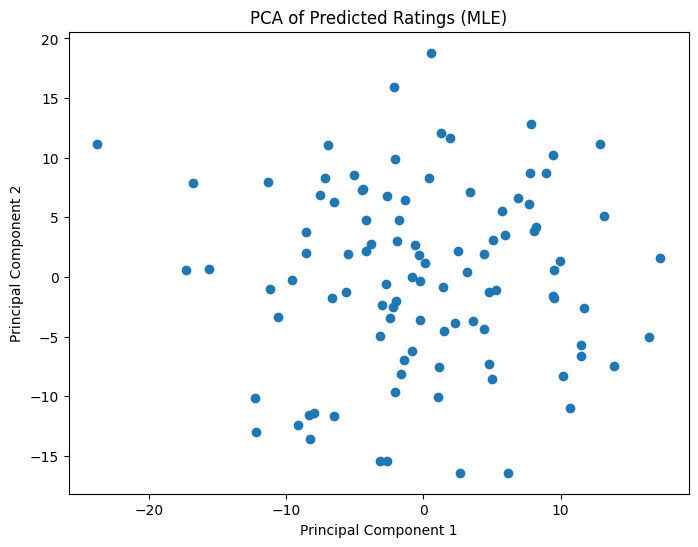

In [ ]:
from sklearn.decomposition import PCA

# Choose the best performing method (PCA with MLE)
predicted_ratings_mle = pca_mle(user_item_ratings)

# Apply PCA to the predicted ratings
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(predicted_ratings_mle)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Predicted Ratings (MLE)')
plt.show()

# Content-Based Recommender Systems

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from scipy.sparse import hstack

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('/content/stocks_final_data.csv')

# Select relevant features for content-based recommendation
features = ['industry', 'marketCap', 'dividendYield', 'environmentScore', 'socialScore', 'governanceScore', 'profitMargins']
df_features = df[['ticker'] + features]

# Handle missing values (fill with 0 or mean)
df_features = df_features.fillna(0)

# Ensure the 'industry' column contains only strings
df_features['industry'] = df_features['industry'].astype(str)

# Normalize the numerical features (scaling to 0-1 range)
scaler = MinMaxScaler()
df_features[features[1:]] = scaler.fit_transform(df_features[features[1:]])

# Encode categorical features (e.g., 'industry') using one-hot encoding
encoder = OneHotEncoder(sparse_output=True)  # Use sparse matrix to save memory
industry_encoded = encoder.fit_transform(df_features[['industry']])

# Combine numerical features and encoded categorical features
numerical_features = df_features[features[1:]].values
combined_features = hstack([industry_encoded, numerical_features])

# If text data is available (e.g., longBusinessSummary), use TF-IDF to represent the text
if 'longBusinessSummary' in df.columns:
    # Initialize TF-IDF Vectorizer
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['longBusinessSummary'].fillna(''))

    # Combine numerical features, encoded categorical features, and TF-IDF features
    combined_features = hstack([combined_features, tfidf_matrix])

# Function to compute cosine similarity between items
def compute_similarity_matrix(combined_features):
    """
    Computes the cosine similarity matrix between items based on their features.
    """
    similarity_matrix = cosine_similarity(combined_features)
    return pd.DataFrame(similarity_matrix, index=df['ticker'], columns=df['ticker'])

# Compute the item-item similarity matrix
item_similarity_matrix = compute_similarity_matrix(combined_features)

# Function to recommend top N similar items for a given item
def recommend_similar_items(item_similarity_matrix, item_id, top_n=5):
    """
    Recommends top N similar items for a given item.
    """
    # Get the similarity scores for the given item
    similar_scores = item_similarity_matrix[item_id]

    # Sort the scores in descending order
    similar_scores = similar_scores.sort_values(ascending=False)

    # Exclude the item itself (similarity = 1)
    similar_scores = similar_scores.iloc[1:]

    # Return the top N similar items
    return similar_scores.head(top_n)

# Example: Recommend top 5 similar items for item 'A'
item_id = 'A'
similar_items = recommend_similar_items(item_similarity_matrix, item_id, top_n=5)
print(f"Top 5 similar items to {item_id}:")
print(similar_items)

Top 5 similar items to A:
ticker
TMO    0.698705
PKI    0.693234
DHR    0.693129
WAT    0.692327
MTD    0.669539
Name: A, dtype: float64


#Create Item Profiles

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Load your dataset
df = pd.read_csv('/content/stocks_final_data.csv')

# Select relevant features for item profiles
features = ['industry', 'marketCap', 'dividendYield', 'environmentScore', 'socialScore', 'governanceScore', 'profitMargins']
df_features = df[['ticker'] + features]

# Handle missing values (fill with 0 or mean)
df_features = df_features.fillna(0)

# Ensure the 'industry' column contains only strings
df_features['industry'] = df_features['industry'].astype(str)

# Normalize the numerical features (scaling to 0-1 range)
scaler = MinMaxScaler()
df_features[features[1:]] = scaler.fit_transform(df_features[features[1:]])

# Encode categorical features (e.g., 'industry') using one-hot encoding
encoder = OneHotEncoder(sparse_output=True)
industry_encoded = encoder.fit_transform(df_features[['industry']])

# Combine numerical features and encoded categorical features
numerical_features = df_features[features[1:]].values
item_profiles = hstack([industry_encoded, numerical_features])

# If text data is available (e.g., longBusinessSummary), use TF-IDF to represent the text
if 'longBusinessSummary' in df.columns:
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['longBusinessSummary'].fillna(''))
    item_profiles = hstack([item_profiles, tfidf_matrix])

#Create User Profiles

In [ ]:
# Print the list of valid tickers in the DataFrame
print("Valid tickers in the dataset:")
print(df['ticker'].unique())

# Example of user_interactions with valid tickers
user_interactions = {
    0: {'A': 5, 'AAPL': 4},  # User 0 rated company A with 5 and company AAPL with 4
    1: {'MSFT': 3, 'GOOGL': 2},  # User 1 rated company MSFT with 3 and company GOOGL with 2
}

# Function to create user profiles
def create_user_profile(user_interactions, item_profiles, df):
    user_profiles = {}

    # Convert item_profiles to CSR format for efficient indexing
    item_profiles_csr = csr_matrix(item_profiles)

    for user_id, interactions in user_interactions.items():
        # Initialize a list to store the indices of the items the user has interacted with
        item_indices = []

        # Initialize a list to store the user's ratings for the interacted items
        ratings = []

        for item, rating in interactions.items():
            # Check if the item exists in the DataFrame
            if item in df['ticker'].values:
                # Get the index of the item
                item_index = df[df['ticker'] == item].index[0]
                item_indices.append(item_index)
                ratings.append(rating)
            else:
                print(f"Warning: Ticker '{item}' not found in the dataset. Skipping.")

        # If no valid items are found for the user, skip creating a profile
        if not item_indices:
            print(f"Warning: No valid items found for user {user_id}. Skipping.")
            continue

        # Get the item profiles for the interacted items
        interacted_item_profiles = item_profiles_csr[item_indices]

        # Compute the weighted average of the item profiles to create the user profile
        user_profile = np.average(interacted_item_profiles.toarray(), axis=0, weights=ratings)
        user_profiles[user_id] = user_profile

    return user_profiles

# Create user profiles
user_profiles = create_user_profile(user_interactions, item_profiles, df)

Valid tickers in the dataset:
['A' 'AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADSK' 'AEE' 'AEP' 'AES' 'AFL' 'AIG' 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALL'
 'ALLE' 'ALXN' 'AMAT' 'AME' 'AMP' 'AMT' 'AMZN' 'ANET' 'ANSS' 'ANTM' 'AOS'
 'APA' 'APD' 'APH' 'APTV' 'ARE' 'ATO' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK'
 'AXP' 'AZO' 'BA' 'BAC' 'BAX' 'BBY' 'BDX' 'BEN' 'BIIB' 'BIO' 'BK' 'BKNG'
 'BLK' 'BLL' 'BMY' 'BR' 'BSX' 'BWA' 'BXP' 'C' 'CAG' 'CAH' 'CAT' 'CB'
 'CBOE' 'CBRE' 'CCI' 'CCL' 'CDNS' 'CDW' 'CE' 'CERN' 'CF' 'CFG' 'CHD'
 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CLX' 'CMA' 'CMCSA' 'CME' 'CMG' 'CMI'
 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COO' 'COP' 'COST' 'COTY' 'CPB' 'CPRT'
 'CRM' 'CSCO' 'CSX' 'CTAS' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD'
 'DE' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS' 'DISCA' 'DISH' 'DLR' 'DLTR' 'DOV'
 'DPZ' 'DRE' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN' 'DXC' 'DXCM' 'EA' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EL' 'EMN' 'EMR' 'EOG' 'EQIX' 'EQR' 'ES' 'ESS' 'ETN'
 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 

#Make Recommendations

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Function to recommend items for a user
def recommend_items(user_profiles, item_profiles, user_id, top_n=5):
    # Get the user profile
    user_profile = user_profiles[user_id]

    # Compute the similarity between the user profile and all item profiles
    similarities = cosine_similarity([user_profile], item_profiles.toarray()).flatten()

    # Sort items by similarity scores
    similar_items = pd.Series(similarities, index=df['ticker']).sort_values(ascending=False)

    # Exclude items the user has already interacted with
    interacted_items = user_interactions[user_id].keys()
    similar_items = similar_items.drop(interacted_items, errors='ignore')

    # Return the top N similar items
    return similar_items.head(top_n)

# Example: Recommend top 5 items for user 0
user_id = 0
recommended_items = recommend_items(user_profiles, item_profiles, user_id, top_n=5)
print(f"Top 5 recommended items for user {user_id}:")
print(recommended_items)

Top 5 recommended items for user 0:
ticker
DHR     0.648550
TMO     0.608755
PKI     0.597602
IDXX    0.593282
WAT     0.589209
dtype: float64


#Clustering and Neighborhood-Based Recommendations


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('/content/stocks_final_data.csv')

# Select relevant features for clustering
features = ['marketCap', 'dividendYield', 'environmentScore', 'socialScore', 'governanceScore', 'profitMargins']
df_features = df[['ticker'] + features]

# Handle missing values (fill with 0 or mean)
df_features = df_features.fillna(0)

# Normalize the features (scaling to 0-1 range)
scaler = MinMaxScaler()
df_features[features] = scaler.fit_transform(df_features[features])

# Perform K-Means clustering
n_clusters = 5  # Number of clusters (you can adjust this)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_features['cluster'] = kmeans.fit_predict(df_features[features])

# Function to recommend companies within the same cluster
def recommend_within_cluster(df_features, ticker, top_n=5):
    """
    Recommends top N companies within the same cluster as the given ticker.
    """
    # Get the cluster of the given ticker
    cluster = df_features[df_features['ticker'] == ticker]['cluster'].values[0]

    # Get all companies in the same cluster
    cluster_companies = df_features[df_features['cluster'] == cluster]

    # Exclude the given ticker from the recommendations
    cluster_companies = cluster_companies[cluster_companies['ticker'] != ticker]

    # Sort companies by a feature (e.g., marketCap) and recommend the top N
    recommended_companies = cluster_companies.sort_values(by='marketCap', ascending=False).head(top_n)

    return recommended_companies['ticker']

# Example: Recommend top 5 companies within the same cluster as 'A'
ticker = 'A'
recommended_companies = recommend_within_cluster(df_features, ticker, top_n=5)
print(f"Top 5 recommended companies within the same cluster as {ticker}:")
print(recommended_companies)

Top 5 recommended companies within the same cluster as A:
285    MSFT
417       V
309    NVDA
260      MA
192      HD
Name: ticker, dtype: object


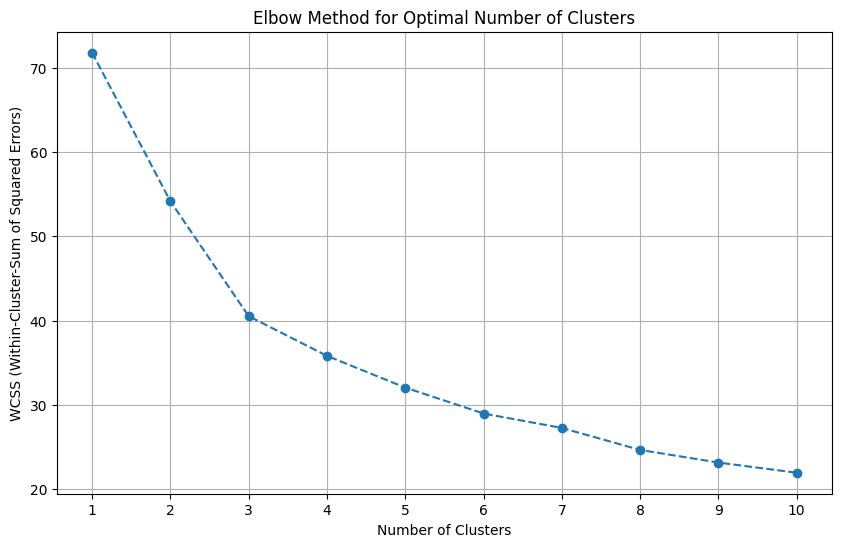

Companies and their assigned clusters:
    ticker  cluster
0        A        4
1      AAL        3
2      AAP        1
3     AAPL        7
4     ABBV        2
..     ...      ...
447   XRAY        4
448    XYL        1
449    YUM        1
450    ZBH        6
451    ZTS        2

[452 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt

# Use the Elbow Method to determine the optimal number of clusters
wcss = []  # Within-Cluster-Sum of Squared Errors
max_clusters = 10  # Maximum number of clusters to test

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_features[features])
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum of Squared Errors)')
plt.xticks(range(1, max_clusters + 1))
plt.grid()
plt.show()

# Based on the Elbow Method, select the optimal number of clusters
optimal_clusters = 8

# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_features['cluster'] = kmeans.fit_predict(df_features[features])

# Display the clusters
print("Companies and their assigned clusters:")
print(df_features[['ticker', 'cluster']])

# Function to recommend companies within the same cluster
def recommend_within_cluster(df_features, ticker, top_n=5):
    """
    Recommends top N companies within the same cluster as the given ticker.
    """
    # Get the cluster of the given ticker
    cluster = df_features[df_features['ticker'] == ticker]['cluster'].values[0]

    # Get all companies in the same cluster
    cluster_companies = df_features[df_features['cluster'] == cluster]

    # Exclude the given ticker from the recommendations
    cluster_companies = cluster_companies[cluster_companies['ticker'] != ticker]

    # Sort companies by a feature (e.g., marketCap) and recommend the top N
    recommended_companies = cluster_companies.sort_values(by='marketCap', ascending=False).head(top_n)

    return recommended_companies['ticker']

In [ ]:
cluster_counts = df_features.groupby('cluster')['ticker'].count()
cluster_counts

cluster
0    55
1    84
2    53
3    90
4    81
5    46
6    39
7     4
Name: ticker, dtype: int64

In [ ]:
# Example: Recommend top 5 companies within the same cluster as 'AAPL'
ticker = 'AAPL'
recommended_companies = recommend_within_cluster(df_features, ticker, top_n=5)
print(f"Top 5 recommended companies within the same cluster as {ticker}:")
print(recommended_companies)

Top 5 recommended companies within the same cluster as AAPL:
285     MSFT
29      AMZN
181    GOOGL
Name: ticker, dtype: object
